In [1]:
#Importing the required libraries and warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Application data:

### 1. Reading application dataset and checking basic info:

In [2]:
# Reading the data application_data.csv
inp0 = pd.read_csv("application_data.csv")

In [3]:
inp0.shape

(307511, 122)

In [4]:
# Checking head of the dataframe
pd.set_option("display.max_rows",122)
pd.set_option("display.max_columns",122)

inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
inp0.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

### 2. Fixing Columns

##### Converting Columns with data in the form of  days to data in the form of years.

In [6]:
# Converting DAYS_BIRTH column to age in years at the time of application.
inp0["Age_years"] = inp0["DAYS_BIRTH"].apply(lambda x: abs(x)/365)

# Converting DAYS_EMPLOYED columns into months employed at the time of application.
inp0["Employed_years"] = inp0["DAYS_EMPLOYED"].apply(lambda x: abs(x)/365)

# Converting DAYS_REGISTRATION column to changes in registration in years at the time of application.
inp0["Registration_years"] = inp0["DAYS_REGISTRATION"].apply(lambda x: abs(x)/365)

# Converting DAYS_ID_PUBLISH column to changes in identity in years at the time of application.
inp0["Id_Publish_years"] = inp0["DAYS_ID_PUBLISH"].apply(lambda x: abs(x)/365)

# Converting DAYS_LAST_PHONE_CHANGE to years before application did client change phone.
inp0["LAST_PHONE_CHANGE_years"] = inp0["DAYS_LAST_PHONE_CHANGE"].apply(lambda x: abs(x)/365)

In [7]:
# Dropping previous days columns.
inp0 = inp0.drop(["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"],axis=1)

##### Ext source columns

In [8]:
# There are 3 score columns in dataset, we can derive new column from these 3 columns. New column will be mean of 3.
inp0["EXT_SOURCE"] = inp0.loc[:,["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]].mean(skipna=True,axis=1)

In [9]:
inp0 = inp0.drop(["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"],axis=1)

In [10]:
inp0.shape

(307511, 120)

### 3. Missing values:

In [11]:
# Checking information about missing values columns.
inp0.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE                           0
FLAG_EMAIL                           0
OCCUPATION_TYPE                  96391
CNT_FAM_MEMBERS          

In [12]:
# Checking % missing values columns.
(inp0.isna().sum()/len(inp0))*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0.000000
FLAG_CONT_MOBILE                 0.000000
FLAG_PHONE                       0.000000
FLAG_EMAIL                       0

In [13]:
# Dropping columns which has missing value percentage greater than 40%.
for i in inp0.columns:
    percent = (inp0[i].isna().sum()/len(inp0))*100
    if (percent > 40):
        inp0 = inp0.drop([i],axis=1)

# Checking shape of dataframe after dropping columns            
inp0.shape

(307511, 72)

Below columns have missing values less than 0.5%, rows having these missing values can be dropped as it would not affect analysis. For this EDA purpose, they are not dropped.

1. AMT_ANNUITY, 
2. AMT_GOODS_PRICE, 
3. NAME_TYPE_SUITE, 
4. OBS_30_CNT_SOCIAL_CIRCLE, 
5. DEF_30_CNT_SOCIAL_CIRCLE, 
6. OBS_60_CNT_SOCIAL_CIRCLE, 
7. DEF_60_CNT_SOCIAL_CIRCLE, 
8. EXT_SOURCE 

###### Columns having significant missing values:

In [14]:
# Lets check OCCUPATION_TYPE column
inp0["OCCUPATION_TYPE"].mode()[0]

'Laborers'

In [15]:
inp0.loc[:,["AMT_REQ_CREDIT_BUREAU_HOUR" , "AMT_REQ_CREDIT_BUREAU_DAY" , "AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]].aggregate(["median"])

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
median,0.0,0.0,0.0,0.0,0.0,1.0


Missing value treatment: 

1. Occupation type is a categorical column, replacing 96391 missing values with mode i.e Laborers is not practical and will bias the results. To deal with them we could create new category for representing missing values.
2. For AMT_REQ_CREDIT_BUREAU, we can replace these missing values with respective median value of inquiry.

For this EDA purpose these missing values are kept as it is.

##### Columns with missing values in XNA form.

In [16]:
# Checking hidden missing value in gender column.
inp0["CODE_GENDER"].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [17]:
# Checking hidden missing value in organization type column.
inp0["ORGANIZATION_TYPE"].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

Missing value treatment: 

1. Gender has 4 numbers of records of XNA, we can replace these value with mode i.e Female .
2. Organization type is a categorical column, replacing 55374 missing values with mode i.e Business Entity Type 3 is not practical and will bias the results. To deal with them we could create new category for representing missing values.

For this EDA purpose these missing values are kept as it is.

#### Column segregation based on Numerical and Categorical type:

In [18]:
inp0_cat_cols = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
            'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION', 
            'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
            'ORGANIZATION_TYPE',]
inp0_num_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','CNT_CHILDREN','CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'Age_years','Employed_years', 
            'Registration_years', 'Id_Publish_years','LAST_PHONE_CHANGE_years', 'EXT_SOURCE']



###  4. Outliers finding and univariate analysis of numerical columns:

In [19]:
sns.set_style("whitegrid")

AMT_INCOME_TOTAL:
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


Quantiles of AMT_INCOME_TOTAL: 
0.50    147150.0
0.70    180000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64


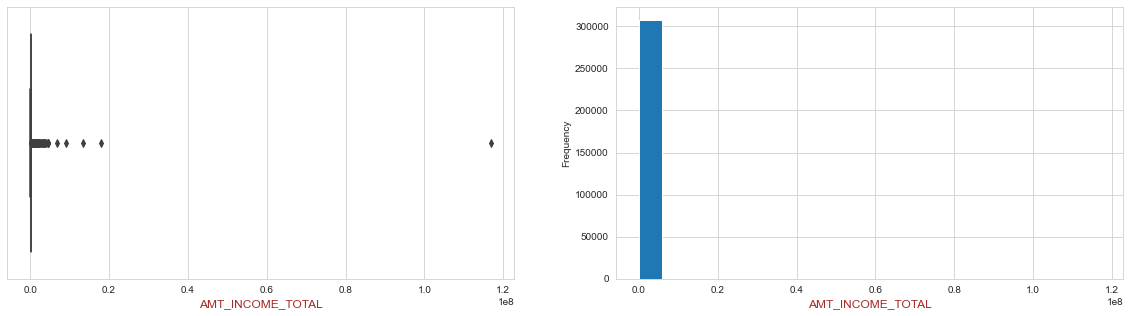

AMT_CREDIT:
count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


Quantiles of AMT_CREDIT: 
0.50     513531.0
0.70     755190.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64


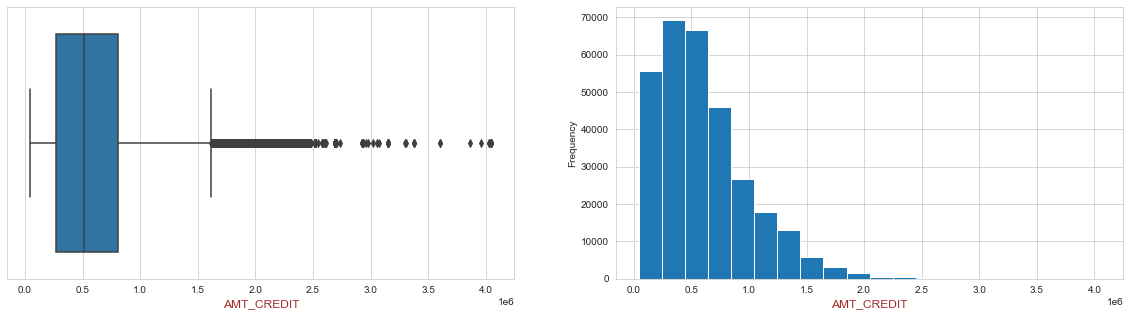

AMT_ANNUITY:
count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


Quantiles of AMT_ANNUITY: 
0.50    24903.0
0.70    32004.0
0.90    45954.0
0.95    53325.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64


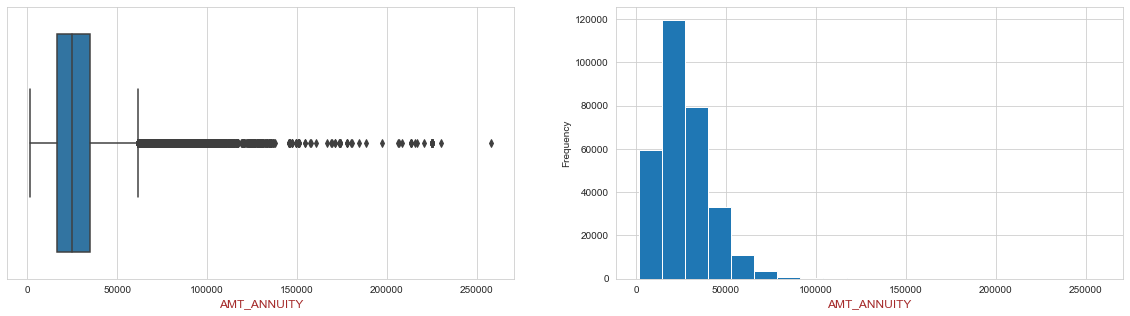

AMT_GOODS_PRICE:
count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


Quantiles of AMT_GOODS_PRICE: 
0.50     450000.0
0.70     675000.0
0.90    1093500.0
0.95    1305000.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64


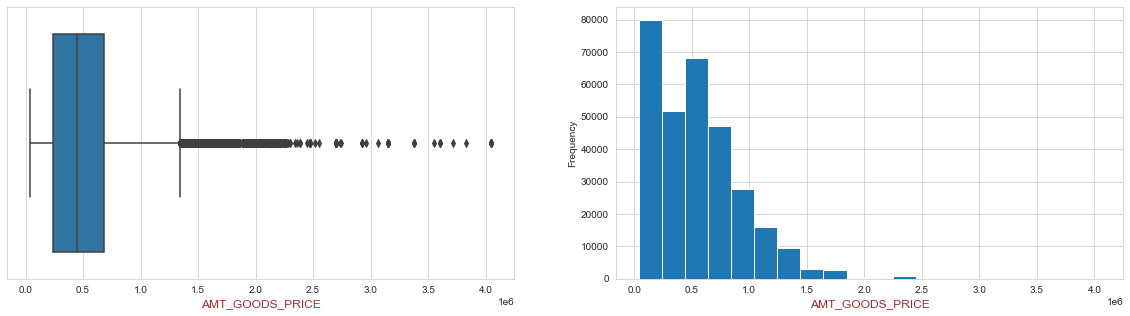

REGION_POPULATION_RELATIVE:
count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


Quantiles of REGION_POPULATION_RELATIVE: 
0.50    0.018850
0.70    0.025164
0.90    0.035792
0.95    0.046220
0.99    0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


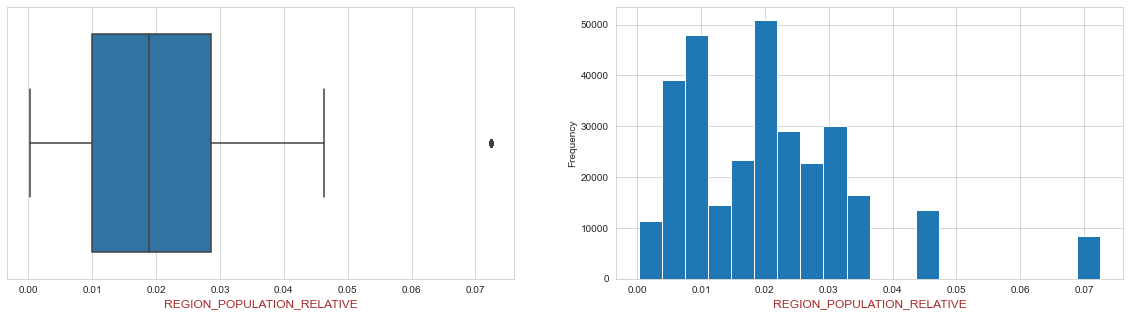

CNT_CHILDREN:
count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64


Quantiles of CNT_CHILDREN: 
0.50    0.0
0.70    0.0
0.90    2.0
0.95    2.0
0.99    3.0
Name: CNT_CHILDREN, dtype: float64


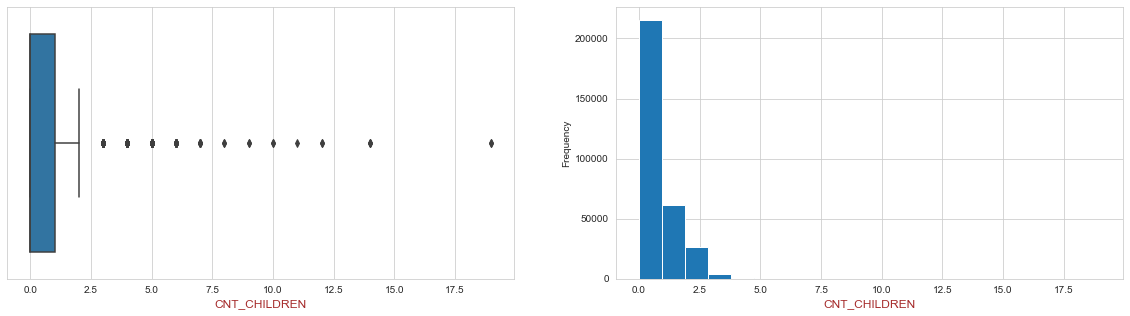

CNT_FAM_MEMBERS:
count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


Quantiles of CNT_FAM_MEMBERS: 
0.50    2.0
0.70    2.0
0.90    3.0
0.95    4.0
0.99    5.0
Name: CNT_FAM_MEMBERS, dtype: float64


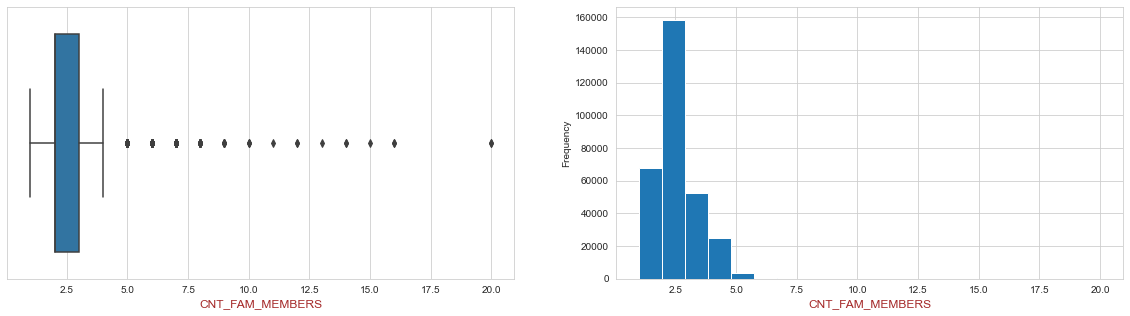

OBS_30_CNT_SOCIAL_CIRCLE:
count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


Quantiles of OBS_30_CNT_SOCIAL_CIRCLE: 
0.50     0.0
0.70     2.0
0.90     4.0
0.95     6.0
0.99    10.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


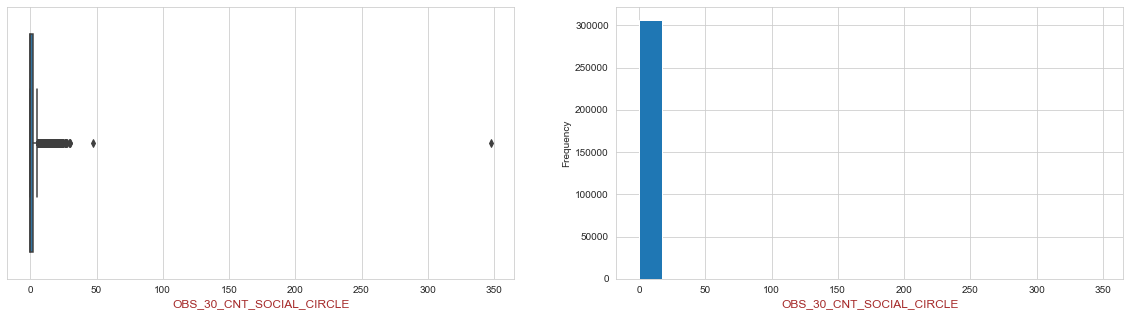

DEF_30_CNT_SOCIAL_CIRCLE:
count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


Quantiles of DEF_30_CNT_SOCIAL_CIRCLE: 
0.50    0.0
0.70    0.0
0.90    1.0
0.95    1.0
0.99    2.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


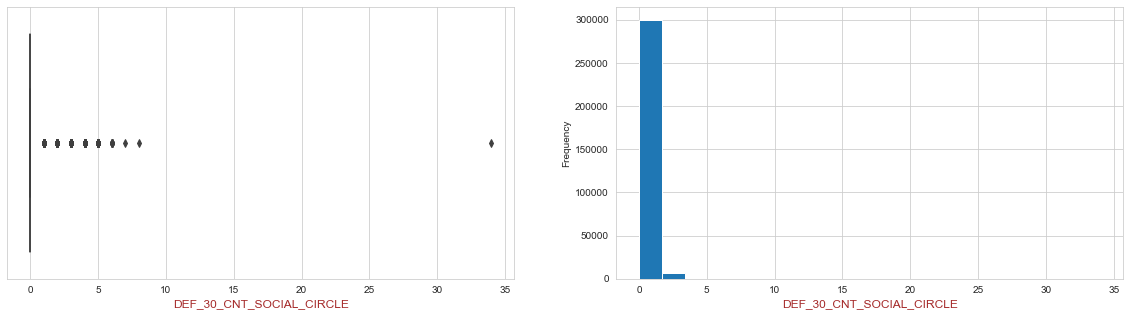

OBS_60_CNT_SOCIAL_CIRCLE:
count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


Quantiles of OBS_60_CNT_SOCIAL_CIRCLE: 
0.50     0.0
0.70     2.0
0.90     4.0
0.95     6.0
0.99    10.0
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


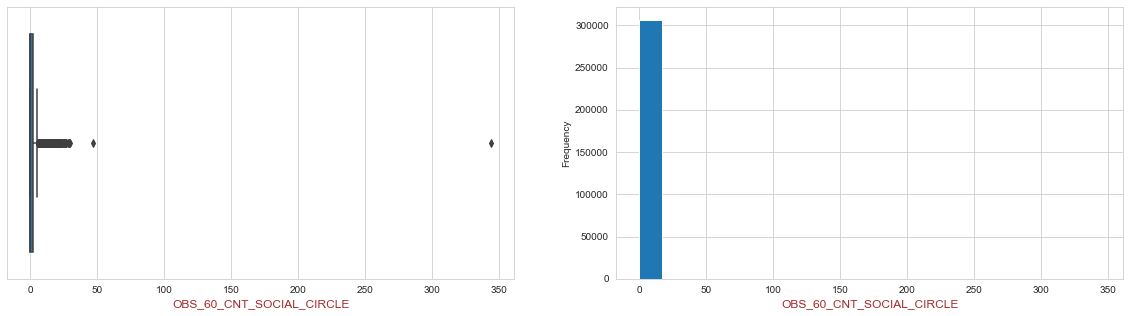

DEF_60_CNT_SOCIAL_CIRCLE:
count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


Quantiles of DEF_60_CNT_SOCIAL_CIRCLE: 
0.50    0.0
0.70    0.0
0.90    0.0
0.95    1.0
0.99    2.0
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


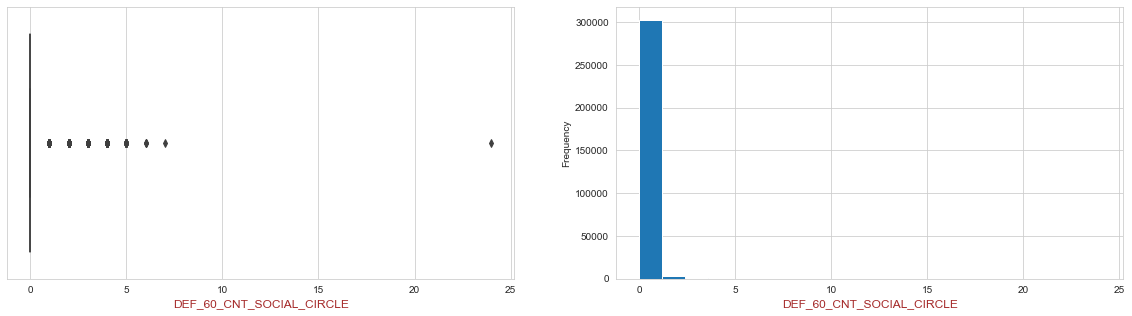

AMT_REQ_CREDIT_BUREAU_HOUR:
count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


Quantiles of AMT_REQ_CREDIT_BUREAU_HOUR: 
0.50    0.0
0.70    0.0
0.90    0.0
0.95    0.0
0.99    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


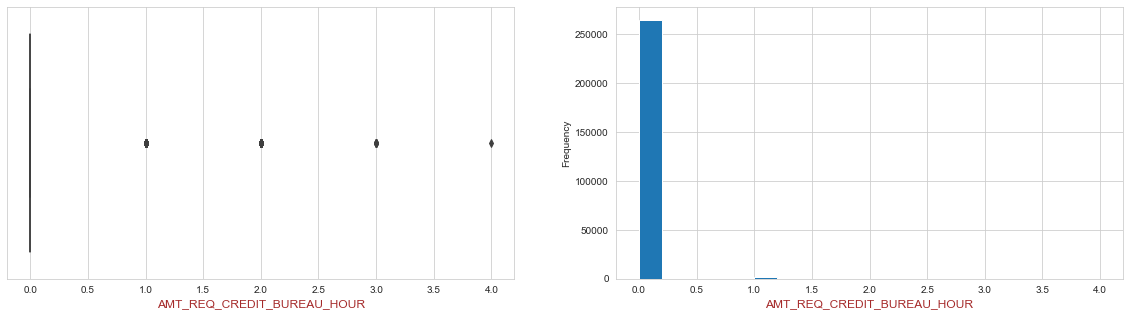

AMT_REQ_CREDIT_BUREAU_DAY:
count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


Quantiles of AMT_REQ_CREDIT_BUREAU_DAY: 
0.50    0.0
0.70    0.0
0.90    0.0
0.95    0.0
0.99    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


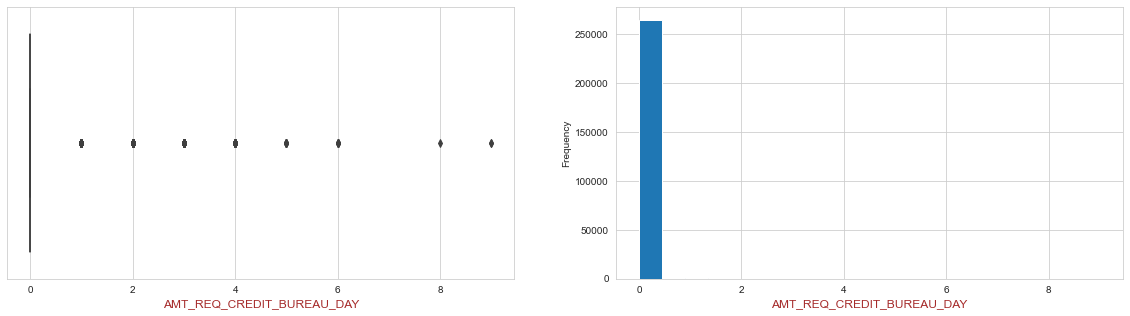

AMT_REQ_CREDIT_BUREAU_WEEK:
count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


Quantiles of AMT_REQ_CREDIT_BUREAU_WEEK: 
0.50    0.0
0.70    0.0
0.90    0.0
0.95    0.0
0.99    1.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


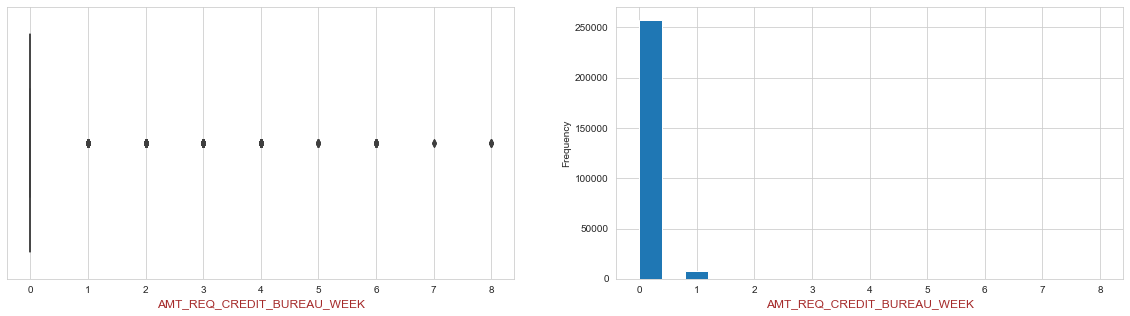

AMT_REQ_CREDIT_BUREAU_MON:
count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


Quantiles of AMT_REQ_CREDIT_BUREAU_MON: 
0.50    0.0
0.70    0.0
0.90    1.0
0.95    1.0
0.99    4.0
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


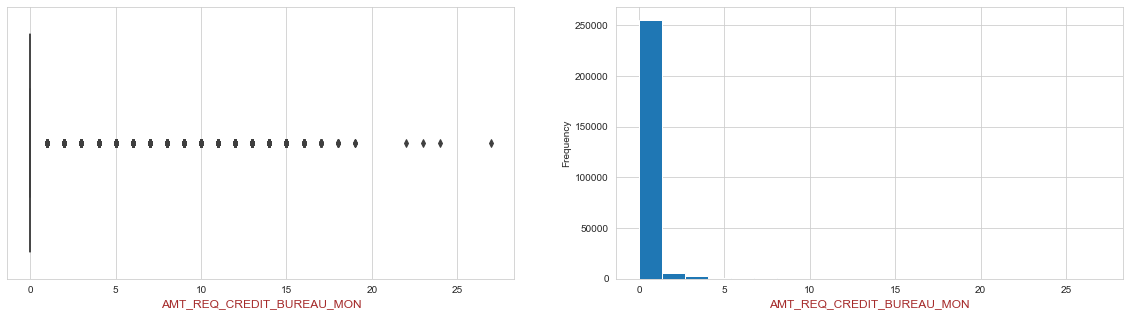

AMT_REQ_CREDIT_BUREAU_QRT:
count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


Quantiles of AMT_REQ_CREDIT_BUREAU_QRT: 
0.50    0.0
0.70    0.0
0.90    1.0
0.95    2.0
0.99    2.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


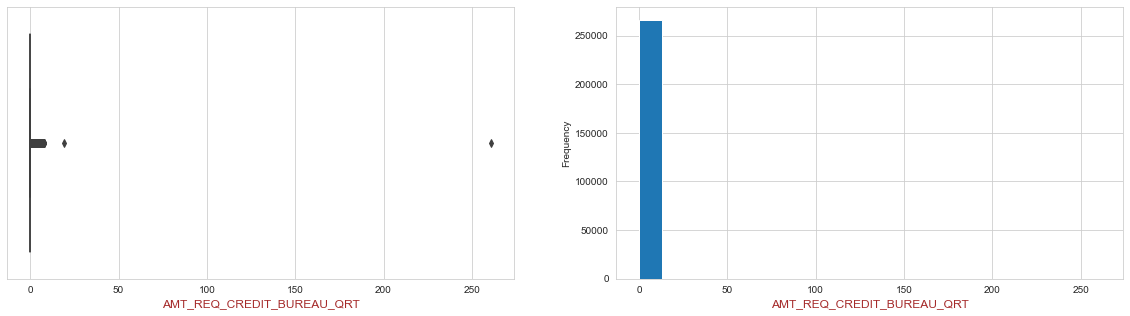

AMT_REQ_CREDIT_BUREAU_YEAR:
count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


Quantiles of AMT_REQ_CREDIT_BUREAU_YEAR: 
0.50    1.0
0.70    3.0
0.90    4.0
0.95    6.0
0.99    8.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


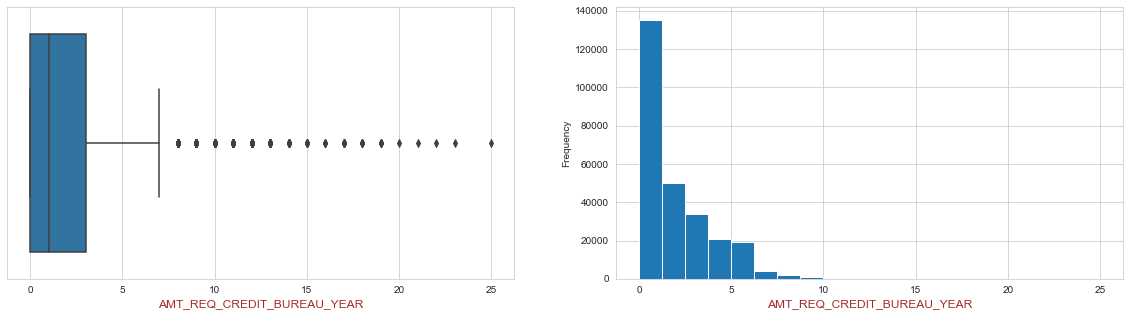

Age_years:
count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: Age_years, dtype: float64


Quantiles of Age_years: 
0.50    43.150685
0.70    51.739726
0.90    60.769863
0.95    63.572603
0.99    66.901370
Name: Age_years, dtype: float64


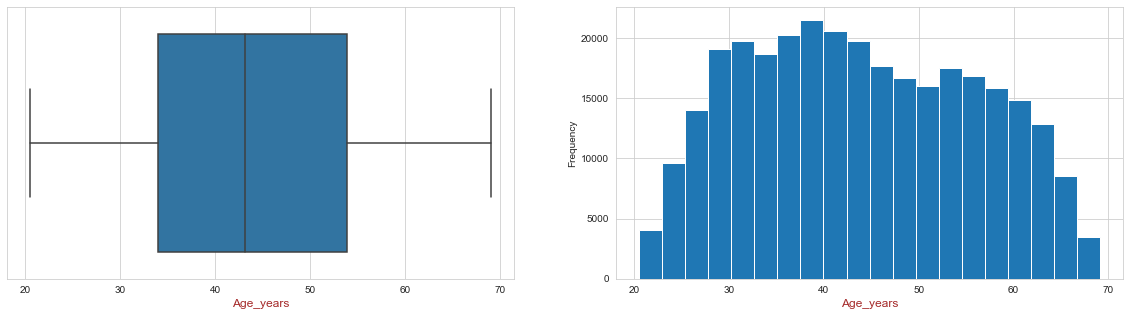

Employed_years:
count    307511.000000
mean        185.547239
std         382.037676
min           0.000000
25%           2.556164
50%           6.079452
75%          15.635616
max        1000.665753
Name: Employed_years, dtype: float64


Quantiles of Employed_years: 
0.50       6.079452
0.70      12.150685
0.90    1000.665753
0.95    1000.665753
0.99    1000.665753
Name: Employed_years, dtype: float64


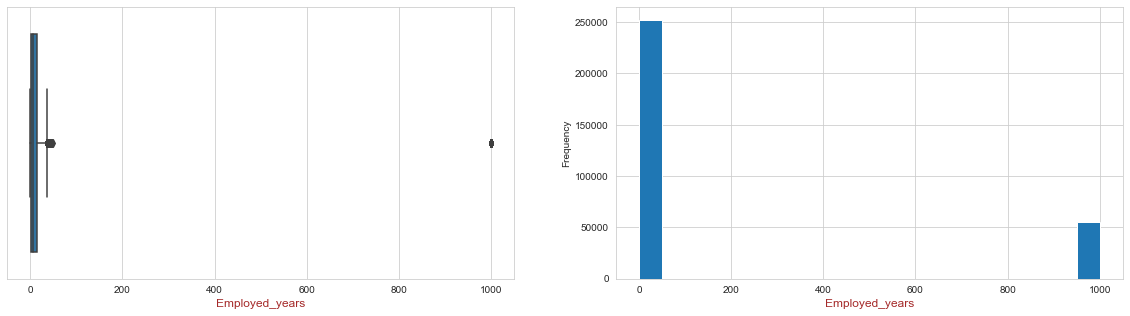

Registration_years:
count    307511.000000
mean         13.660604
std           9.651743
min           0.000000
25%           5.506849
50%          12.339726
75%          20.491781
max          67.594521
Name: Registration_years, dtype: float64


Quantiles of Registration_years: 
0.50    12.339726
0.70    18.564384
0.90    27.210959
0.95    31.276712
0.99    38.024658
Name: Registration_years, dtype: float64


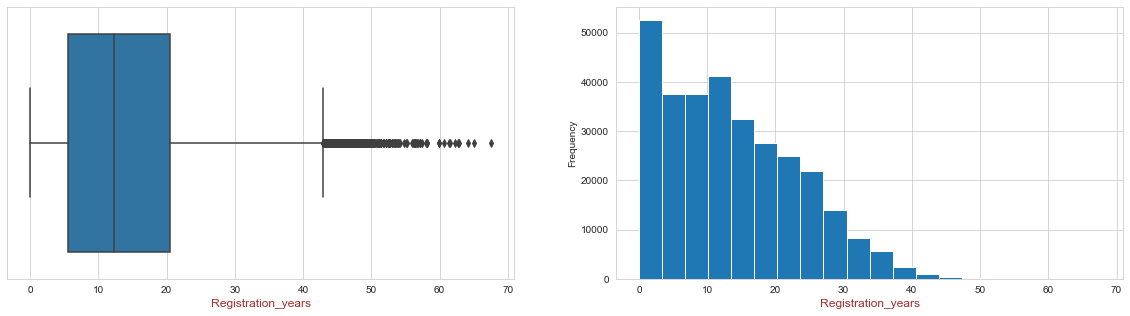

Id_Publish_years:
count    307511.000000
mean          8.203294
std           4.135481
min           0.000000
25%           4.712329
50%           8.915068
75%          11.778082
max          19.717808
Name: Id_Publish_years, dtype: float64


Quantiles of Id_Publish_years: 
0.50     8.915068
0.70    11.430137
0.90    12.942466
0.95    13.545205
0.99    14.923288
Name: Id_Publish_years, dtype: float64


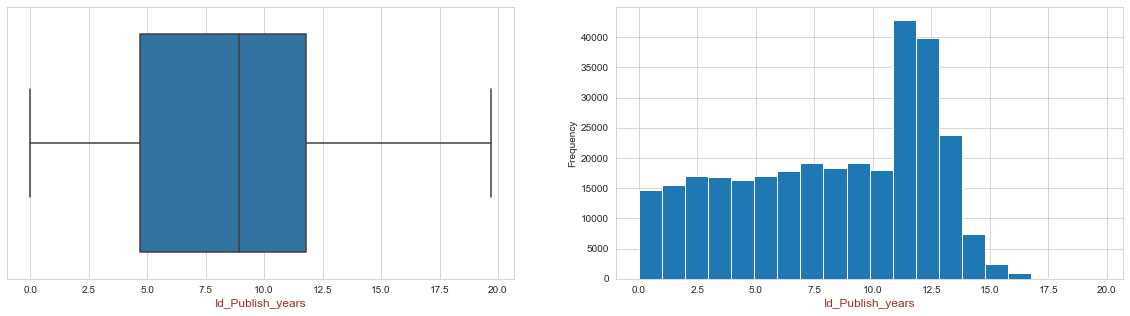

LAST_PHONE_CHANGE_years:
count    307510.000000
mean          2.637969
std           2.265229
min           0.000000
25%           0.750685
50%           2.073973
75%           4.301370
max          11.758904
Name: LAST_PHONE_CHANGE_years, dtype: float64


Quantiles of LAST_PHONE_CHANGE_years: 
0.50    2.073973
0.70    3.906849
0.90    5.912329
0.95    6.909589
0.99    8.627397
Name: LAST_PHONE_CHANGE_years, dtype: float64


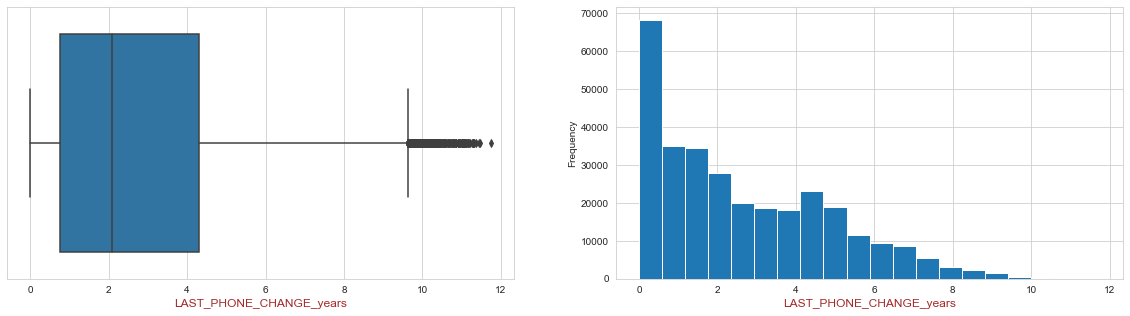

EXT_SOURCE:
count    307339.000000
mean          0.509251
std           0.149802
min           0.000006
25%           0.413648
50%           0.524502
75%           0.622819
max           0.878903
Name: EXT_SOURCE, dtype: float64


Quantiles of EXT_SOURCE: 
0.50    0.524502
0.70    0.602561
0.90    0.692519
0.95    0.725370
0.99    0.772628
Name: EXT_SOURCE, dtype: float64


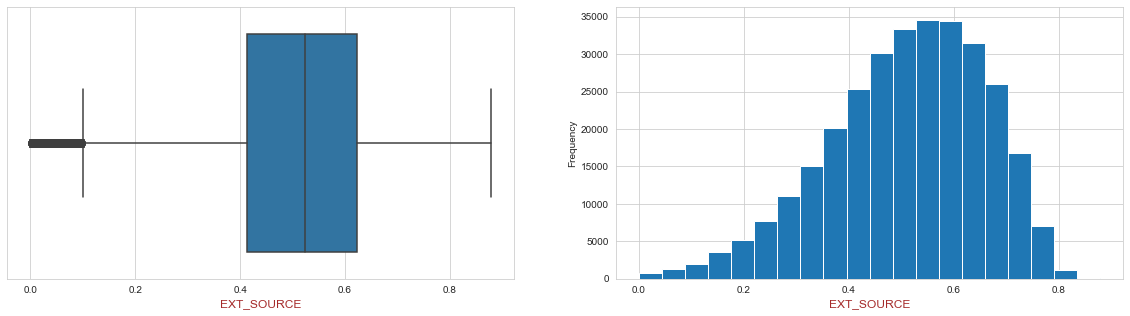

In [20]:
for col in inp0_num_cols:
    print("\033[1m"+col+":"+"\033[0m")
        
    print(inp0[col].describe())
    
    quants = inp0[col].quantile([0.5,0.7,0.9,0.95,0.99])
    print("\n")
    print(f"Quantiles of {col}: \n{quants}")
    
    fig,axs=plt.subplots(1,2)
    fig.set_figheight(5)
    fig.set_figwidth(20)

    sns.boxplot(data=inp0, x=col,ax=axs[0])
    axs[0].set_xlabel(col, fontdict={"fontsize":12, "fontweight":5, "color":"Brown"})

    inp0[col].plot.hist(ax=axs[1],bins=20)
    axs[1].set_xlabel(col, fontdict={"fontsize":12, "fontweight":5, "color":"Brown"})

    plt.show()

#### Observations:

Total income: 
1. There seems normal difference between 95 and 99 percentile. Difference between 99 percentile and max is huge hence outliers are present in total income column.
2. 99 % of clients income is below 500000.

Credit amount of loan:
1. Difference between 99 percentile and max is significant. Hence outliers are present in credit amount column.
2. 75% of credit amount of loan is below amount 800000.

Loan annuity:
1. There seems normal difference between 95 and 99 percentile and difference between 99 percentile and max is significant. Hence outliers are present in loan annuity column.
2. 99% of loan annuity is below 70000.

Price of the goods:
1. Difference between 99 percentile and max is significant. Hence outliers are present in price of goods column.
2. 75% of price of the goods of loan is below amount 700000.

Population of region:
1. Outlier present in normalized population of region where client lives.
2. Most of the clients live in scarcely to moderately populated region.

Count of children and count of family members:
1. Outliers are present in both the columns. 99 percentile of count of children and count of family members is 3 and 5 and maximum is 19 and 20 respectively.
2. People having no children are applying for more loans where people having family member less than or equal to 2 are applying more.

Client's social surroundings:
1. All the CNT_SOCIAL_CIRCLE DPD columns have outliers.
2. DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE has 75% of data below 2 observation and OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE has 75% data is of 0 observation.

Number of credit inquiries:
1. Credit inquiries for hour, day, week, month, quarter, year all have outliers.
2. 75% of data for all inquiries are is of 0 credit inquiries, 75 % of data credit inquiries for one year is below 3.

Age of client:
1. Age of client has no outliers.
2. Age range of clients seems to be in 20 to 70 years.

Employed duration of client:
1. There are datapoints that are having impossible value for employed year. These are outliers.
2. 75 % of client have professional experience below 15 years.

Changes in registration:
1. There are outliers present in the data points of this data variable.
2. Most client changed their registration in between 0 to 20 years.

Changes in ID:
1. No ouliers present in the data points of this variable.
2. Majority of the clients changed their ID in 11 to 15 years.

Changes in phone number:
1. Difference between 99 percentile and max is not that significant, hence there are no outliers.
2. Majority of the clients changed their phone in last 2 years.

Score from external data source:
1. There seems to be continuous change in score, hence there are no outliers.
2. Majority of people have normalized score in between 0.4 to 0.7.

### 5. Univariate analysis of Categorical columns:

NAME_CONTRACT_TYPE:
Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64


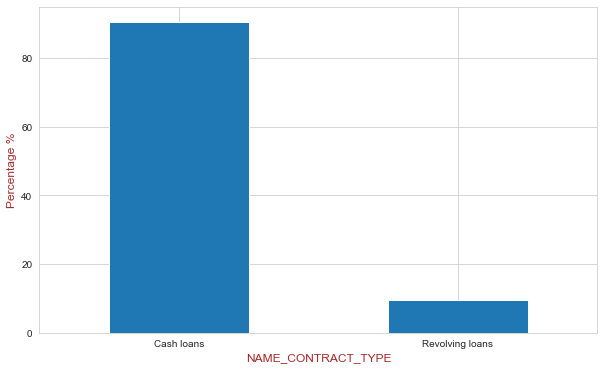

CODE_GENDER:
F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64


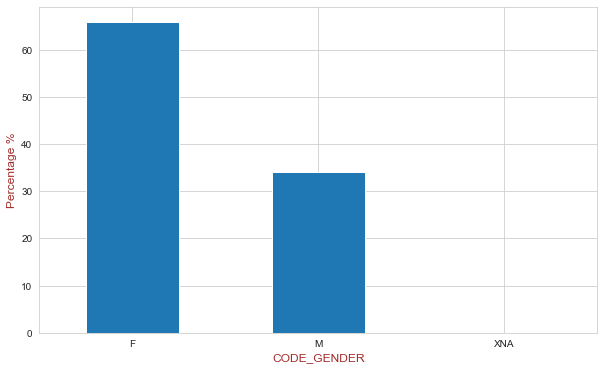

FLAG_OWN_CAR:
N    0.659892
Y    0.340108
Name: FLAG_OWN_CAR, dtype: float64


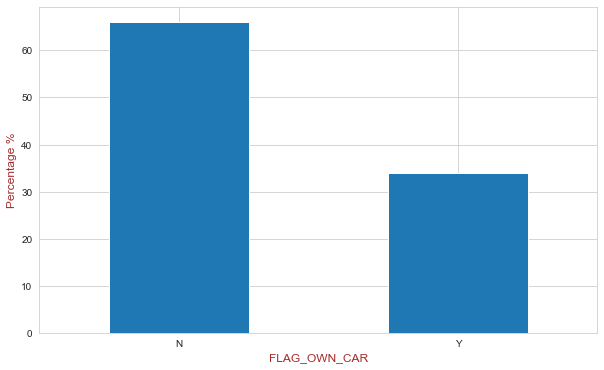

FLAG_OWN_REALTY:
Y    0.693673
N    0.306327
Name: FLAG_OWN_REALTY, dtype: float64


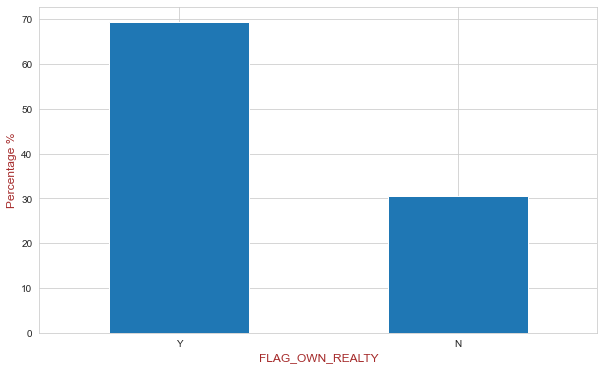

NAME_TYPE_SUITE:
Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64


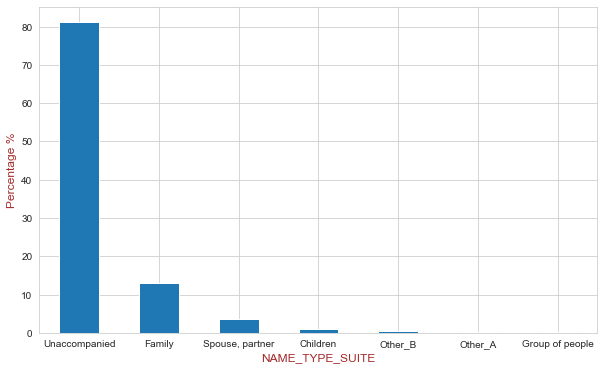

NAME_INCOME_TYPE:
Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64


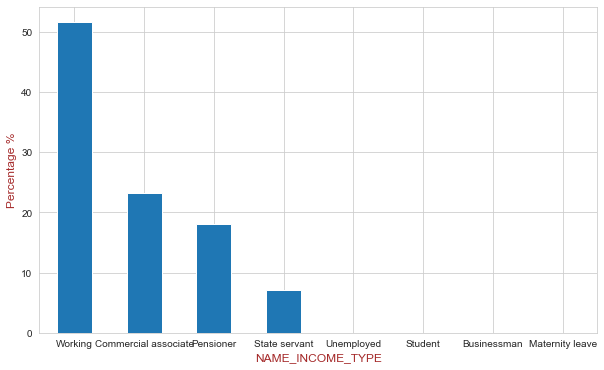

NAME_EDUCATION_TYPE:
Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64


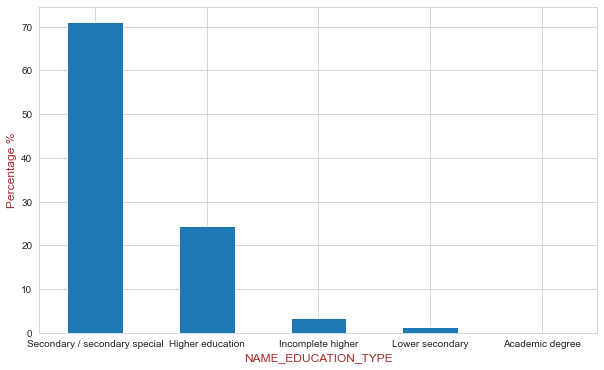

NAME_FAMILY_STATUS:
Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: NAME_FAMILY_STATUS, dtype: float64


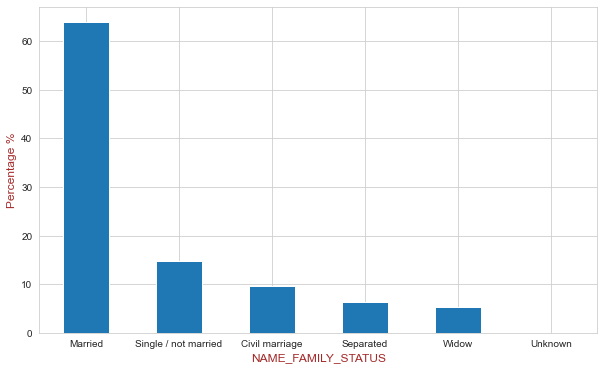

NAME_HOUSING_TYPE:
House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: NAME_HOUSING_TYPE, dtype: float64


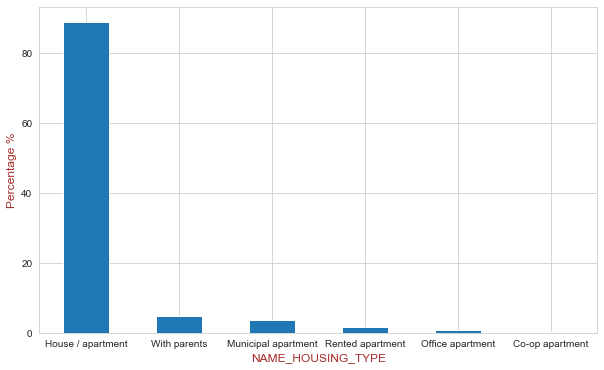

OCCUPATION_TYPE:
Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64


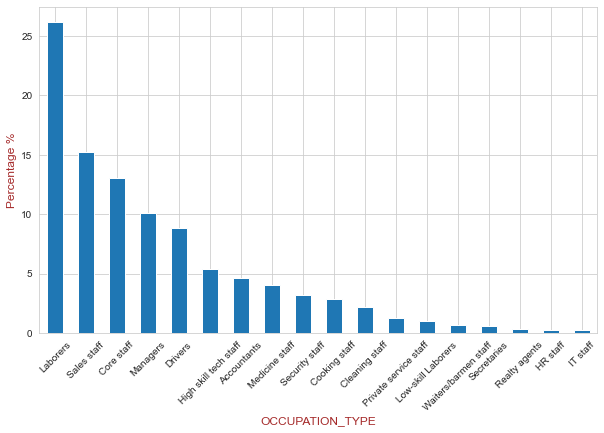

REGION_RATING_CLIENT:
2    0.738133
3    0.157165
1    0.104702
Name: REGION_RATING_CLIENT, dtype: float64


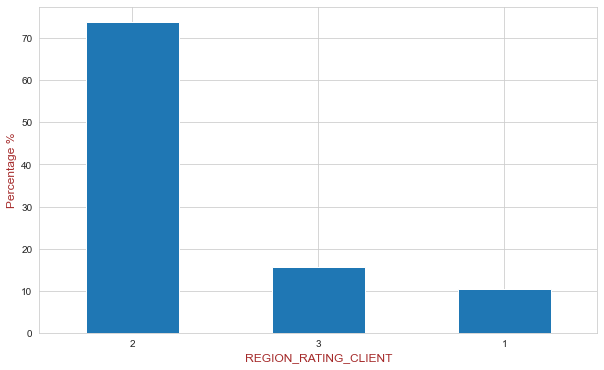

REGION_RATING_CLIENT_W_CITY:
2    0.746263
3    0.142629
1    0.111108
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64


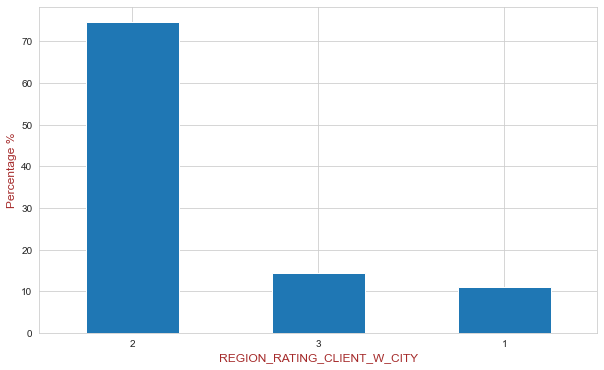

REG_REGION_NOT_LIVE_REGION:
0    0.984856
1    0.015144
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64


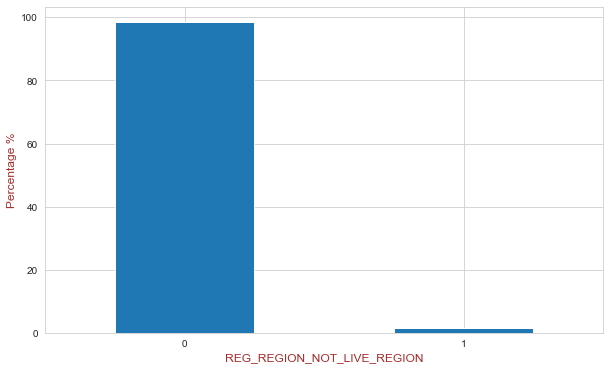

REG_REGION_NOT_WORK_REGION:
0    0.949231
1    0.050769
Name: REG_REGION_NOT_WORK_REGION, dtype: float64


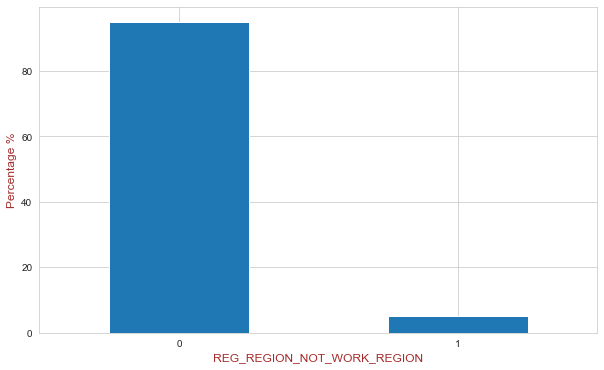

LIVE_REGION_NOT_WORK_REGION:
0    0.959341
1    0.040659
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64


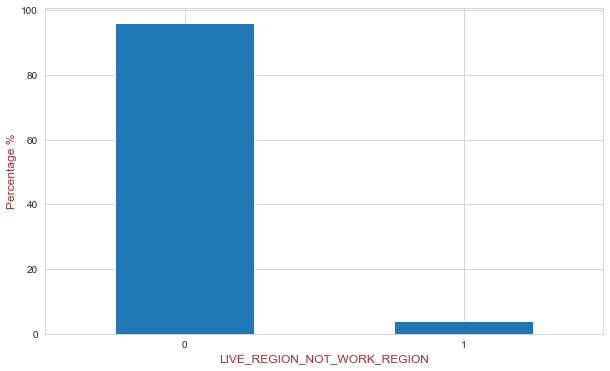

REG_CITY_NOT_LIVE_CITY:
0    0.921827
1    0.078173
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64


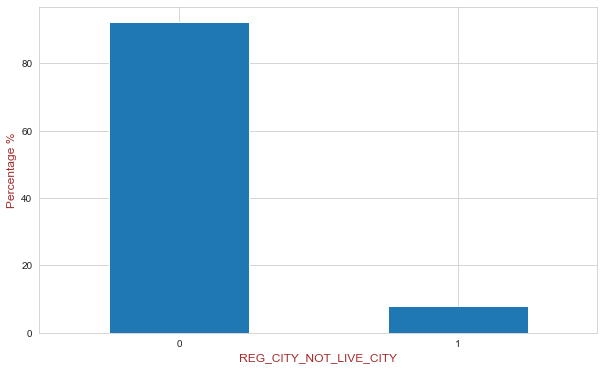

REG_CITY_NOT_WORK_CITY:
0    0.769546
1    0.230454
Name: REG_CITY_NOT_WORK_CITY, dtype: float64


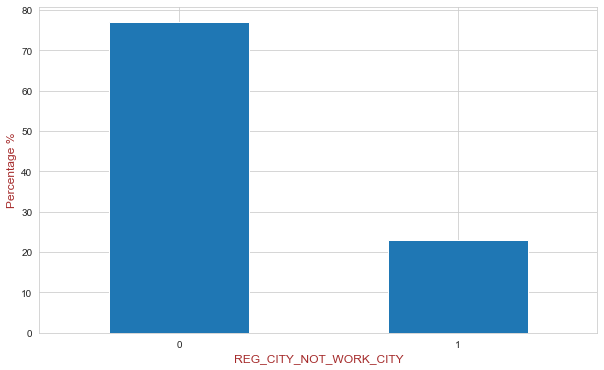

LIVE_CITY_NOT_WORK_CITY:
0    0.820445
1    0.179555
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64


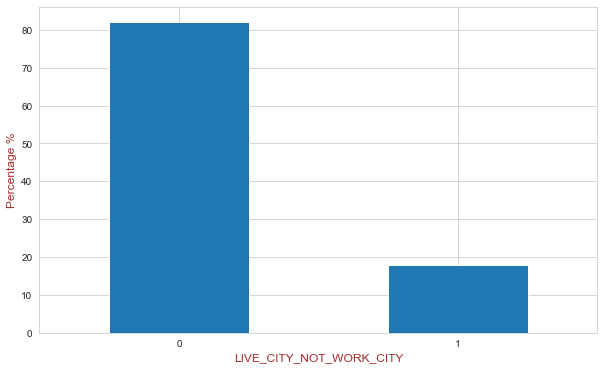

ORGANIZATION_TYPE:
Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
S

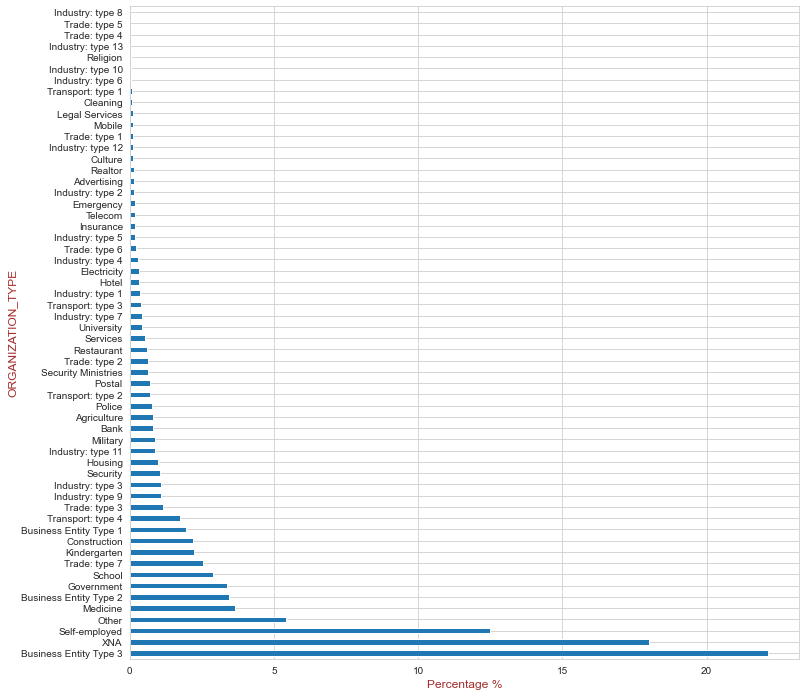

In [21]:
for col in inp0_cat_cols:
    print("\033[1m"+col+":"+"\033[0m")
    
    print(inp0[col].value_counts(normalize=True))
    
    if col == "ORGANIZATION_TYPE":
        plt.figure(figsize=(12,12))
        
        (inp0[col].value_counts(normalize=True)*100).plot.barh()

        plt.xlabel("Percentage %", fontdict={"fontsize":12, "fontweight": 5, "color":"Brown"})
        plt.ylabel(col , fontdict={"fontsize":12, "fontweight":5, "color":"Brown"})

    else:
        plt.figure(figsize=(10,6))

        (inp0[col].value_counts(normalize=True)*100).plot.bar()

        plt.ylabel("Percentage %", fontdict={"fontsize":12, "fontweight": 5, "color":"Brown"})
        plt.xlabel(col , fontdict={"fontsize":12, "fontweight":5, "color":"Brown"})
        
        if col == "OCCUPATION_TYPE":
            plt.xticks(rotation = 45)
        else:
            plt.xticks(rotation = 0)

    plt.show()

#### Observations:

1. Majority of people are applied for cash loans than revolving type of loans.

2. Female clients have applied more for loans than male clients.

3. People who do not own car applied more for loans.

4. Most of the clients who applied for loan own either house or flat.

5. Higher percentage of clients applied for loan came unaccompanied at the time of applying loan.

6. Most of the client are in the working category.

7. Clients with seconadry or secondary special education have applied more for loans.

8. Married people applied more for loans.

9. Most of the clients live in either house or appartment.

10. Clients with laborers occupation have highest percentage in loan application.

11. Most clients have region rating 2 and region considering city rating 2.

12. Most of the clients's given address match permanent address.

13. People working for organization type buisness entity type 3 have highest application percentage. Self employed people have alse have significant application percenatge.

#### Target:

In [22]:
(inp0["TARGET"].value_counts(normalize=True))*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

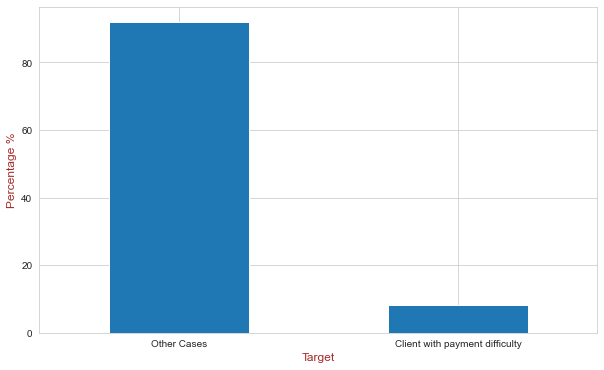

In [23]:
plt.figure(figsize=(10,6))

(inp0["TARGET"].value_counts(normalize=True)*100).plot.bar()

plt.ylabel("Percentage %", fontdict={"fontsize": 12, "fontweight" : 5, "color" : "Brown"})
plt.xlabel("Target", fontdict={"fontsize": 12, "fontweight" : 5, "color" : "Brown"})

plt.xticks([0,1],["Other Cases","Client with payment difficulty"],rotation = 0)

plt.show()

Observations:
1. Significant amount of data is of people who paid ontime, and about 8 percent of people have payment difficulty.
2. Data is imbalanced towards people with no payment difficulty for target variable.

### 6. Segmented Univariate analysis.

#### Categorical columns:

NAME_CONTRACT_TYPE:


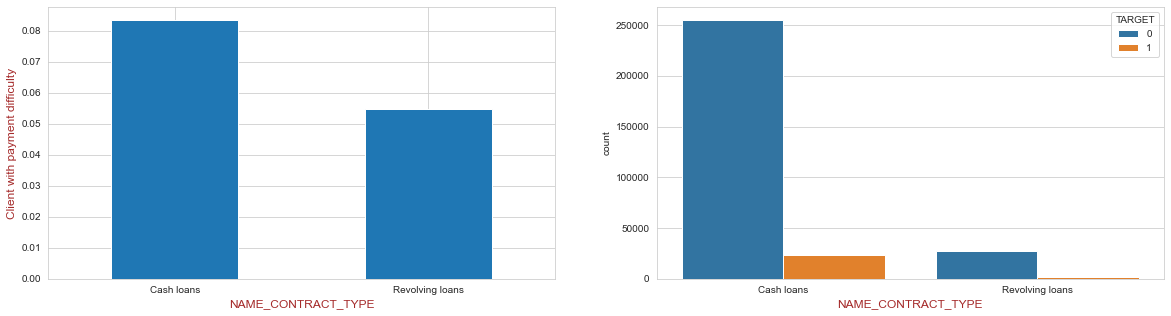

CODE_GENDER:


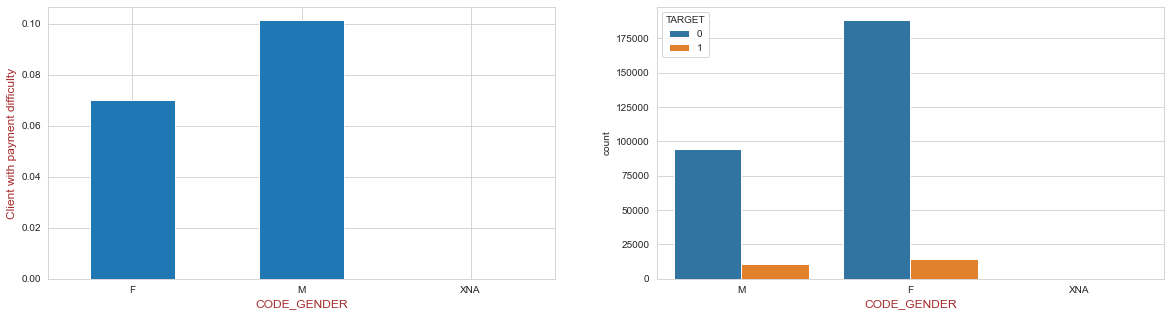

FLAG_OWN_CAR:


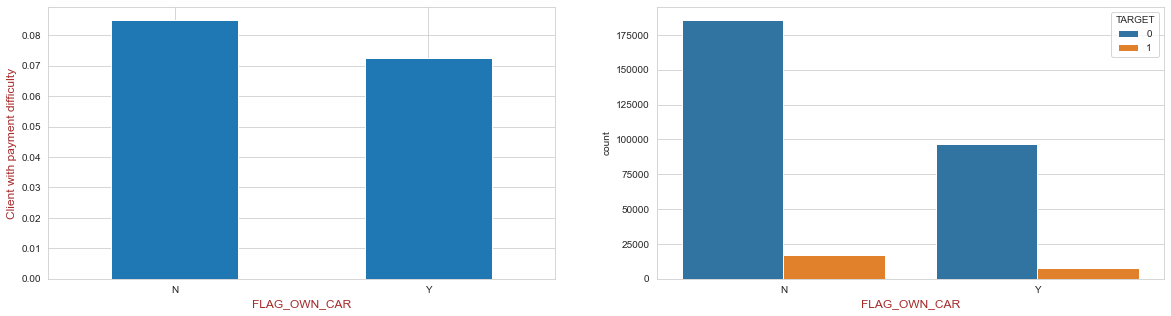

FLAG_OWN_REALTY:


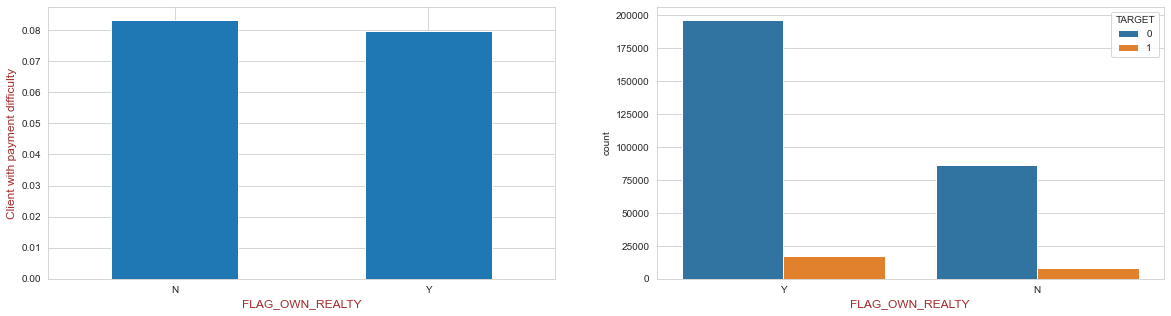

NAME_TYPE_SUITE:


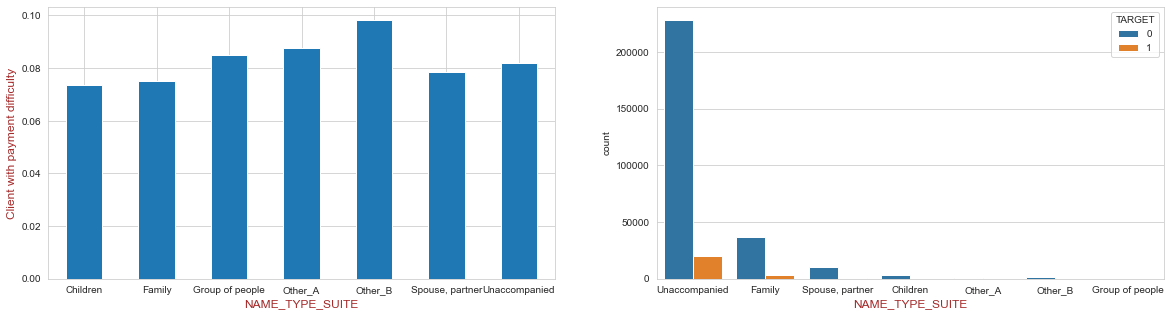

NAME_INCOME_TYPE:


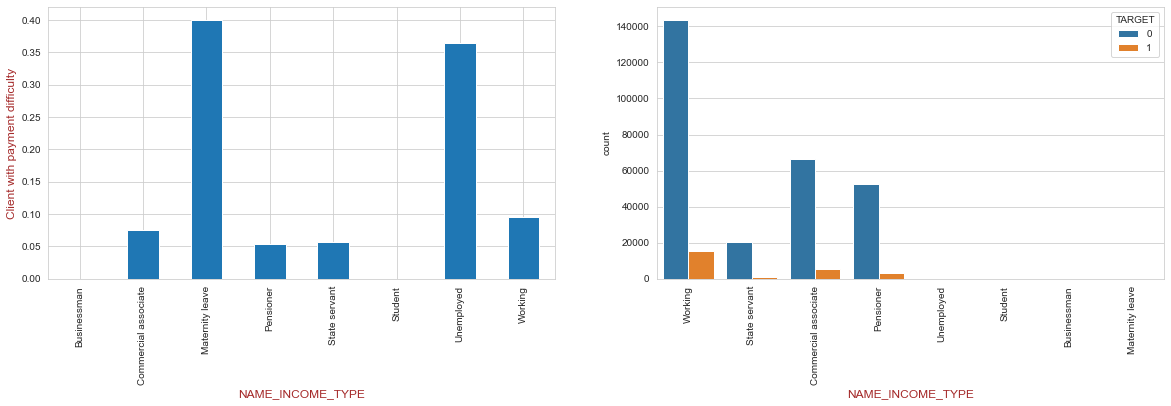

NAME_EDUCATION_TYPE:


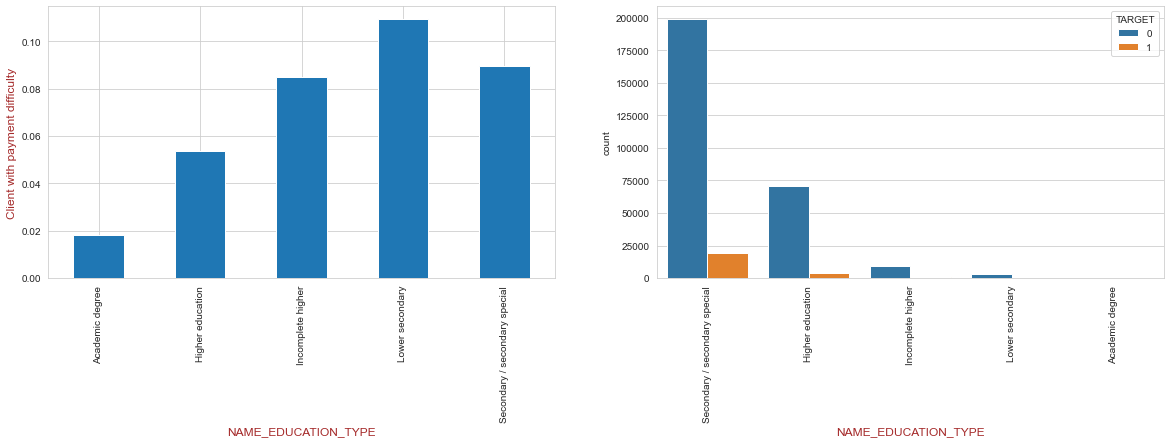

NAME_FAMILY_STATUS:


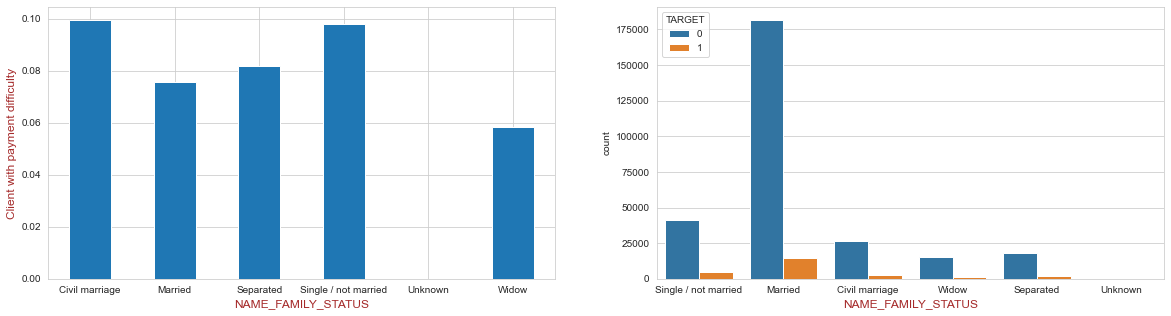

NAME_HOUSING_TYPE:


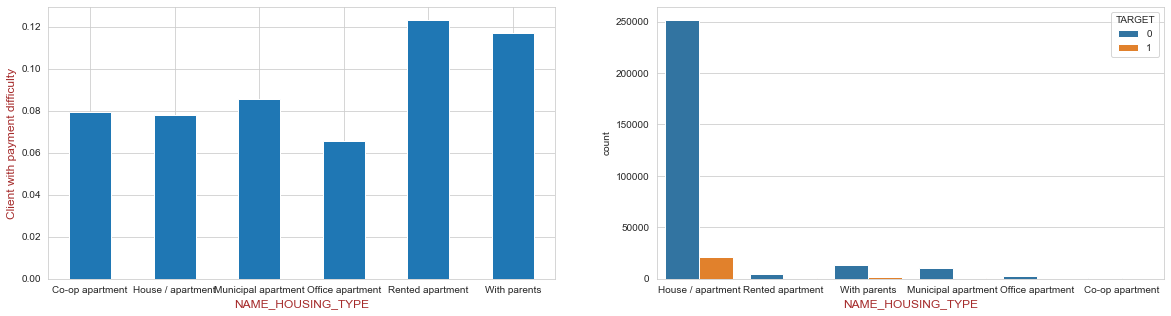

OCCUPATION_TYPE:


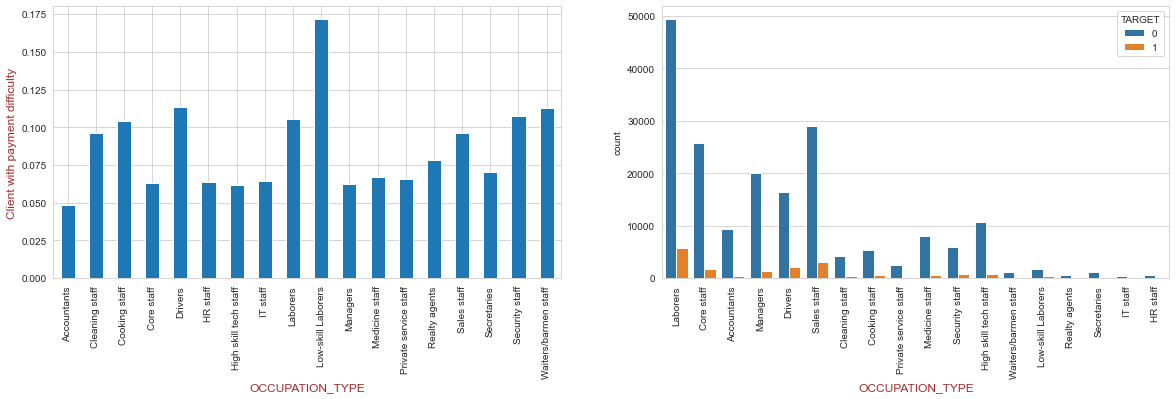

REGION_RATING_CLIENT:


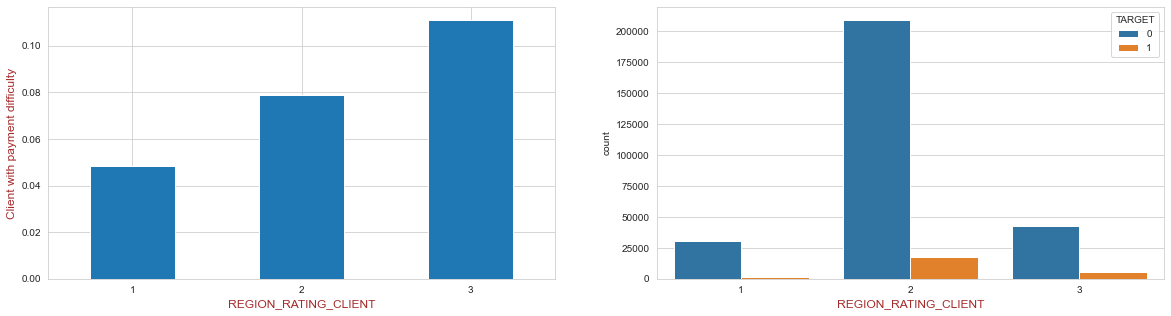

REGION_RATING_CLIENT_W_CITY:


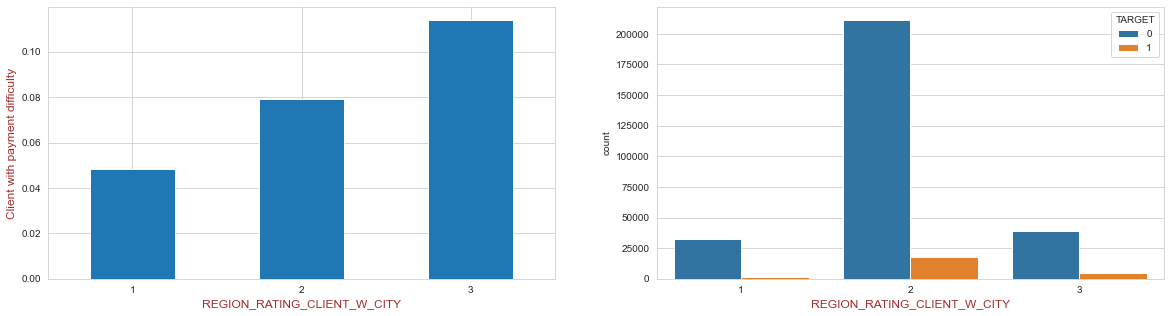

REG_REGION_NOT_LIVE_REGION:


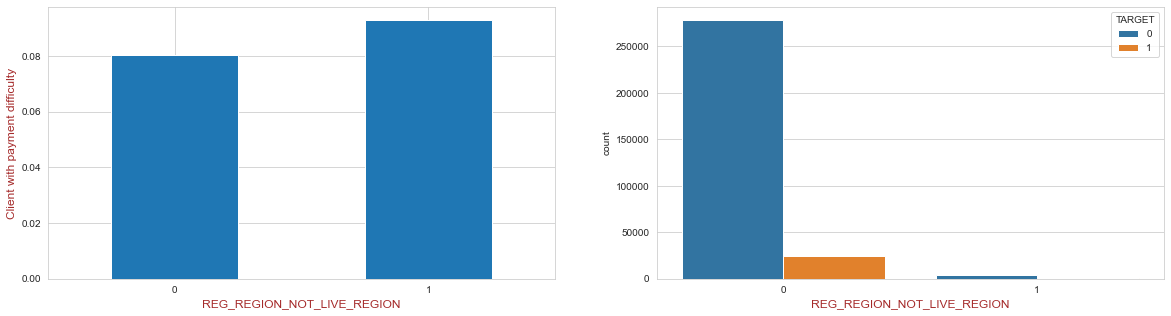

REG_REGION_NOT_WORK_REGION:


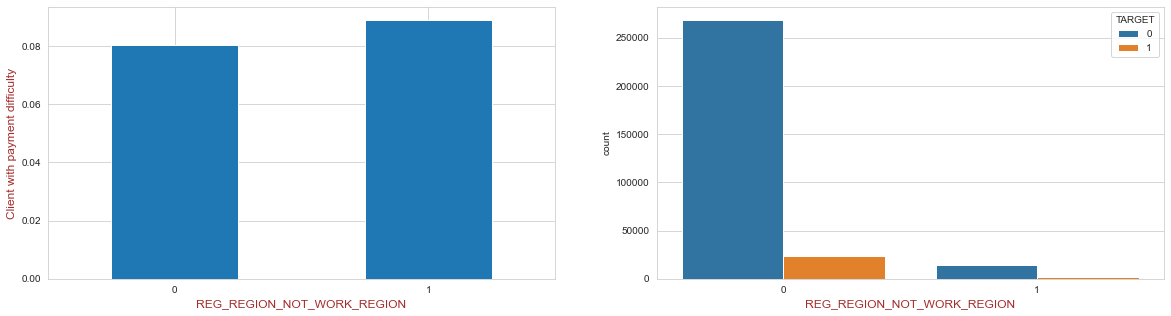

LIVE_REGION_NOT_WORK_REGION:


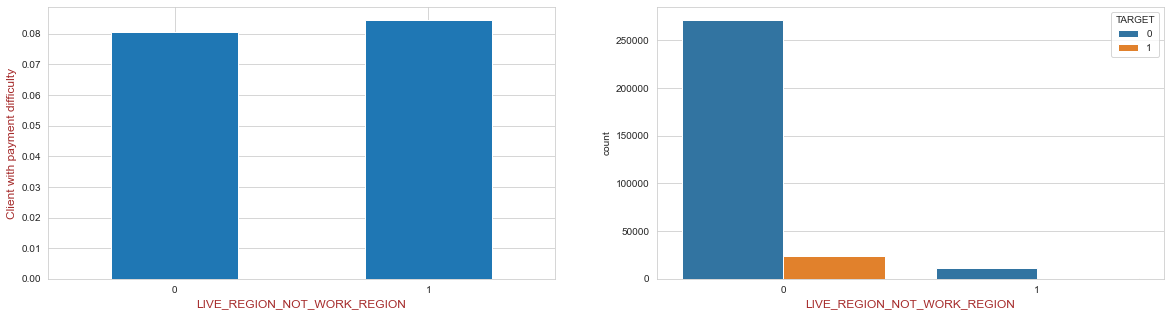

REG_CITY_NOT_LIVE_CITY:


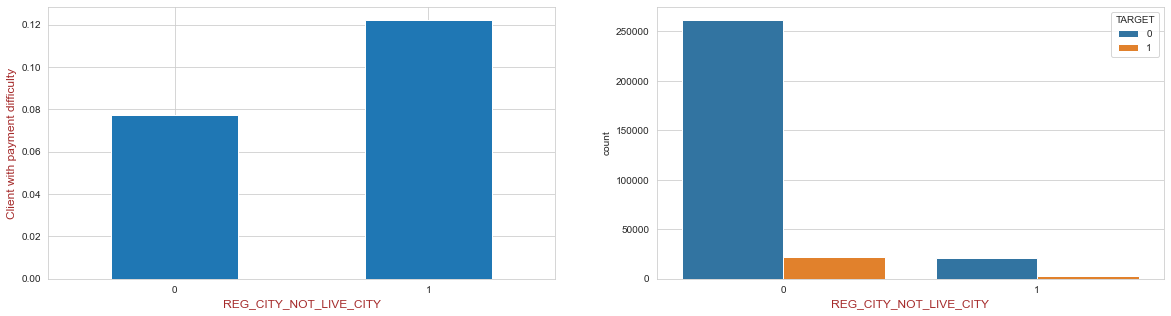

REG_CITY_NOT_WORK_CITY:


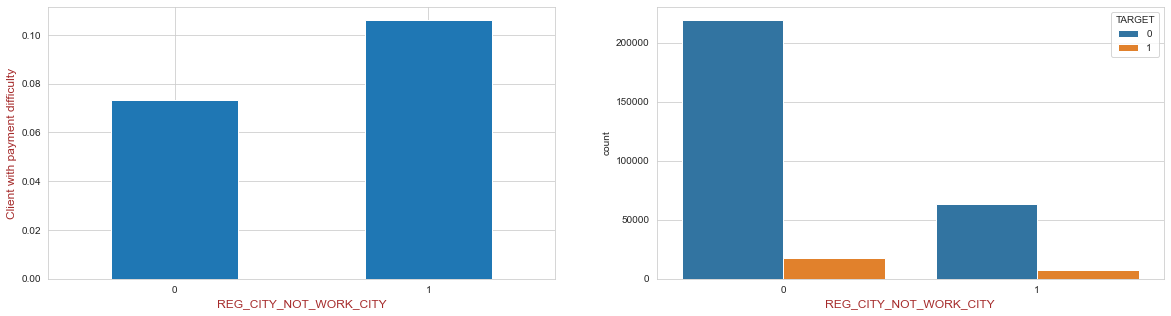

LIVE_CITY_NOT_WORK_CITY:


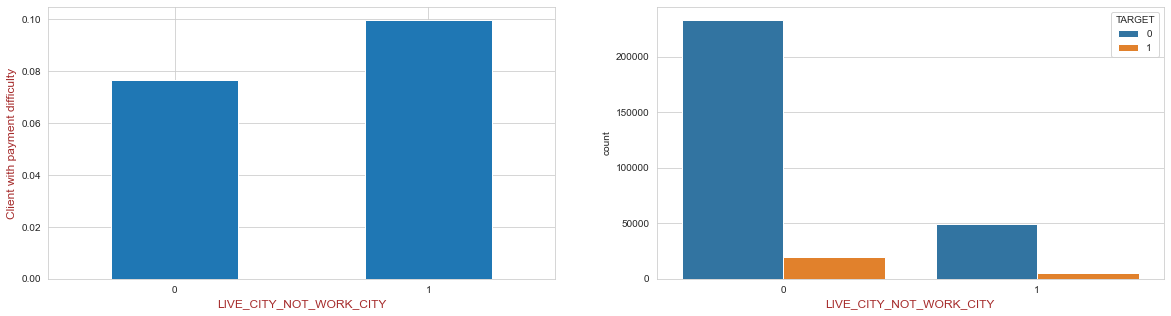

ORGANIZATION_TYPE:


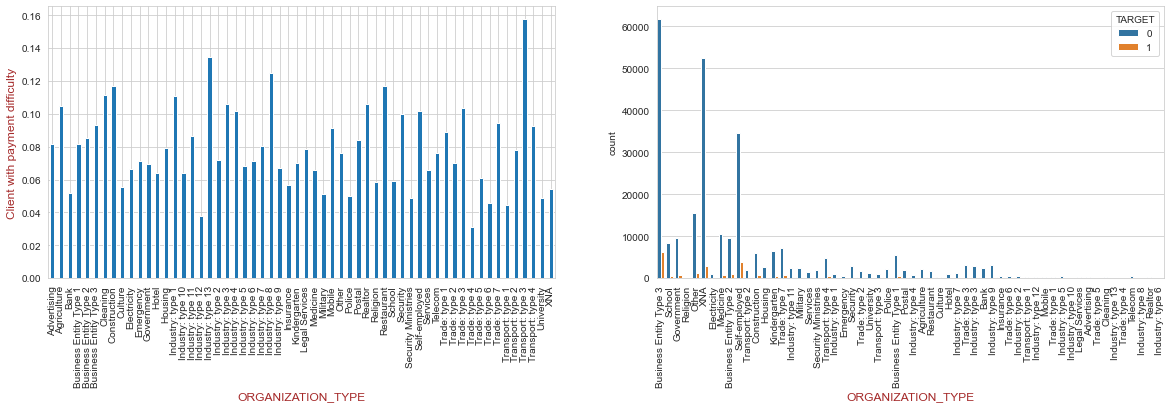

In [24]:
for col in inp0_cat_cols:
    print("\033[1m"+col+":"+"\033[0m")
    
    fig,axs=plt.subplots(1,2)
    fig.set_figheight(5)
    fig.set_figwidth(20)
    
    if col == "OCCUPATION_TYPE" or col == "ORGANIZATION_TYPE" or col == "NAME_INCOME_TYPE" or col == "NAME_EDUCATION_TYPE":
        inp0.groupby(col)["TARGET"].mean().plot.bar(ax=axs[0],rot=90)
    else:
        inp0.groupby(col)["TARGET"].mean().plot.bar(ax=axs[0],rot=0)
    
    axs[0].set_xlabel(col, fontdict={"fontsize":12, "fontweight": 5, "color":"Brown"})
    axs[0].set_ylabel("Client with payment difficulty", fontdict={"fontsize":12, "fontweight":5, "color":"Brown"})
    
    sns.countplot(inp0[col],hue=inp0["TARGET"])
    axs[1].set_xlabel(col, fontdict={"fontsize":12, "fontweight": 5, "color":"Brown"})
    
    if col == "OCCUPATION_TYPE" or col == "ORGANIZATION_TYPE" or col == "NAME_INCOME_TYPE" or col == "NAME_EDUCATION_TYPE":
        plt.xticks(rotation = 90)
    else:
        plt.xticks(rotation = 0)
    
    plt.show()

#### Numerical columns:

##### Making buckets:

In [25]:
inp0["income_group"] = pd.cut(inp0["AMT_INCOME_TOTAL"],bins = [0,100000,200000,300000,400000,2.0000e+08],labels=["0-100000","100000-200000","200000-300000","300000-400000","400000+"])

inp0["credit_group"] = pd.cut(inp0["AMT_CREDIT"],bins = [0,200000,400000,600000,800000,2.0000e+08],labels=["0-200000","200000-400000","400000-600000","600000-800000","800000+"])

inp0["annuity_group"] = pd.cut(inp0["AMT_ANNUITY"],bins = [0,10000,20000,30000,40000,2.0000e+08],labels=["0-10000","10000-20000","20000-30000","30000-40000","40000+"])

inp0["goods_price_group"] = pd.cut(inp0["AMT_GOODS_PRICE"],bins = [0,200000,400000,600000,800000,2.0000e+08],labels=["0-200000","200000-400000","400000-600000","600000-800000","80000+"])

inp0["age_group"] = pd.cut(inp0["Age_years"],bins = [0,30,40,50,60,80],labels=["0-30","30-40","40-50","50-60","60+"])

inp0["employed_years_group"] = pd.cut(inp0["Employed_years"],bins = [0,3,6,9,12,12000],labels=["0-3","3-6","6-9","9-12","12+"])

inp0["registration_years_group"] = pd.cut(inp0["Registration_years"],bins = [0,5,10,15,20,12000],labels=["0-5","5-10","10-15","15-20","20+"])

inp0["id_publish_group"] = pd.cut(inp0["Id_Publish_years"],bins = [0,3,6,9,12,12000],labels=["0-3","3-6","6-9","9-12","12+"])

inp0["phone_change_group"] = pd.cut(inp0["LAST_PHONE_CHANGE_years"],bins = [0,2,4,6,8,12000],labels=["0-2","2-4","4-6","6-8","8+"])

In [26]:
inp0_num_col1 = ["income_group","credit_group","annuity_group","goods_price_group","age_group","employed_years_group","registration_years_group","id_publish_group","phone_change_group"]

income_group:


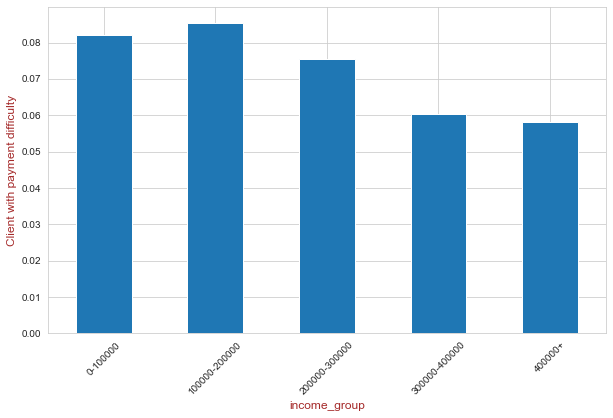

credit_group:


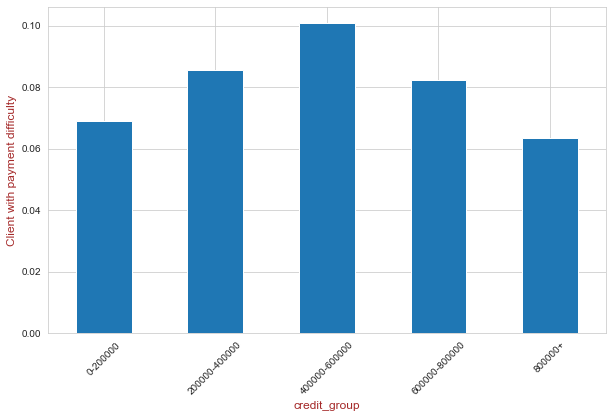

annuity_group:


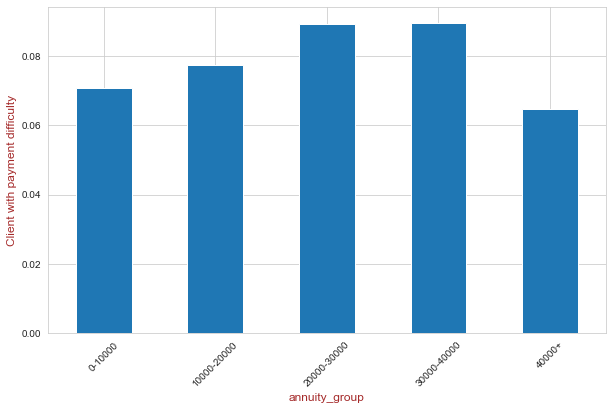

goods_price_group:


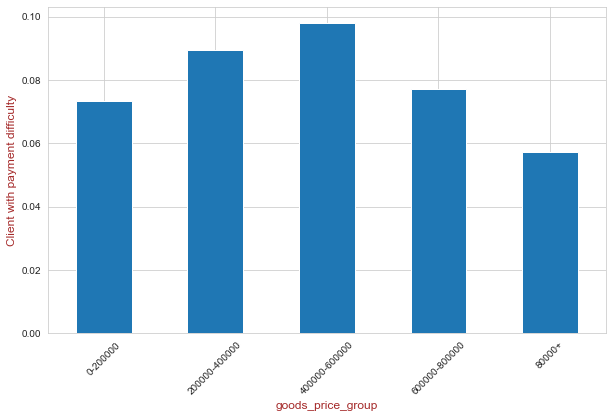

age_group:


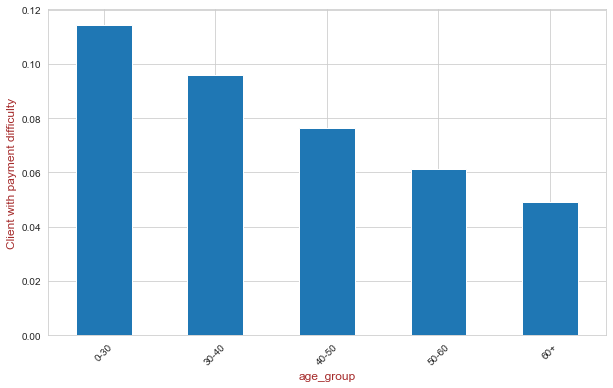

employed_years_group:


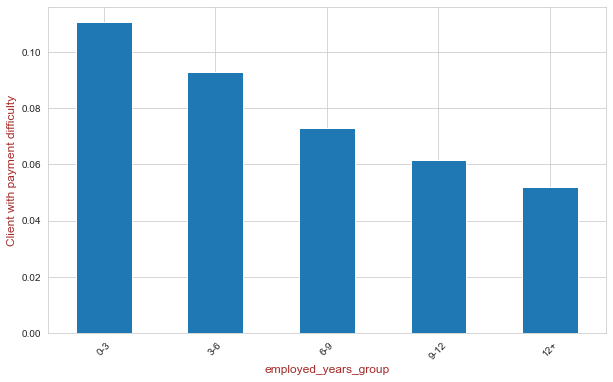

registration_years_group:


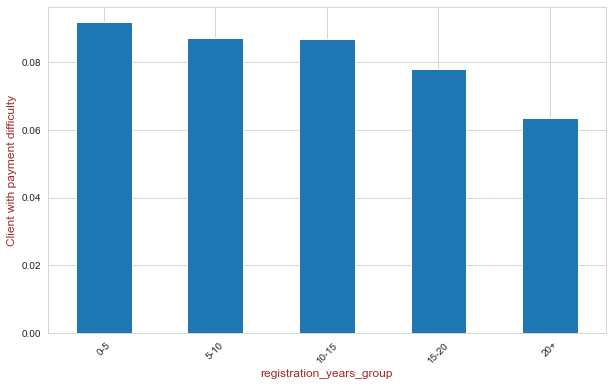

id_publish_group:


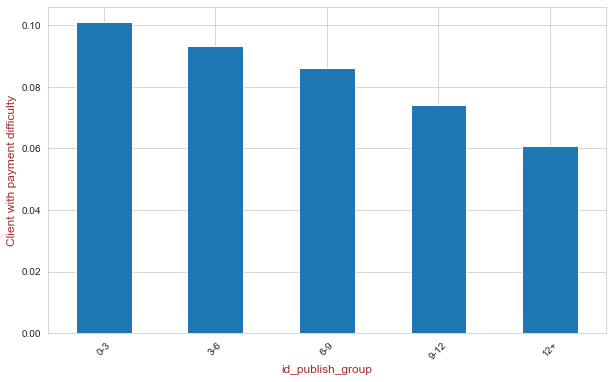

phone_change_group:


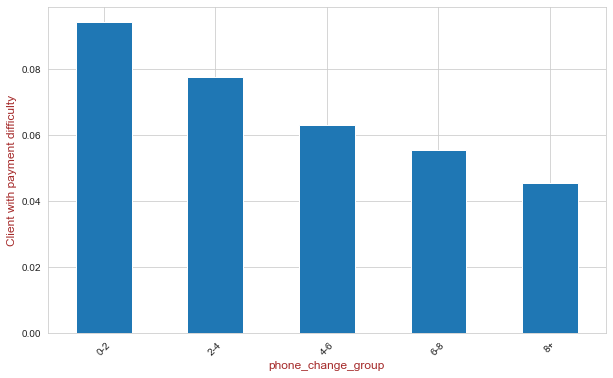

In [27]:
for col in inp0_num_col1:
    print("\033[1m"+col+":"+"\033[0m")
    
    plt.figure(figsize=(10,6))
    
    inp0.groupby(col)["TARGET"].mean().plot.bar()
    
    plt.xlabel(col, fontdict={"fontsize":12, "fontweight": 5, "color":"Brown"})
    plt.ylabel("Client with payment difficulty", fontdict={"fontsize":12, "fontweight":5, "color":"Brown"})
    
    plt.xticks(rotation = 45)
    
    plt.show()

AMT_INCOME_TOTAL:
                 mean    median
TARGET                         
0       169077.722266  148500.0
1       165611.760906  135000.0


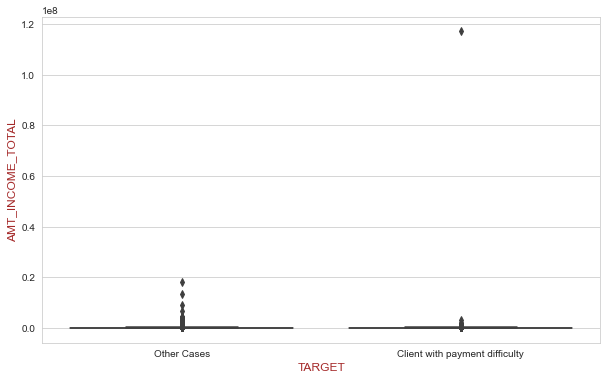

AMT_CREDIT:
                 mean    median
TARGET                         
0       602648.282002  517788.0
1       557778.527674  497520.0


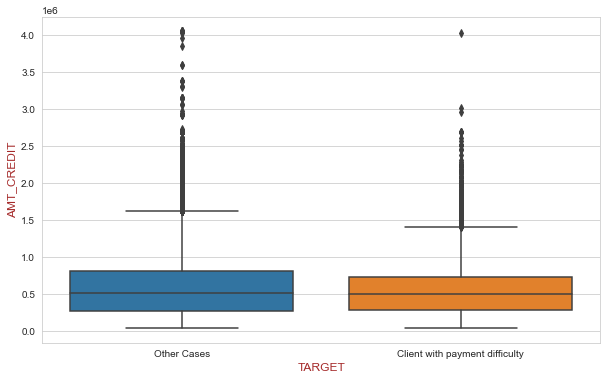

AMT_ANNUITY:
                mean   median
TARGET                       
0       27163.623349  24876.0
1       26481.744290  25263.0


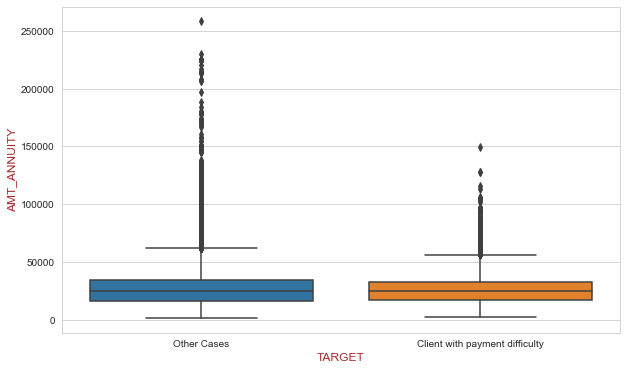

AMT_GOODS_PRICE:
                 mean    median
TARGET                         
0       542736.795003  450000.0
1       488972.412554  450000.0


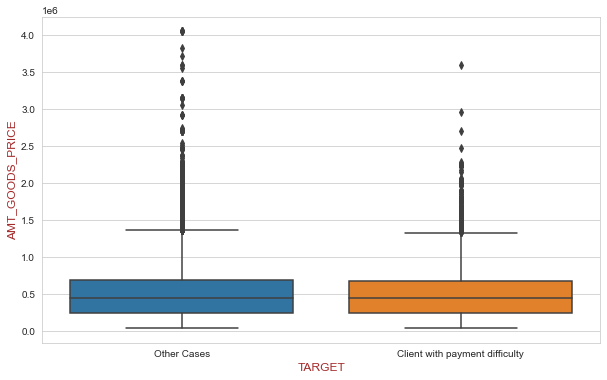

REGION_POPULATION_RELATIVE:
            mean    median
TARGET                    
0       0.021021  0.018850
1       0.019131  0.018634


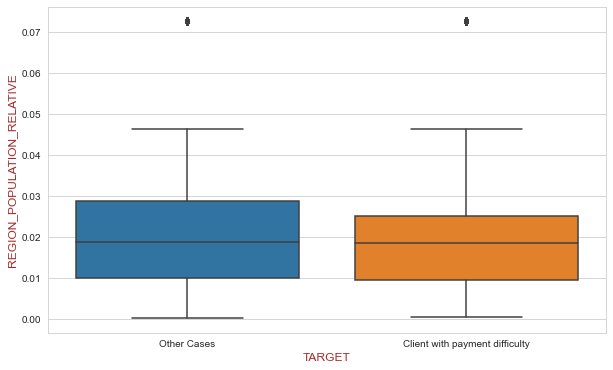

CNT_CHILDREN:
            mean  median
TARGET                  
0       0.412946       0
1       0.463807       0


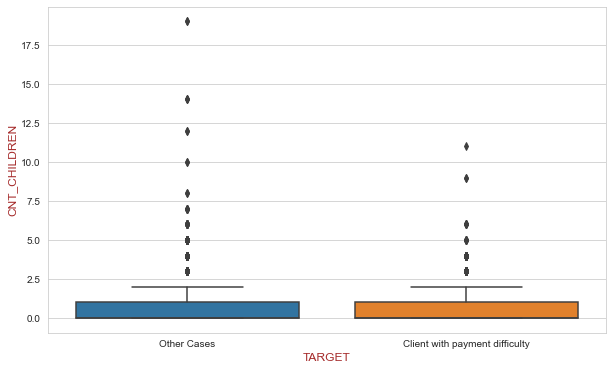

CNT_FAM_MEMBERS:
            mean  median
TARGET                  
0       2.150154     2.0
1       2.181269     2.0


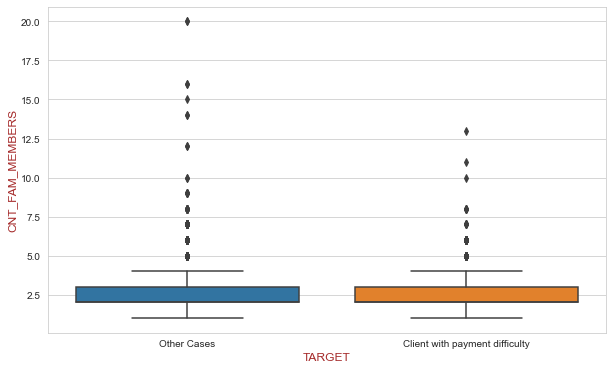

OBS_30_CNT_SOCIAL_CIRCLE:
            mean  median
TARGET                  
0       1.415742     0.0
1       1.496147     0.0


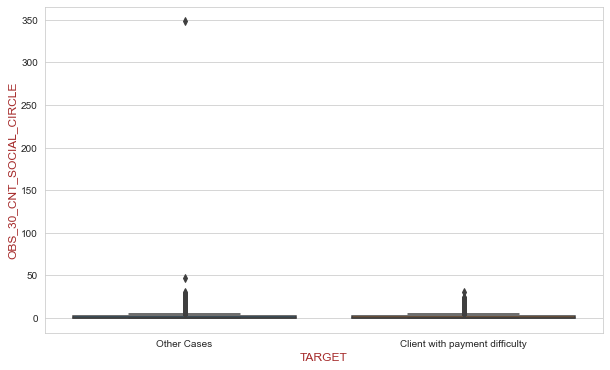

DEF_30_CNT_SOCIAL_CIRCLE:
            mean  median
TARGET                  
0       0.139148     0.0
1       0.191980     0.0


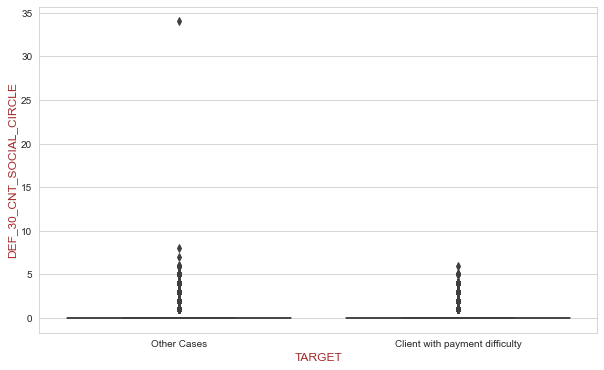

OBS_60_CNT_SOCIAL_CIRCLE:
            mean  median
TARGET                  
0       1.398923     0.0
1       1.477672     0.0


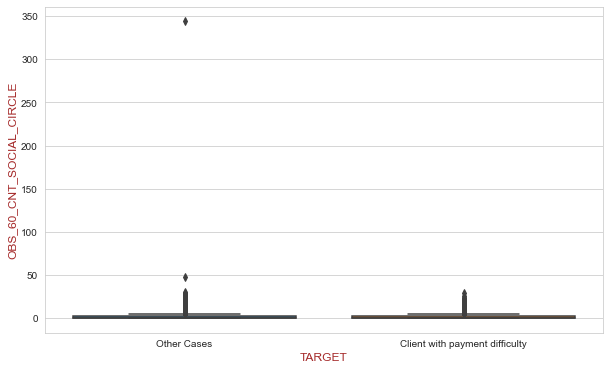

DEF_60_CNT_SOCIAL_CIRCLE:
            mean  median
TARGET                  
0       0.096688     0.0
1       0.138247     0.0


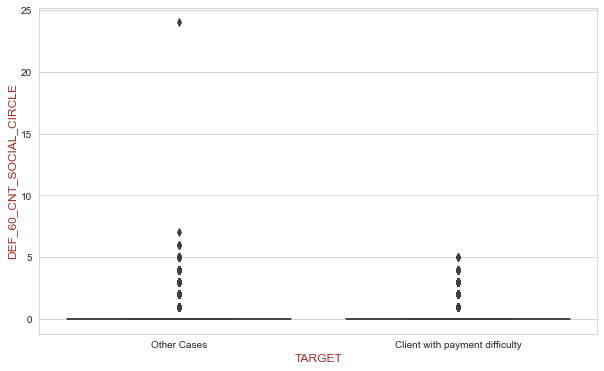

AMT_REQ_CREDIT_BUREAU_HOUR:
            mean  median
TARGET                  
0       0.006380     0.0
1       0.006672     0.0


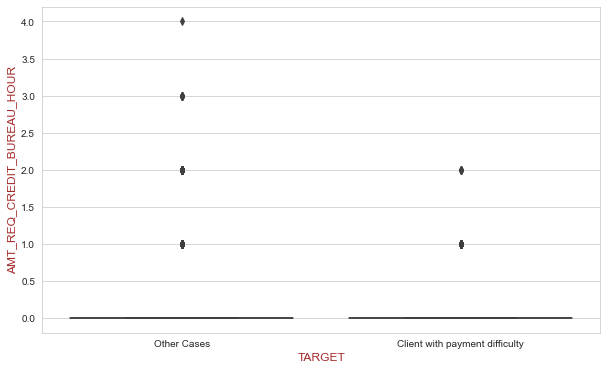

AMT_REQ_CREDIT_BUREAU_DAY:
            mean  median
TARGET                  
0       0.006914     0.0
1       0.008036     0.0


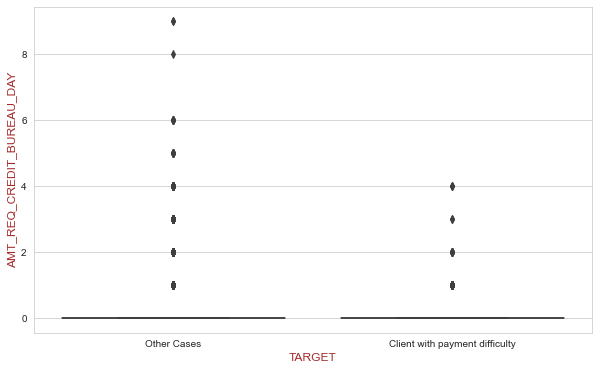

AMT_REQ_CREDIT_BUREAU_WEEK:
            mean  median
TARGET                  
0       0.034315     0.0
1       0.034919     0.0


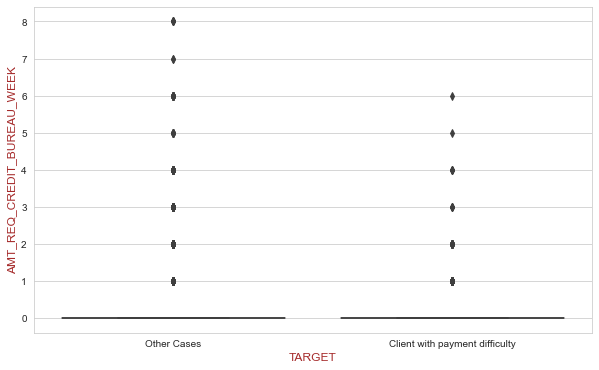

AMT_REQ_CREDIT_BUREAU_MON:
            mean  median
TARGET                  
0       0.270697     0.0
1       0.227926     0.0


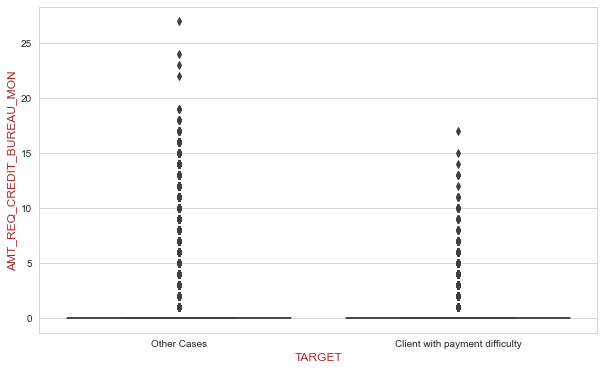

AMT_REQ_CREDIT_BUREAU_QRT:
            mean  median
TARGET                  
0       0.265939     0.0
1       0.259923     0.0


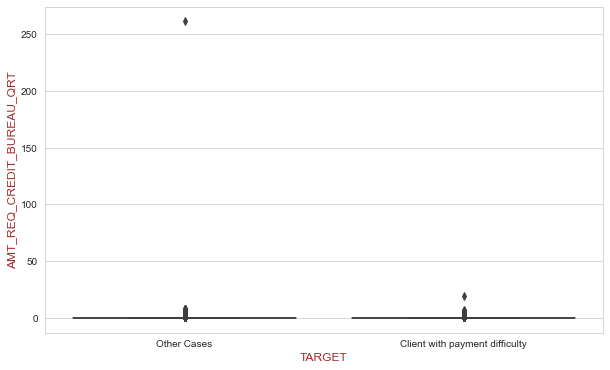

AMT_REQ_CREDIT_BUREAU_YEAR:
            mean  median
TARGET                  
0       1.889199     1.0
1       2.028783     2.0


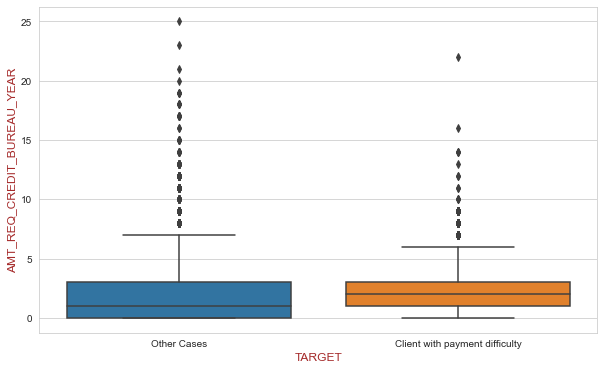

Age_years:
             mean     median
TARGET                      
0       44.214182  43.498630
1       40.780351  39.128767


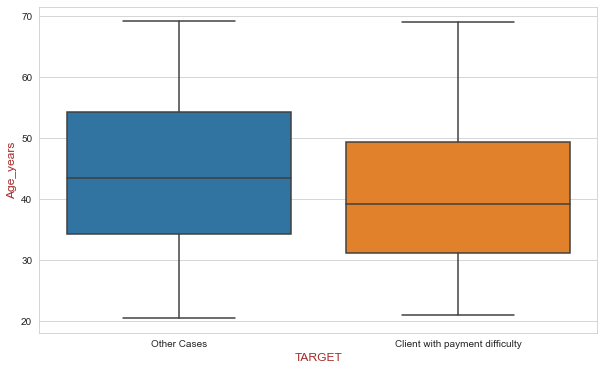

Employed_years:
              mean    median
TARGET                      
0       190.873458  6.312329
1       124.896778  3.994521


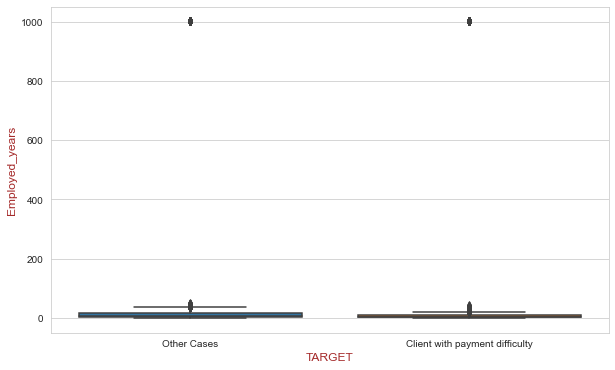

Registration_years:
             mean     median
TARGET                      
0       13.780660  12.449315
1       12.293499  11.112329


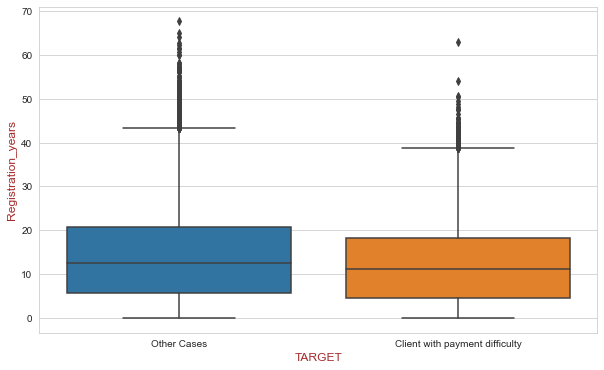

Id_Publish_years:
            mean    median
TARGET                    
0       8.266356  9.027397
1       7.485204  7.663014


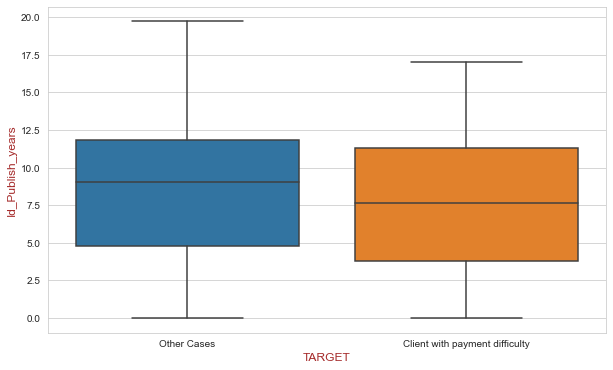

LAST_PHONE_CHANGE_years:
            mean    median
TARGET                    
0       2.675036  2.126027
1       2.215882  1.627397


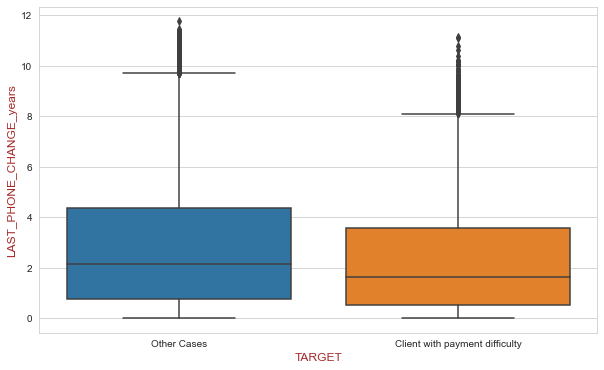

EXT_SOURCE:
            mean    median
TARGET                    
0       0.519109  0.533791
1       0.397003  0.399057


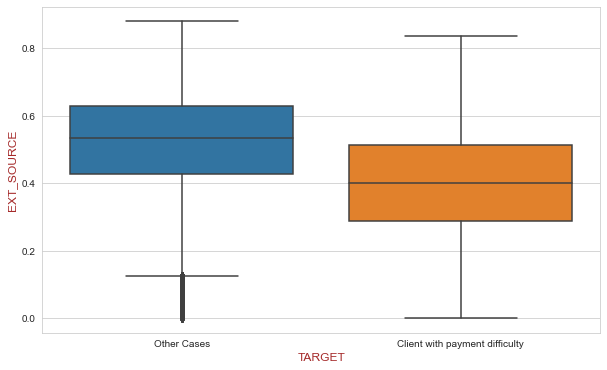

In [28]:
for col in inp0_num_cols:
    print("\033[1m"+col+":"+"\033[0m")

    print(inp0.groupby("TARGET")[col].aggregate(["mean","median"]))
    
    plt.figure(figsize=(10,6))
    
    sns.boxplot(data =inp0, x="TARGET",y=col)
    
    plt.xlabel("TARGET", fontdict={"fontsize":12, "fontweight": 5, "color":"Brown"})
    plt.ylabel(col, fontdict={"fontsize":12, "fontweight":5, "color":"Brown"})
    
    plt.xticks([0,1],["Other Cases","Client with payment difficulty"],rotation = 0)
    
    plt.show()

#### Observations:

Categorical Columns:
1. Cash loan applications is far more than revolving loan application, so clearly number of clients defaulted is more in cash loans.
2. Interistingly female applied more for loans but male clients have more tendancy towards defaulting.
3. Owning car or house doesnt seem to have impact on payment difficulties, but clients owning neither seems to default more.
4. Clients on maternaty leave and clients who are unemployed have more rate of defaulting.
5. Clients having lower secodary education have defaulted rate more than secondary/secondary special and incomplete higher.
6. Clients with civil marriage and single clients have more default rate.
7. Clients who live in rented appartment and those who live with parents have high default rate.
8. Low-skill laborers have highest rate of default.
9. Type 3 rating of region and region considering city have high default rate.
10. Clients whose address is not matched with parmanent address have defaulted more in terms of rate.
11. Transport-type 3 and Industry-type-13 have highest default rate.
12. Clients who have recently changed registration, ID, phone number have slightly more default rate than non defaulters.
13. Younger people less than 30 years of age seems to default more.
14. People with who just started working or experience between 0-3 years have more default rate.

Numerical Columns
1. There is no significant difference between mean and median salaries of defaulted clients and non-defaulted clients. Clients with income between 0-200000 have default rate slightly more than others.
2. Spread of clients with dificulty is slightly less than other cases. Clients with credit amount between 400000-600000 have more default rate.
3. Spread of clients with dificulty is slightly less than other cases. Clients with credit amount between 20000-40000 have more default rate.
4. Clients with annuity amount between 400000-600000 have more default rate.
5. Clients with payment difficulty lives slightly less populated region than non defaulters.
6. People who have less score have defaulted more.

### 7. Bivariate analysis:

In [29]:
cat_list = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_FAMILY_STATUS','OCCUPATION_TYPE',"age_group","employed_years_group","income_group","credit_group","registration_years_group","id_publish_group","phone_change_group"]

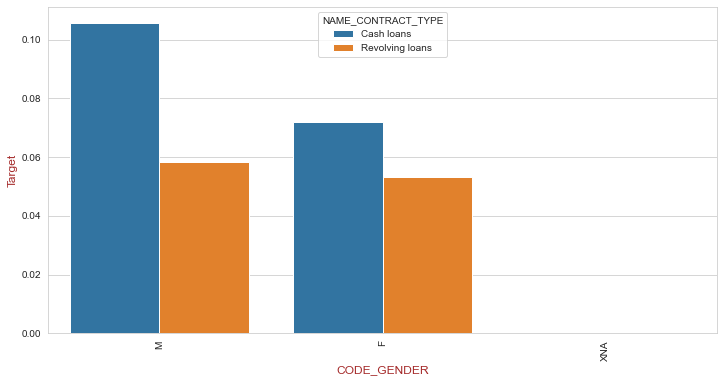

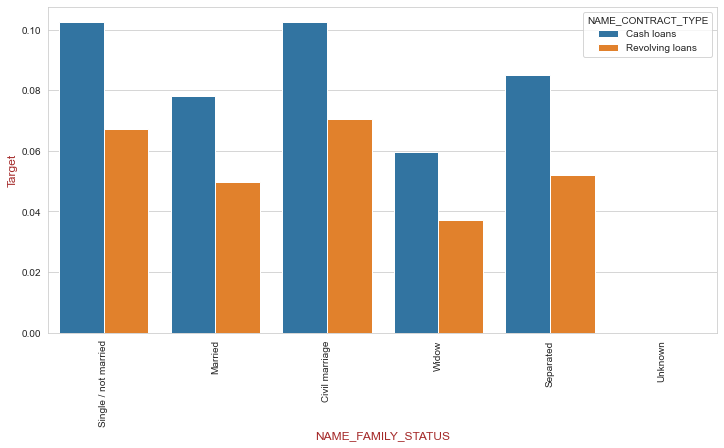

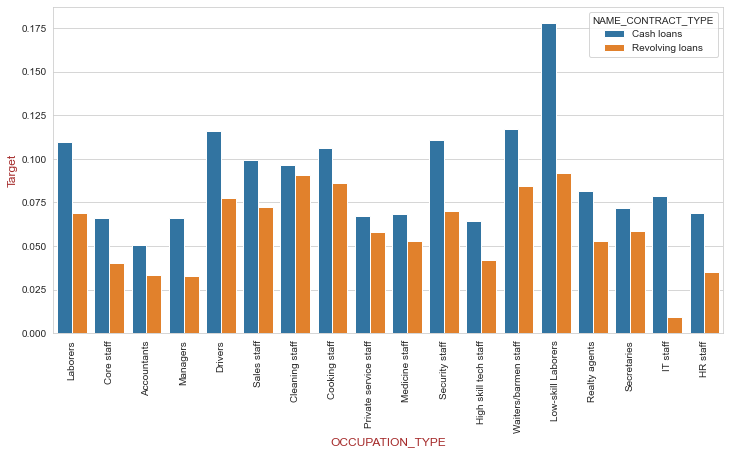

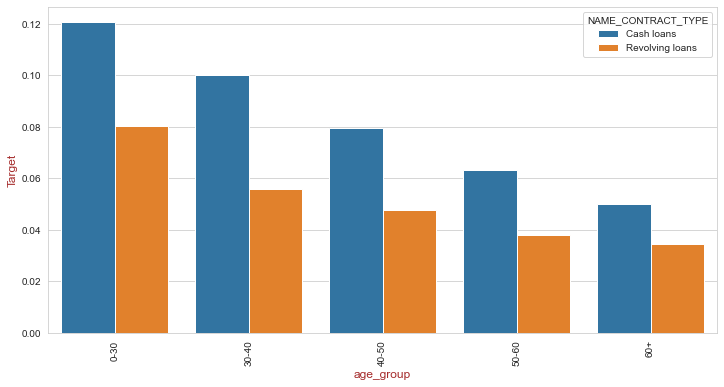

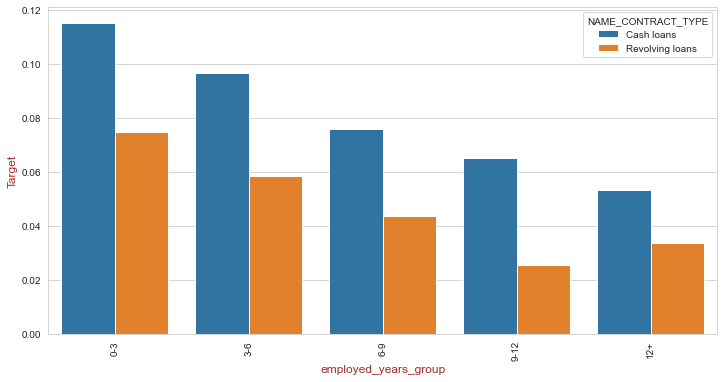

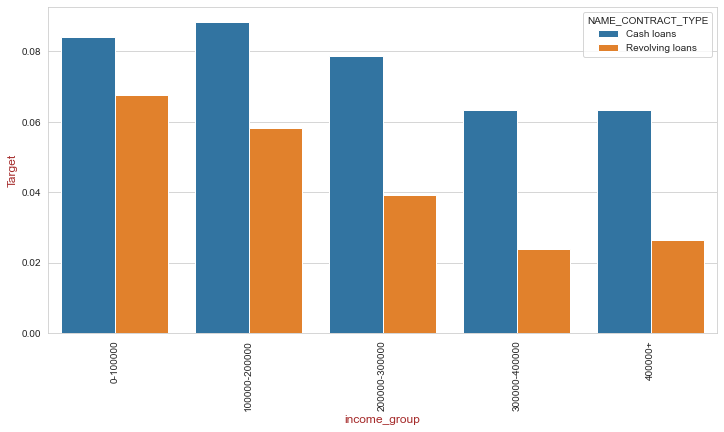

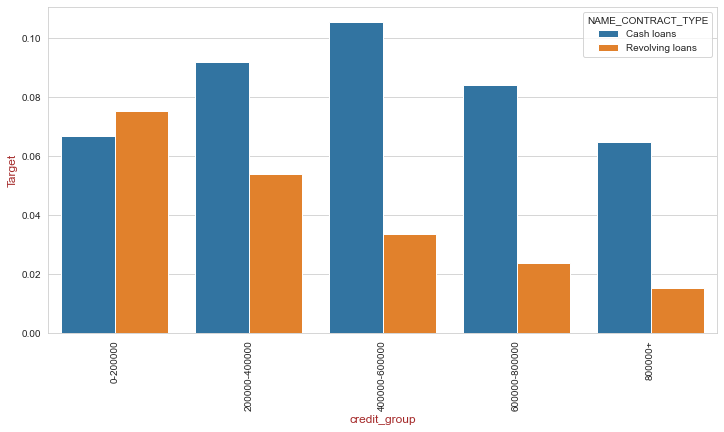

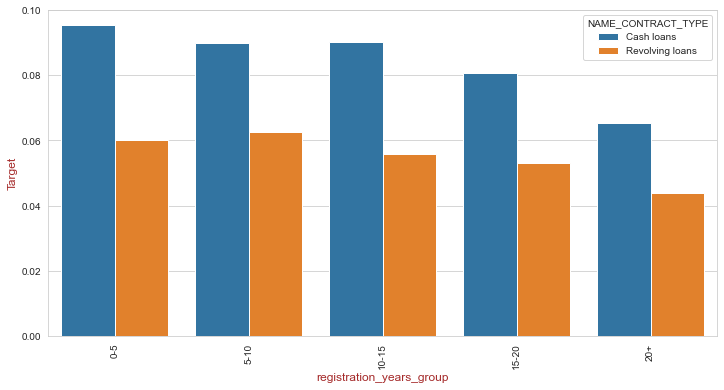

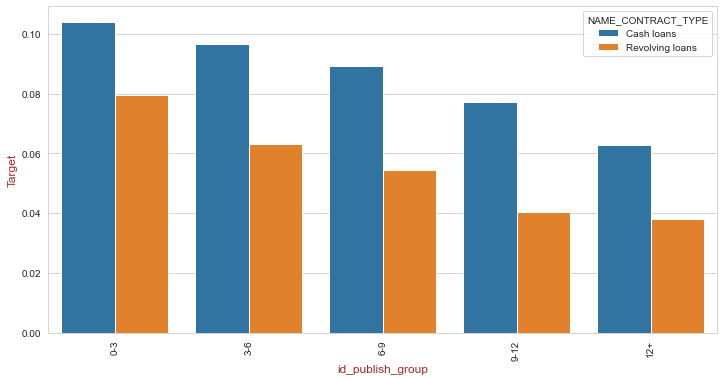

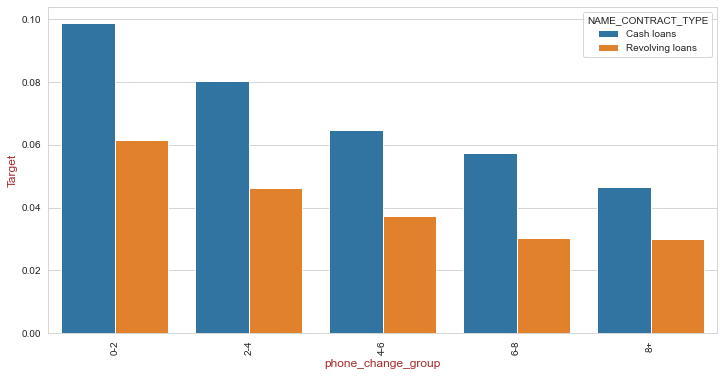

In [30]:
plot_list = cat_list.copy()

for i in plot_list:
    if i != "NAME_CONTRACT_TYPE":
        plt.figure(figsize=(12,6))
        sns.barplot(x=inp0[i],y=inp0["TARGET"],hue=inp0["NAME_CONTRACT_TYPE"],ci=None)

        plt.xlabel(i, fontdict={"fontsize": 12, "fontweight" : 5, "color" : "Brown"})
        plt.ylabel("Target", fontdict={"fontsize": 12, "fontweight" : 5, "color" : "Brown"})
        
        plt.xticks(rotation = 90)

        plt.show()

#### Observations:

1. Male clients with cash loans have more default rate than female clients with cash loans. I
2. Cash loans with single and civil marriage status have defaulted mostly.
3. Low skilled-laborers with cash loans have defaulted the most.
4. Total income between 0-200000 have defaulted more.
5. Age between 0-30 years have defaulted more.
6. Credit between 400000-600000 have defaulted more.
7. Employed less or equal to 3 years have defaulted more.
8. Phone number changed less than 2 years ago have more default rate

## Previous application data:

### 1. Reading previous application dataset and checking basic info:

In [31]:
inp1 = pd.read_csv("previous_application.csv")

In [32]:
inp1.shape

(1670214, 37)

In [33]:
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### 2. Missing Values:

In [35]:
(inp1.isna().sum()/len(inp1))*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

#### Missing value treatment:

In [36]:
# Dropping columns having  missing values more than 40%.
for i in inp1.columns:
    percent = (inp1[i].isna().sum()/len(inp1))*100
    if (percent > 40):
        inp1 = inp1.drop([i],axis=1)

In [37]:
inp1.shape

(1670214, 26)

##### AMT_ANNUITY and CNT_PAYMENT

In [38]:
inp1[inp1["AMT_ANNUITY"].isna()][["AMT_APPLICATION","AMT_ANNUITY","CNT_PAYMENT","AMT_GOODS_PRICE","NAME_PAYMENT_TYPE","NAME_YIELD_GROUP","NAME_PORTFOLIO","NAME_CONTRACT_STATUS"]].head(120)

,AMT_APPLICATION,AMT_ANNUITY,CNT_PAYMENT,AMT_GOODS_PRICE,NAME_PAYMENT_TYPE,NAME_YIELD_GROUP,NAME_PORTFOLIO,NAME_CONTRACT_STATUS
6,0.000,NaN,NaN,NaN,XNA,XNA,XNA,Canceled
7,0.000,NaN,NaN,NaN,XNA,XNA,XNA,Canceled
8,0.000,NaN,NaN,NaN,XNA,XNA,XNA,Canceled
9,0.000,NaN,NaN,NaN,XNA,XNA,XNA,Canceled
22,0.000,NaN,NaN,NaN,XNA,XNA,XNA,Refused
24,0.000,NaN,NaN,NaN,XNA,XNA,XNA,Canceled
29,0.000,NaN,NaN,NaN,XNA,XNA,XNA,Refused
32,0.000,NaN,NaN,NaN,XNA,XNA,XNA,Canceled
33,0.000,NaN,NaN,NaN,XNA,XNA,XNA,Canceled
41,17950.500,NaN,NaN,17950.500,Cash through the bank,XNA,XNA,Unused offer


Missing value treatment: 

1. It seems missing values for amount of annuity, amount of goods price and term of previous credit depennds on canceled application, refused application and unused offer by client. There are some values for goods price amount pesent for which amount of annuity missing this is in case of unused offer and refused application.
2. These missing values can be replaced by zero.

For this EDA purpose these missing values are kept as it is.

##### Missing values in the form of XNA:

In [39]:
# Checking hidden missing value in contract type column.
inp1["NAME_CONTRACT_TYPE"].value_counts(normalize=True)

Cash loans         0.447579
Consumer loans     0.436561
Revolving loans    0.115652
XNA                0.000207
Name: NAME_CONTRACT_TYPE, dtype: float64

In [40]:
# Checking hidden missing value in payment type:
inp1[inp1["NAME_PAYMENT_TYPE"] == "XNA"]["NAME_PAYMENT_TYPE"].count()

627384

In [41]:
# Checking hidden missing value in client type:
(inp1[inp1["NAME_CLIENT_TYPE"] == "XNA"]["NAME_CLIENT_TYPE"].count()/len(inp1))*100

0.11621265298937741

In [42]:
# Checking hidden missing value in grouped interest column:
(inp1[inp1["NAME_YIELD_GROUP"] == "XNA"]["NAME_YIELD_GROUP"].count()/len(inp1))*100

30.96698985878456

In [43]:
# Checking hidden missing value in product type:
(inp1[inp1["NAME_PRODUCT_TYPE"] == "XNA"]["NAME_PRODUCT_TYPE"].count()/len(inp1))*100

63.68441409304436

In [44]:
# Checking hidden missing value in cash loan purpose:
(inp1[inp1["NAME_CASH_LOAN_PURPOSE"] == "XNA"]["NAME_CASH_LOAN_PURPOSE"].count()/len(inp1))*100

40.588691030011724

In [45]:
# Checking hidden missing value in goods name column:
(inp1[inp1["NAME_GOODS_CATEGORY"] == "XNA"]["NAME_GOODS_CATEGORY"].count()/len(inp1))*100

56.92737577340389

In [46]:
# Checking hidden missing value in name portfolio column:
(inp1[inp1["NAME_PORTFOLIO"] == "XNA"]["NAME_PORTFOLIO"].count()/len(inp1))*100

22.286365699245724

In [47]:
# Checking hidden missing value in seller industy column:
(inp1[inp1["NAME_SELLER_INDUSTRY"] == "XNA"]["NAME_SELLER_INDUSTRY"].count()/len(inp1))*100

51.23415322826895

Missing value treatment: 

1. Missing values in contract type and client type are very low in numbers, these data points can be dropped.
2. Missing values in payment, grouped interset rate and name portfolio columns are seem to be missing because of cancelled application, refused application and unused offer. We can create new category for these values.
3. Product type, cash loan purpose, goods name, sellery industry columns have missing values more than 40% in the form of XNA, we can drop these columns.

For this EDA purpose these missing values are kept as it is.

### 3. Outlier handling and Univariate analysis:

In [48]:
var_list = ["AMT_APPLICATION", "NAME_CONTRACT_TYPE", "AMT_ANNUITY", "AMT_CREDIT","NAME_PAYMENT_TYPE","NAME_CLIENT_TYPE",
            "PRODUCT_COMBINATION", "CHANNEL_TYPE", "CNT_PAYMENT","NAME_YIELD_GROUP"]

In [49]:
inp1_cat_cols = []
inp1_num_cols = []

for i in var_list:
    if inp1[i].dtype == "object":
        inp1_cat_cols.append(i)
    else:
        inp1_num_cols.append(i)

##### Numerical Columns:

AMT_APPLICATION:
count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64


Quantiles of AMT_APPLICATION: 
0.50      71046.0
0.70     144769.5
0.90     450000.0
0.95     787500.0
0.99    1350000.0
Name: AMT_APPLICATION, dtype: float64


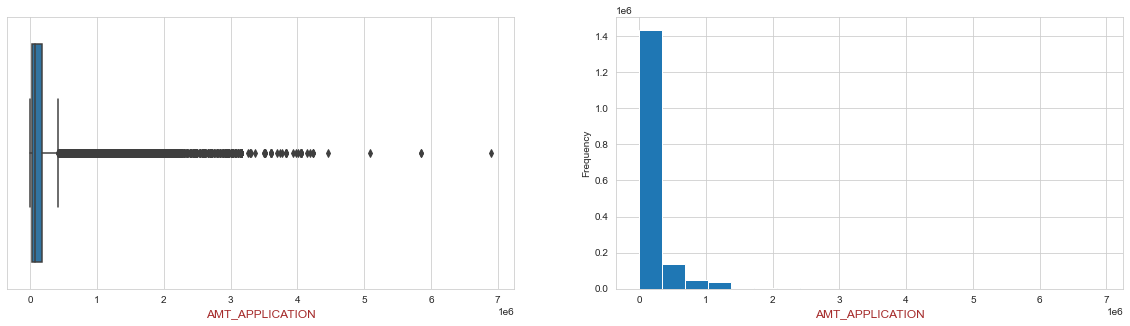

AMT_ANNUITY:
count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64


Quantiles of AMT_ANNUITY: 
0.50    11250.0000
0.70    17783.1270
0.90    34703.8200
0.95    45336.7800
0.99    69685.7886
Name: AMT_ANNUITY, dtype: float64


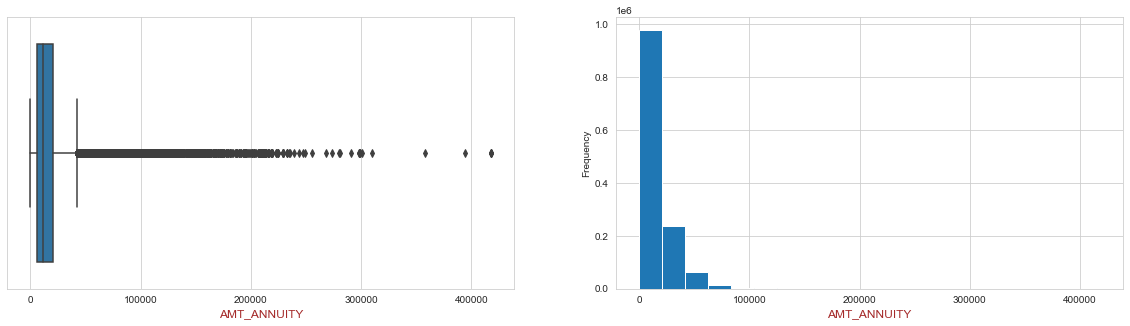

AMT_CREDIT:
count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64


Quantiles of AMT_CREDIT: 
0.50      80541.0
0.70     167895.0
0.90     533160.0
0.95     886500.0
0.99    1515377.7
Name: AMT_CREDIT, dtype: float64


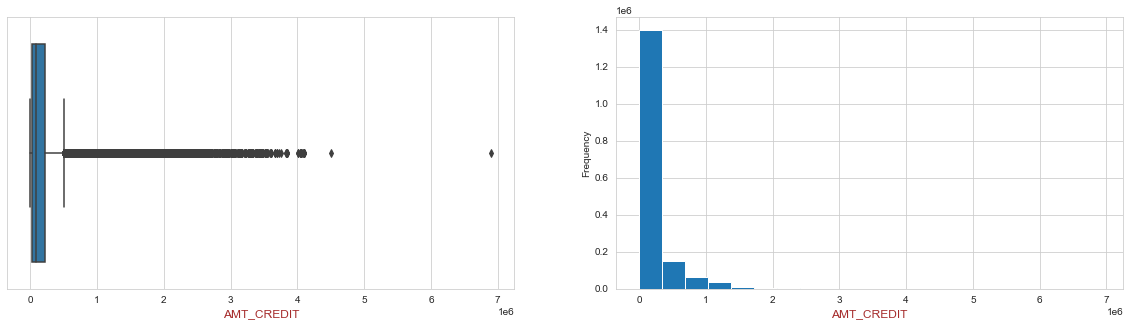

CNT_PAYMENT:
count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64


Quantiles of CNT_PAYMENT: 
0.50    12.0
0.70    18.0
0.90    36.0
0.95    48.0
0.99    60.0
Name: CNT_PAYMENT, dtype: float64


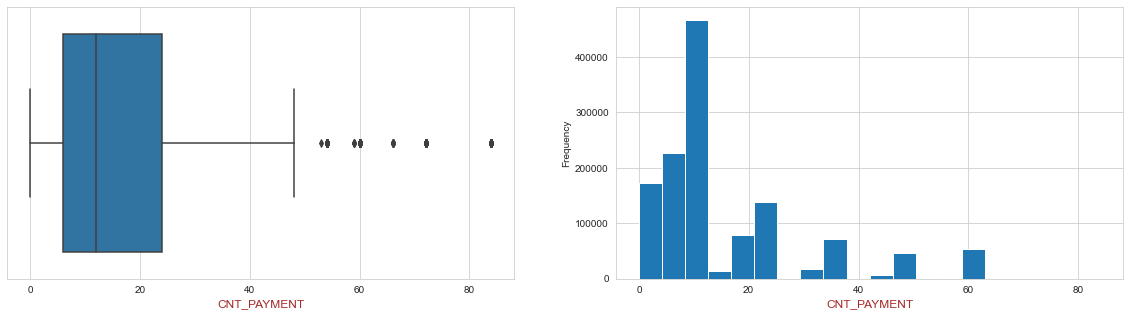

In [50]:
for col in inp1_num_cols:
    print("\033[1m"+col+":"+"\033[0m")
        
    print(inp1[col].describe())
    
    quants = inp1[col].quantile([0.5,0.7,0.9,0.95,0.99])
    print("\n")
    print(f"Quantiles of {col}: \n{quants}")
    
    fig,axs=plt.subplots(1,2)
    fig.set_figheight(5)
    fig.set_figwidth(20)

    sns.boxplot(data=inp1, x=col,ax=axs[0])
    axs[0].set_xlabel(col, fontdict={"fontsize":12, "fontweight":5, "color":"Brown"})

    inp1[col].plot.hist(ax=axs[1],bins=20)
    axs[1].set_xlabel(col, fontdict={"fontsize":12, "fontweight":5, "color":"Brown"})

    plt.show()

#### Observations:
Amount of application:
1. There is a huge difference between 95 percentile and 99 percentile, hence outliers are present in ammount of application columns.
2. 95% of applications are for ammount below 790000.

Amount of loan annuity:
1. There are some outiers present in loan annuity amount, data points above 99% can be considered as outliers.
2. 99 % of data is below 70000.

Amount of credit:
1. There is a huge difference between 95 percentile and 99 percentile, data above 95 percentile can be considerd as outliers.
2. 95% of applications are for ammount below 900000.

##### Categorical columns:

NAME_CONTRACT_TYPE:
Cash loans         0.447579
Consumer loans     0.436561
Revolving loans    0.115652
XNA                0.000207
Name: NAME_CONTRACT_TYPE, dtype: float64


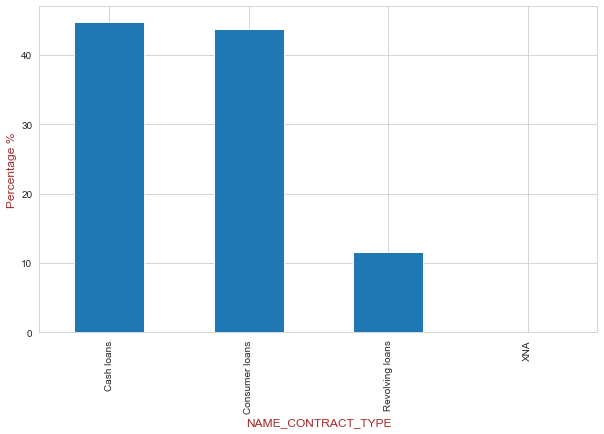

NAME_PAYMENT_TYPE:
Cash through the bank                        0.618814
XNA                                          0.375631
Non-cash from your account                   0.004905
Cashless from the account of the employer    0.000650
Name: NAME_PAYMENT_TYPE, dtype: float64


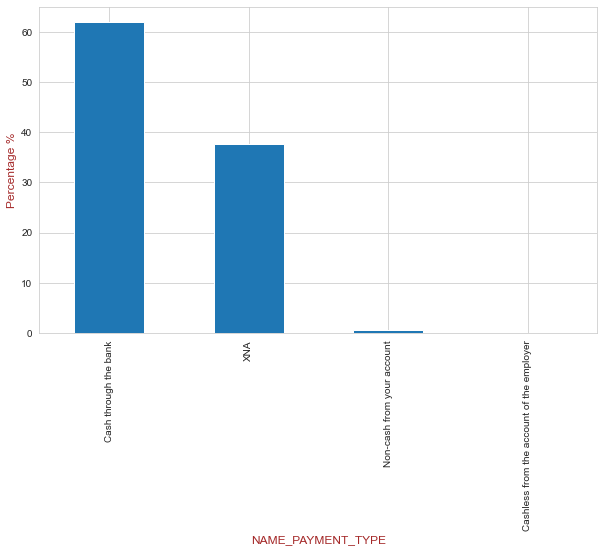

NAME_CLIENT_TYPE:
Repeater     0.737188
New          0.180434
Refreshed    0.081217
XNA          0.001162
Name: NAME_CLIENT_TYPE, dtype: float64


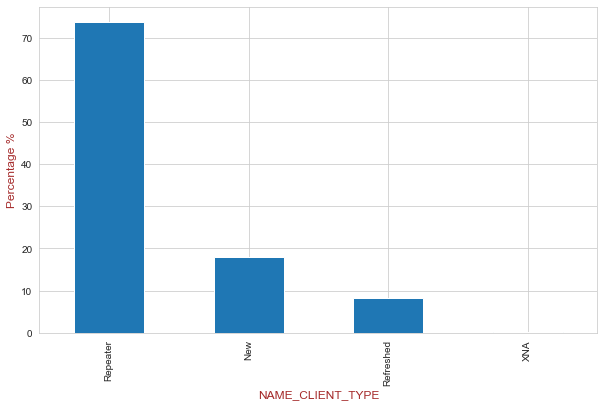

PRODUCT_COMBINATION:
Cash                              0.171265
POS household with interest       0.157870
POS mobile with interest          0.132148
Cash X-Sell: middle               0.086164
Cash X-Sell: low                  0.077999
Card Street                       0.067420
POS industry with interest        0.059186
POS household without interest    0.049649
Card X-Sell                       0.048257
Cash Street: high                 0.035715
Cash X-Sell: high                 0.035512
Cash Street: middle               0.020755
Cash Street: low                  0.020261
POS mobile without interest       0.014421
POS other with interest           0.014300
POS industry without interest     0.007547
POS others without interest       0.001530
Name: PRODUCT_COMBINATION, dtype: float64


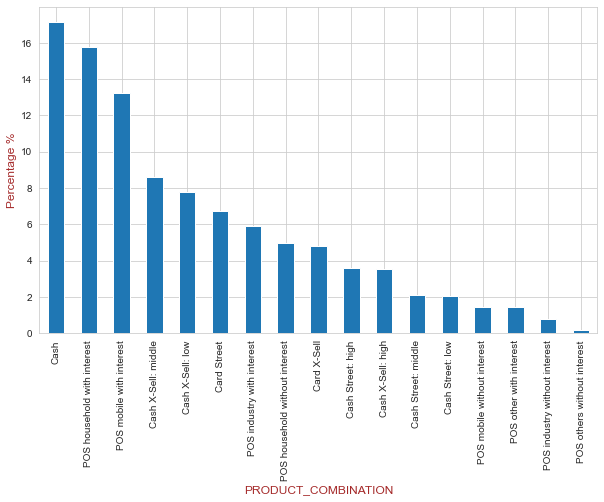

CHANNEL_TYPE:
Credit and cash offices       0.431063
Country-wide                  0.296184
Stone                         0.126980
Regional / Local              0.064978
Contact center                0.042687
AP+ (Cash loan)               0.034155
Channel of corporate sales    0.003682
Car dealer                    0.000271
Name: CHANNEL_TYPE, dtype: float64


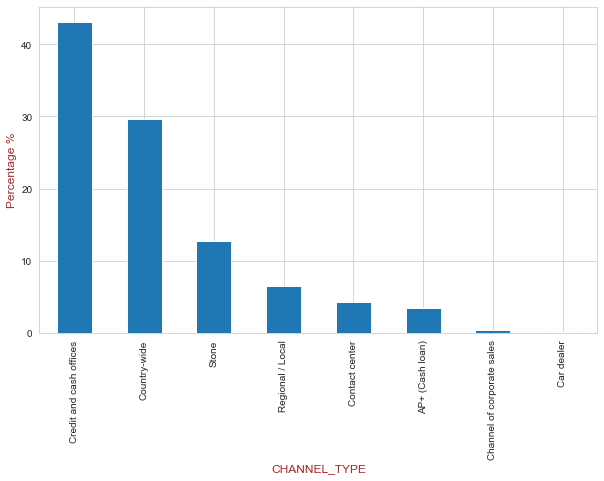

NAME_YIELD_GROUP:
XNA           0.309670
middle        0.230828
high          0.211548
low_normal    0.192847
low_action    0.055107
Name: NAME_YIELD_GROUP, dtype: float64


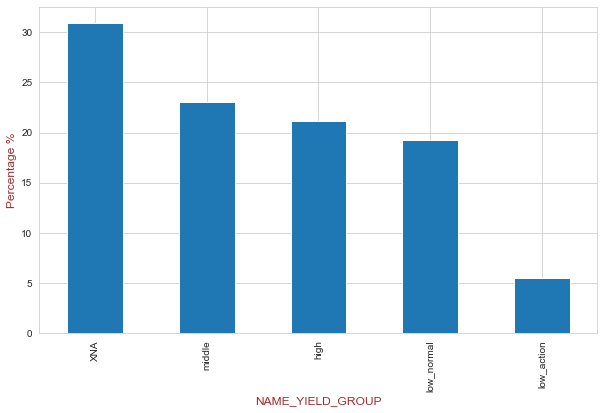

In [51]:
for col in inp1_cat_cols:
    print("\033[1m"+col+":"+"\033[0m")
    
    print(inp1[col].value_counts(normalize=True))
    
    plt.figure(figsize=(10,6))

    (inp1[col].value_counts(normalize=True)*100).plot.bar()

    plt.ylabel("Percentage %", fontdict={"fontsize":12, "fontweight": 5, "color":"Brown"})
    plt.xlabel(col , fontdict={"fontsize":12, "fontweight":5, "color":"Brown"})

    plt.xticks(rotation = 90)
    
    plt.show()

#### Observations:
1. Cash loans and consumer loans are equally popular and more popular than revolving loans.
2. Cash through the bank is the most used payment method.
3. Repeating clients are more than new clients.
4. Application with Cash, POS household with interest and POS mobile with interest product comnination are high in numbers than other types.
5. Credit and cash offices and Country-wide are high in numbers.
6. There is no huge difference in yield group but middle is slightly higher than high yield group and high yield group is slightly higher than low_normal. Low_action yeild group is the lowest in numbers.
7. Approximately 30 % clients have requested insurance.

#### Application status:

In [52]:
inp1["NAME_CONTRACT_STATUS"].value_counts(normalize=True)

Approved        0.620747
Canceled        0.189388
Refused         0.174036
Unused offer    0.015828
Name: NAME_CONTRACT_STATUS, dtype: float64

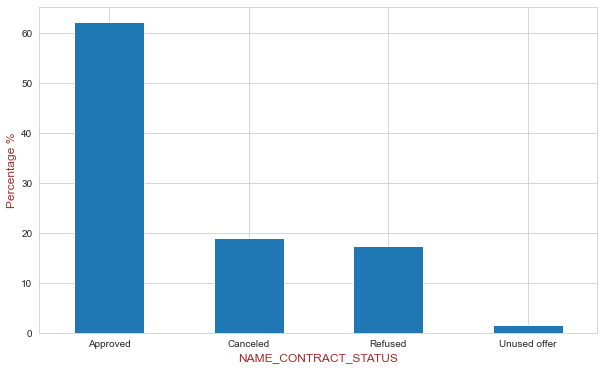

In [53]:
plt.figure(figsize=(10,6))

(inp1["NAME_CONTRACT_STATUS"].value_counts(normalize=True)*100).plot.bar()

plt.ylabel("Percentage %", fontdict={"fontsize": 12, "fontweight" : 5, "color" : "Brown"})
plt.xlabel("NAME_CONTRACT_STATUS", fontdict={"fontsize": 12, "fontweight" : 5, "color" : "Brown"})

plt.xticks(rotation = 0)

plt.show()

Observation:

Applications that has approved are far more in numbers than other cases.

### 4. Segmented univariate analysis

In [54]:
# Creating approval_flag of numerical data type where NAME_CONTRACT_STATUS "Approved"= 1, "Canceled","Refused","Unused offer"= 0
inp1["Approval_flag"] = np.where(inp1["NAME_CONTRACT_STATUS"]=="Approved",1,0)

In [55]:
inp1["Approval_flag"].value_counts()

1    1036781
0     633433
Name: Approval_flag, dtype: int64

#### Categorical Columns

NAME_CONTRACT_TYPE:


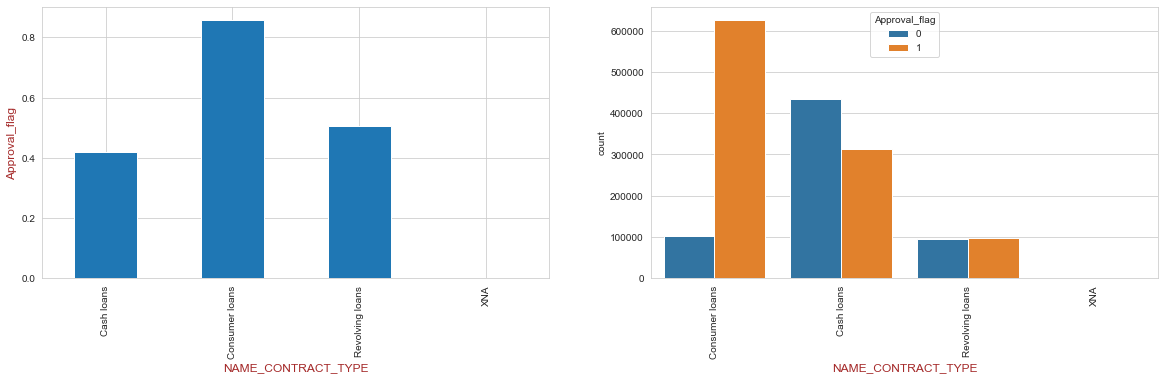

NAME_PAYMENT_TYPE:


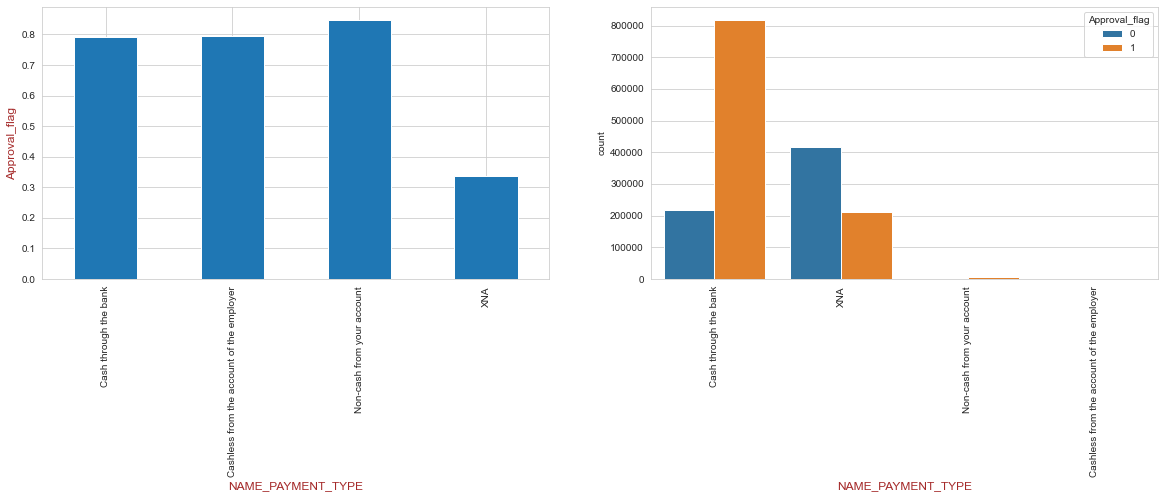

NAME_CLIENT_TYPE:


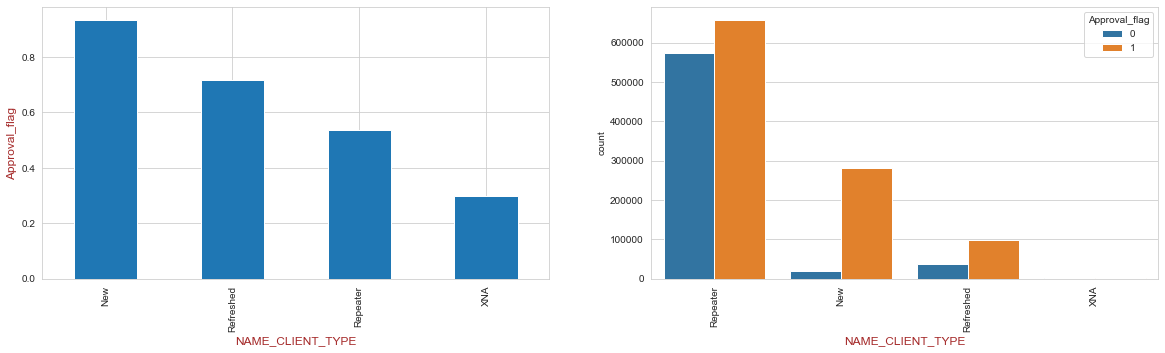

PRODUCT_COMBINATION:


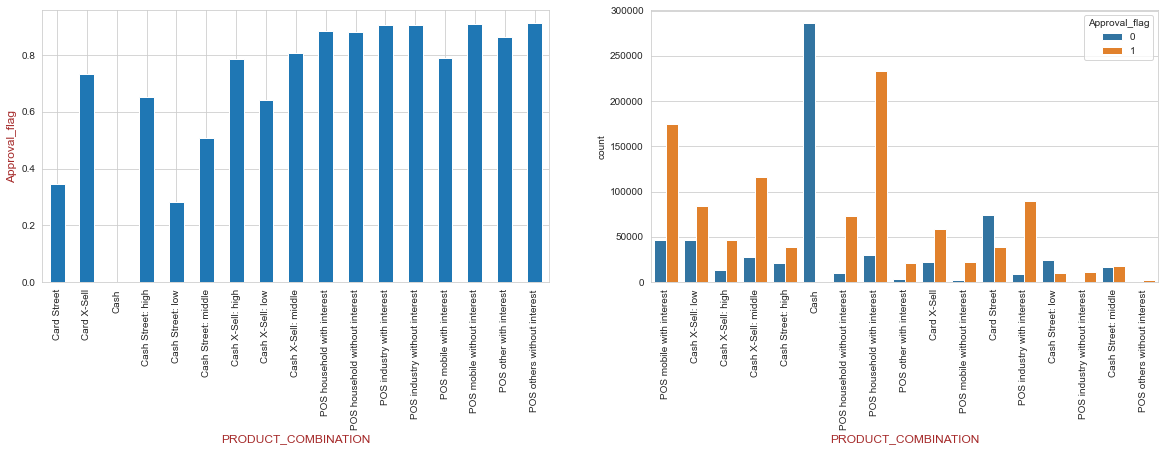

CHANNEL_TYPE:


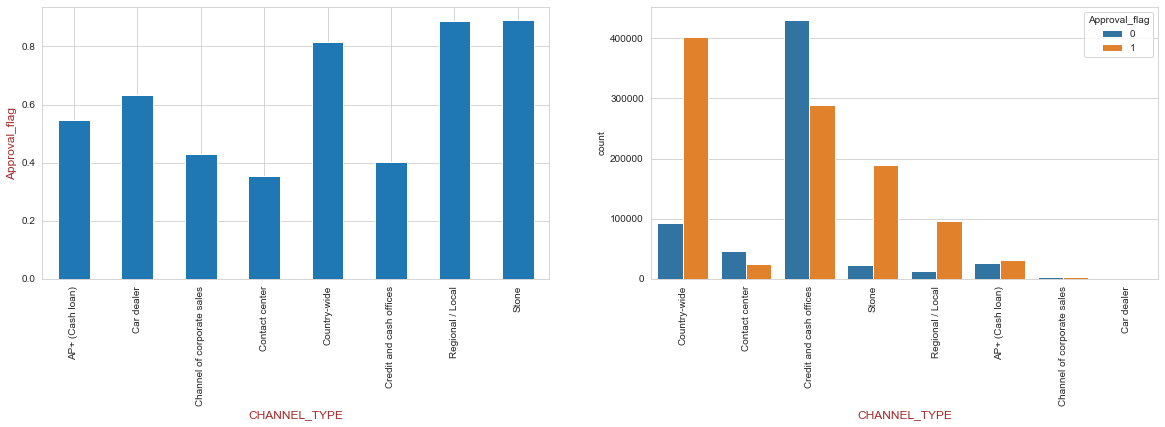

NAME_YIELD_GROUP:


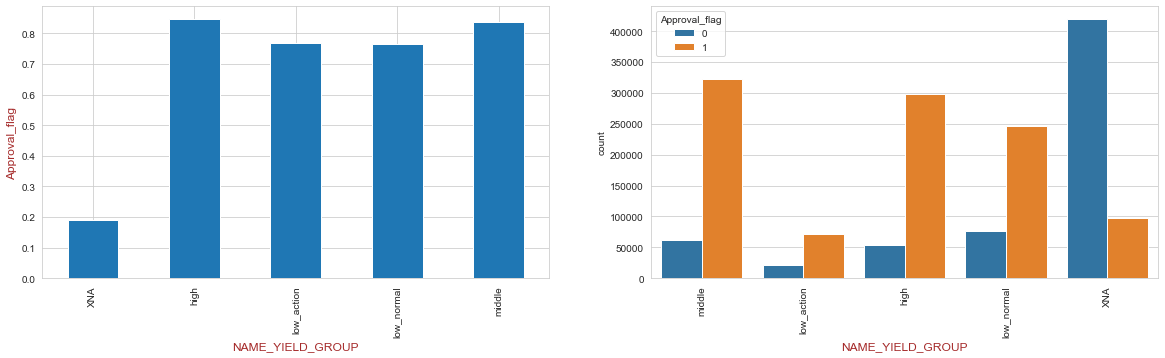

In [56]:
for col in inp1_cat_cols:
    print("\033[1m"+col+":"+"\033[0m")
    
    fig,axs=plt.subplots(1,2)
    fig.set_figheight(5)
    fig.set_figwidth(20)

    inp1.groupby(col)["Approval_flag"].mean().plot.bar(ax=axs[0],rot=90)

    axs[0].set_xlabel(col, fontdict={"fontsize":12, "fontweight": 5, "color":"Brown"})
    axs[0].set_ylabel("Approval_flag", fontdict={"fontsize":12, "fontweight":5, "color":"Brown"})

    sns.countplot(inp1[col],hue=inp1["Approval_flag"])
    axs[1].set_xlabel(col, fontdict={"fontsize":12, "fontweight": 5, "color":"Brown"})
    plt.xticks(rotation = 90)
    plt.show()

#### Numerical Columns:

AMT_APPLICATION:
                        mean   median
Approval_flag                        
0              166504.762204      0.0
1              180567.000949  90000.0


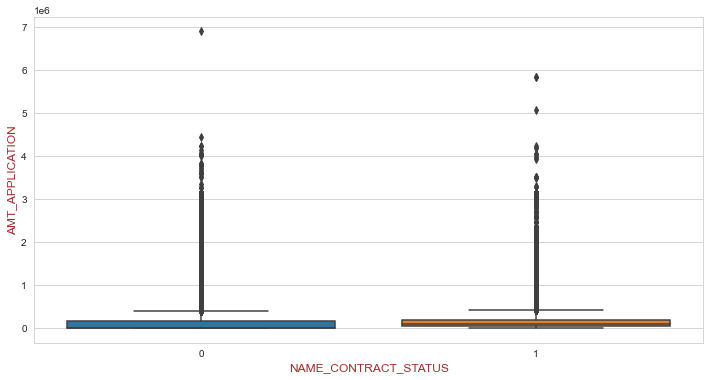

AMT_ANNUITY:
                       mean     median
Approval_flag                         
0              20856.144266  16013.835
1              14720.350105  10380.240


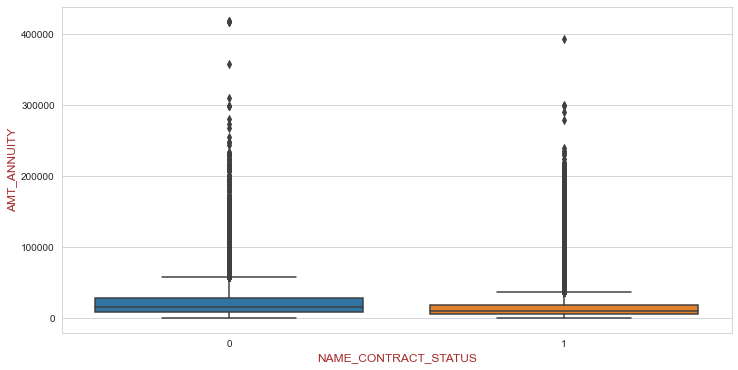

AMT_CREDIT:
                        mean    median
Approval_flag                         
0              185556.633410       0.0
1              202564.182131  102208.5


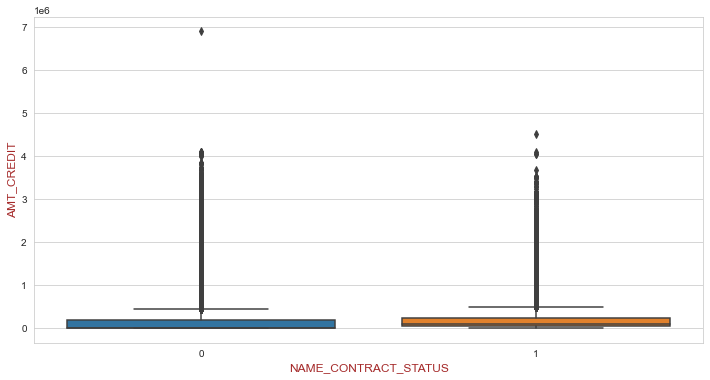

CNT_PAYMENT:
                    mean  median
Approval_flag                   
0              23.722638    18.0
1              14.122055    12.0


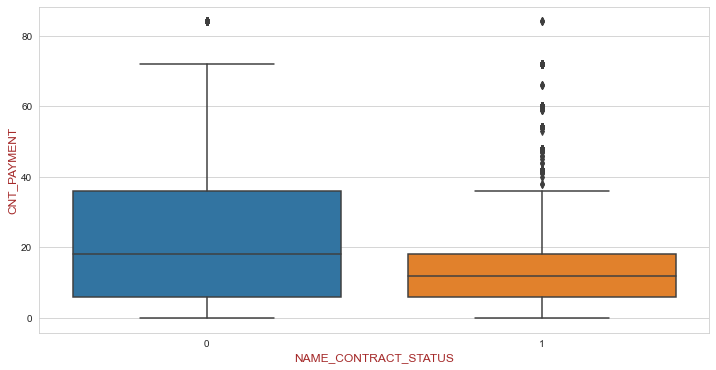

In [57]:
for col in inp1_num_cols:
    print("\033[1m"+col+":"+"\033[0m")

    print(inp1.groupby("Approval_flag")[col].aggregate(["mean","median"]))
    
    plt.figure(figsize=(12,6))
    
    sns.boxplot(data =inp1, x="Approval_flag",y=col)
    
    plt.xlabel("NAME_CONTRACT_STATUS", fontdict={"fontsize":12, "fontweight": 5, "color":"Brown"})
    plt.ylabel(col, fontdict={"fontsize":12, "fontweight":5, "color":"Brown"})
    
    plt.xticks(rotation = 0)
    
    plt.show()

#### Observations:
1. Consumer loans have higher rate of approval.
2. In approved applications cash through the bank is most used payment option.
3. In the client type ratio of approved vs other cases is not very high, but new clients have higher rate of approval.
4. Country wide has highest approval rate in channel type.
5. Middle and high interest rate have high approval rate.
6. Term of previous credit is widely spread in other cases and approval spread is less comapritively.

### 5. Bivariate analysis

NAME_CONTRACT_TYPE


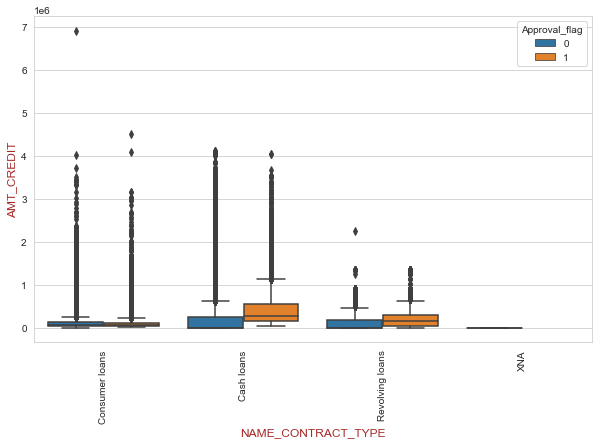

NAME_PAYMENT_TYPE


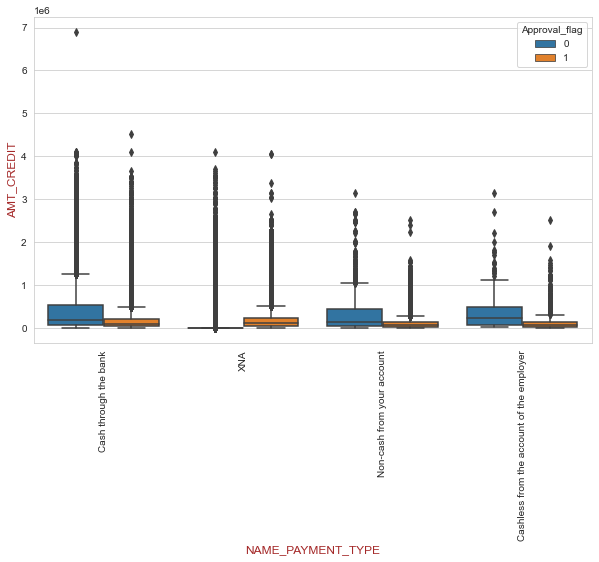

NAME_CLIENT_TYPE


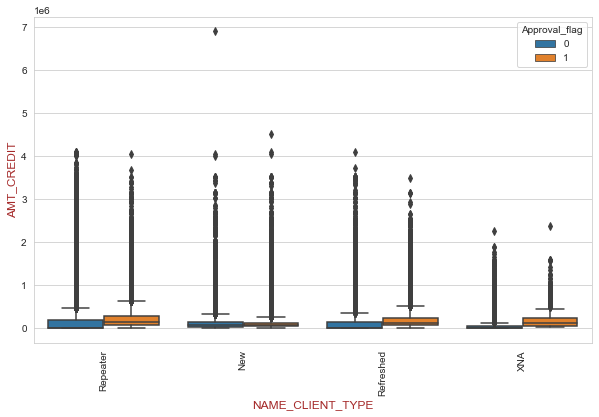

PRODUCT_COMBINATION


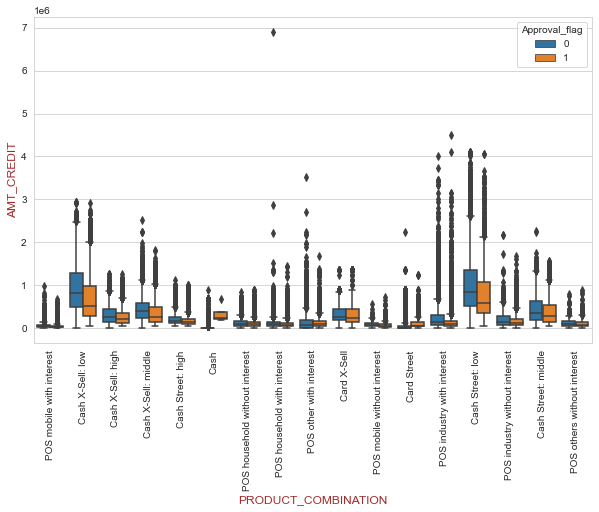

CHANNEL_TYPE


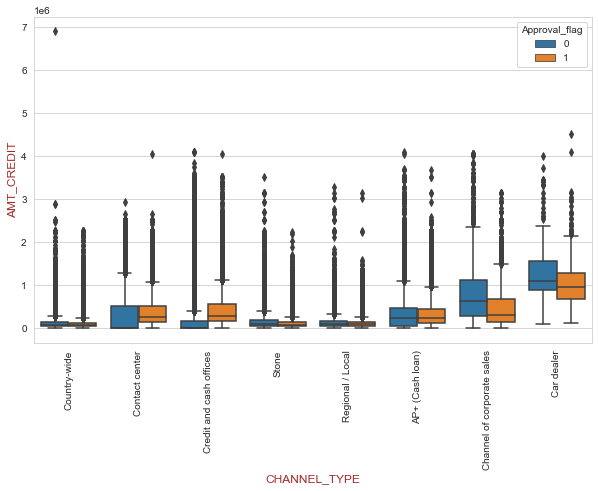

NAME_YIELD_GROUP


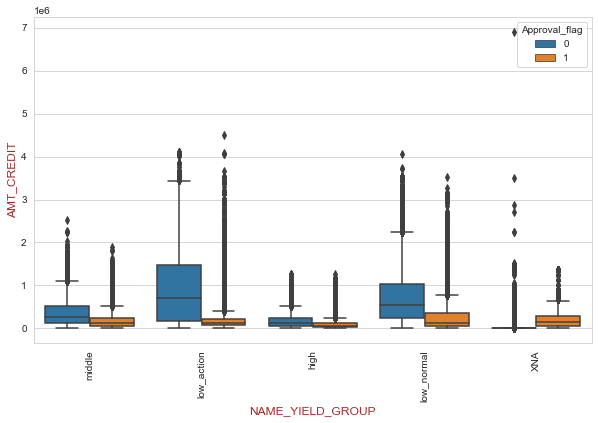

In [58]:
for i in inp1_cat_cols:
    print("\033[1m"+i+"\033[0m")   
    plt.figure(figsize=(10,6))
    sns.boxplot(x=inp1[i],y=inp1["AMT_CREDIT"],hue=inp1["Approval_flag"])
    
    plt.xlabel(i, fontdict={"fontsize": 12, "fontweight" : 5, "color" : "Brown"})
    plt.ylabel("AMT_CREDIT", fontdict={"fontsize": 12, "fontweight" : 5, "color" : "Brown"})
    
    plt.xticks(rotation = 90)
    
    plt.show()

NAME_CONTRACT_TYPE


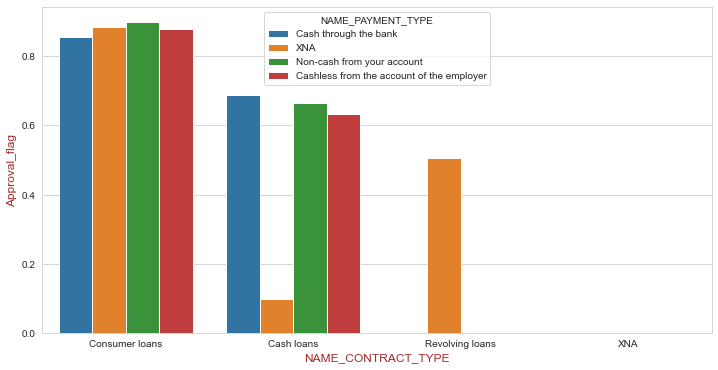

NAME_CONTRACT_TYPE


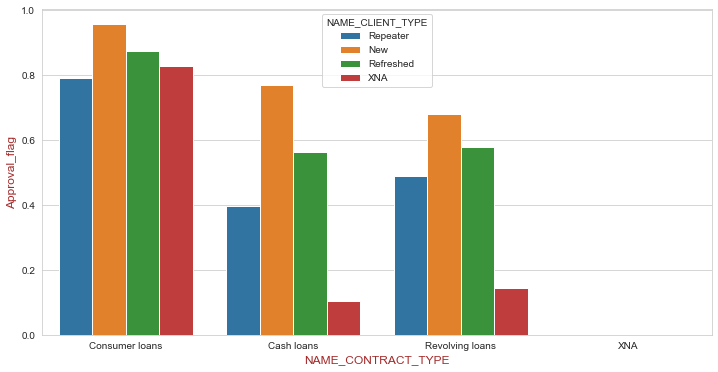

NAME_CONTRACT_TYPE


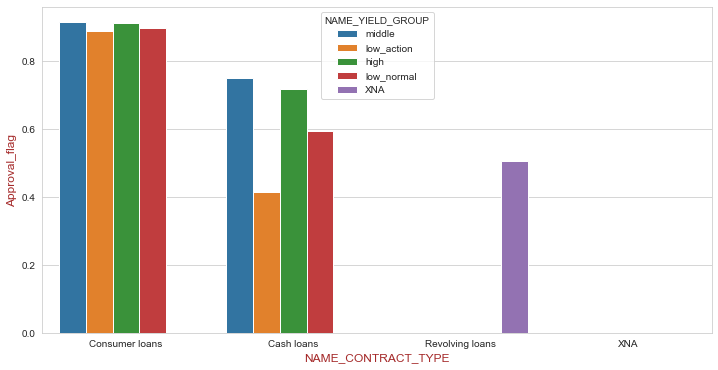

NAME_PAYMENT_TYPE


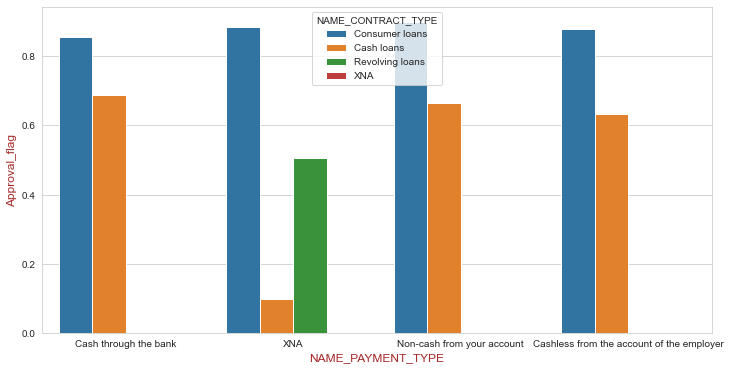

NAME_PAYMENT_TYPE


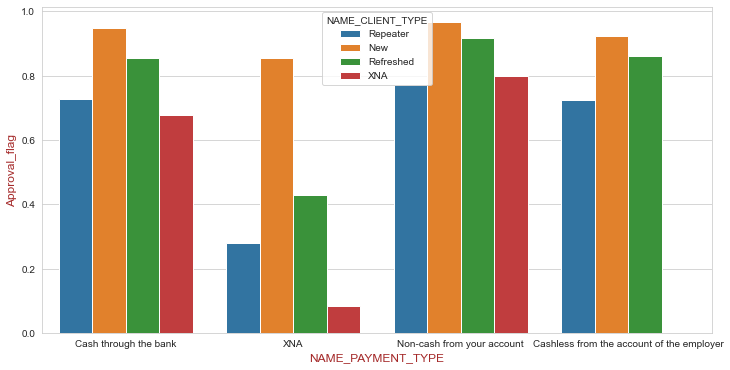

NAME_PAYMENT_TYPE


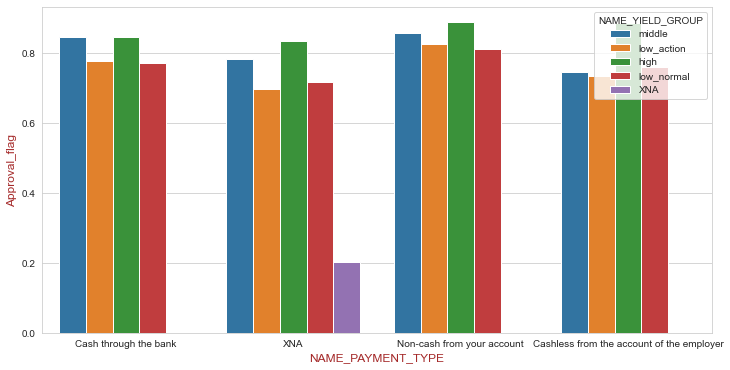

NAME_CLIENT_TYPE


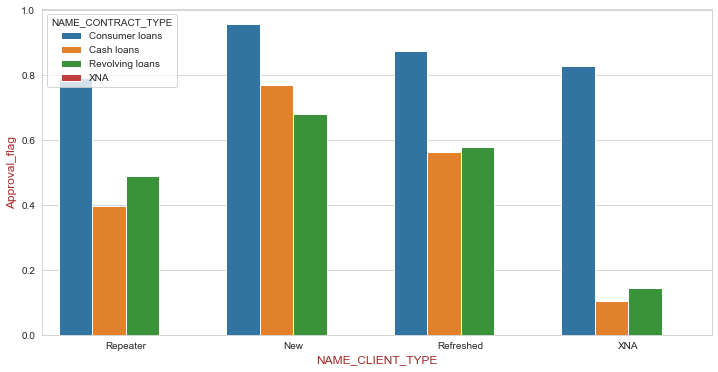

NAME_CLIENT_TYPE


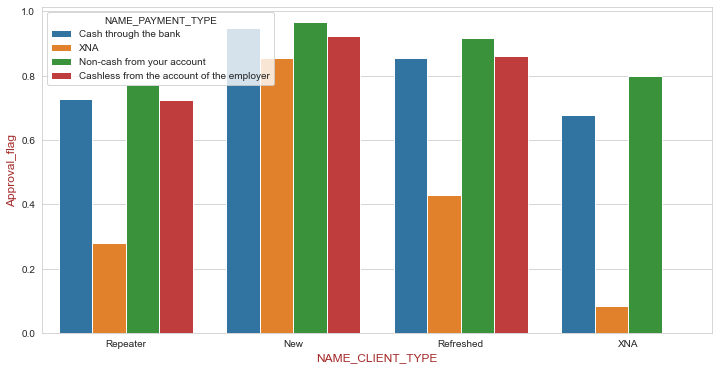

NAME_CLIENT_TYPE


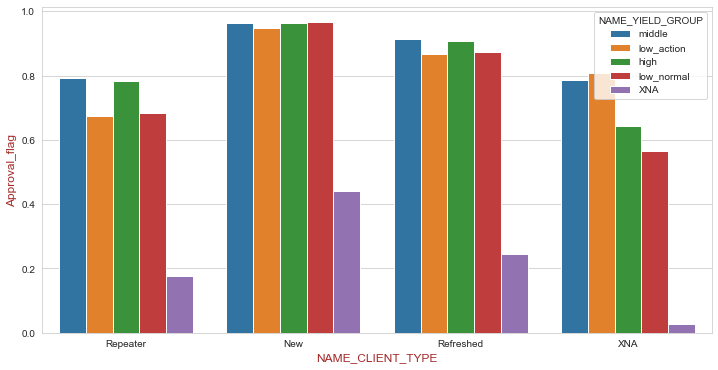

NAME_YIELD_GROUP


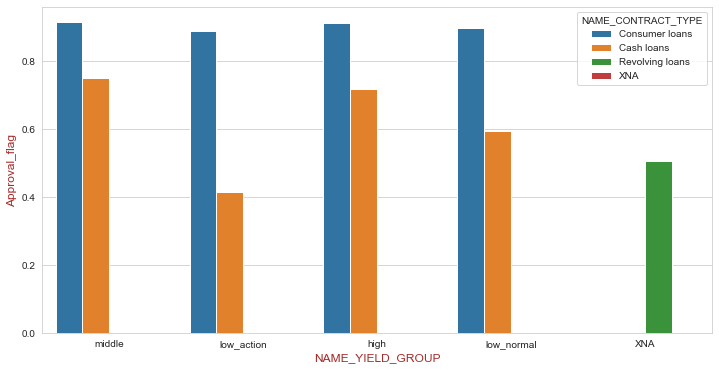

NAME_YIELD_GROUP


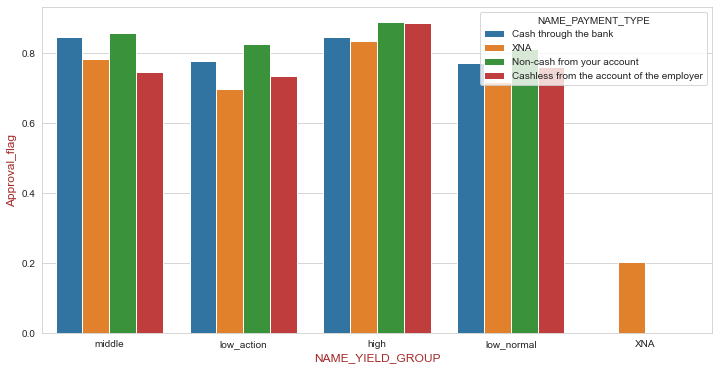

NAME_YIELD_GROUP


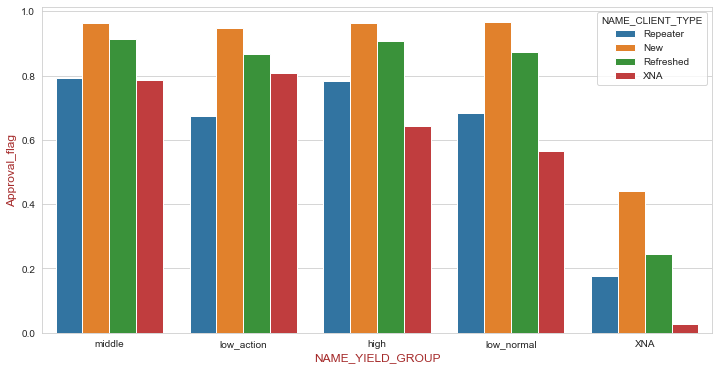

In [59]:
plot_list1 = inp1_cat_cols.copy()
plot_list1.remove("PRODUCT_COMBINATION")
plot_list1.remove("CHANNEL_TYPE")
for i in plot_list1:
    for j in plot_list1:
        if i != j:
            print("\033[1m"+i+"\033[0m")
            plt.figure(figsize=(12,6))
            sns.barplot(x=inp1[i],y=inp1["Approval_flag"],hue=inp1[j],ci=None)
            
            plt.xlabel(i, fontdict={"fontsize": 12, "fontweight" : 5, "color" : "Brown"})
            plt.ylabel("Approval_flag", fontdict={"fontsize": 12, "fontweight" : 5, "color" : "Brown"})
            
            plt.show()

#### Observations:
1. Less number of cash loans and more number of revolving loans are cancelled or refused or being unused offer.
2. New has highest percentage of approved application in every loan category and every contract type category followed by refreshed. Repeater has less percentage.
3. Low_action cash loans have less approved.
4. Consumer loan has high rate of approval in every contract type category.
5. New has highest percentage of approved application in every yield group followed by refreshed. Repeater has less percentage.


## Merging of two datasets:

In [60]:
# Creating new dataset for merging purpose which have required columns from inp0.
df0 = inp0.loc[:,['SK_ID_CURR','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
            'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION', 
            'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
            'ORGANIZATION_TYPE','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','CNT_CHILDREN','CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'Age_years','Employed_years', 
            'Registration_years', 'Id_Publish_years','LAST_PHONE_CHANGE_years', 'EXT_SOURCE',"TARGET"]]

In [61]:
# Creating new dataset for merging purpose which have required columns from inp1.
df1 = inp1.loc[:,["SK_ID_CURR","AMT_APPLICATION", "NAME_CONTRACT_TYPE", "AMT_ANNUITY", "AMT_CREDIT","NAME_PAYMENT_TYPE","NAME_CLIENT_TYPE",
            "PRODUCT_COMBINATION", "CHANNEL_TYPE", "CNT_PAYMENT","NAME_YIELD_GROUP","NAME_CONTRACT_STATUS"]]

In [62]:
df0 = df0.merge(df1,on = "SK_ID_CURR", how ="inner")

In [63]:
df0.head(20)

,SK_ID_CURR,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_CHILDREN,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age_years,Employed_years,Registration_years,Id_Publish_years,LAST_PHONE_CHANGE_years,EXT_SOURCE,TARGET,AMT_APPLICATION,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_CREDIT_y,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,PRODUCT_COMBINATION,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP,NAME_CONTRACT_STATUS
0,100002,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,2,2,0,0,0,0,0,0,Business Entity Type 3,202500.0,406597.5,24700.5,351000.0,0.018801,0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,1.745205,9.994521,5.808219,3.106849,0.161787,1,179055.00,Consumer loans,9251.775,179055.0,XNA,New,POS other with interest,Stone,24.0,low_normal,Approved
1,100003,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,1,1,0,0,0,0,0,0,School,270000.0,1293502.5,35698.5,1129500.0,0.003541,0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,3.254795,3.249315,0.797260,2.268493,0.466757,0,900000.00,Cash loans,98356.995,1035882.0,XNA,Repeater,Cash X-Sell: low,Credit and cash offices,12.0,low_normal,Approved
2,100003,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,1,1,0,0,0,0,0,0,School,270000.0,1293502.5,35698.5,1129500.0,0.003541,0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,3.254795,3.249315,0.797260,2.268493,0.466757,0,337500.00,Consumer loans,64567.665,348637.5,Cash through the bank,Refreshed,POS industry with interest,Stone,6.0,middle,Approved
3,100003,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,1,1,0,0,0,0,0,0,School,270000.0,1293502.5,35698.5,1129500.0,0.003541,0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,3.254795,3.249315,0.797260,2.268493,0.466757,0,68809.50,Consumer loans,6737.310,68053.5,Cash through the bank,Refreshed,POS household with interest,Country-wide,12.0,middle,Approved
4,100004,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,2,2,0,0,0,0,0,0,Government,67500.0,135000.0,6750.0,135000.0,0.010032,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822,0.616438,11.671233,6.934247,2.232877,0.642739,0,24282.00,Consumer loans,5357.250,20106.0,Cash through the bank,New,POS mobile without interest,Regional / Local,4.0,middle,Approved
5,100006,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,2,2,0,0,0,0,0,0,Business Entity Type 3,135000.0,312682.5,29686.5,297000.0,0.008019,0,2.0,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,52.068493,8.326027,26.939726,6.676712,1.690411,0.650442,0,675000.00,Cash loans,24246.000,675000.0,Cash through the bank,Repeater,Cash X-Sell: low,Credit and cash offices,48.0,low_normal,Approved
6,100006,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,2,2,0,0,0,0,0,0,Business Entity Type 3,135000.0,312682.5,29686.5,297000.0,0.008019,0,2.0,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,52.068493,8.326027,26.939726,6.676712,1.690411,0.650442,0,0.00,Revolving loans,NaN,0.0,XNA,Repeater,Card Street,Credit and cash offices,NaN,XNA,Canceled
7,100006,Cash loans,F,N,Y,Unaccompanie

### Univariate analysis of columns from previuos application and Target column:

NAME_CONTRACT_TYPE_y:


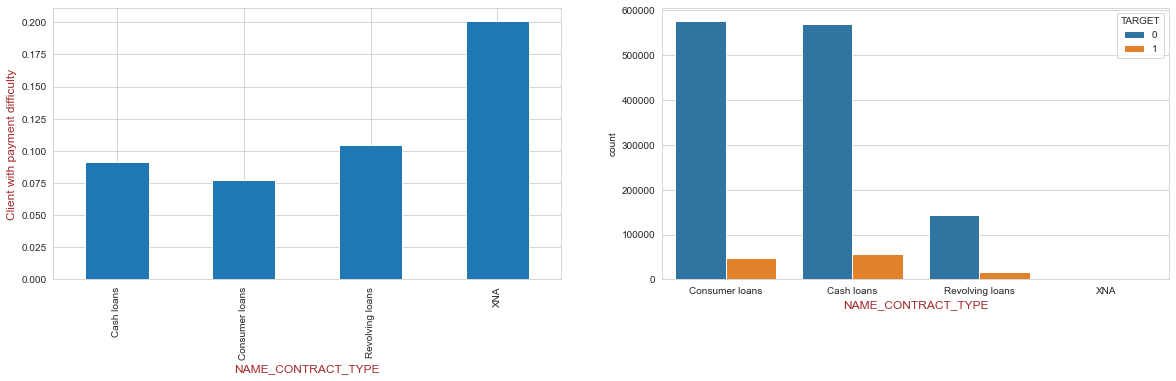

NAME_PAYMENT_TYPE:


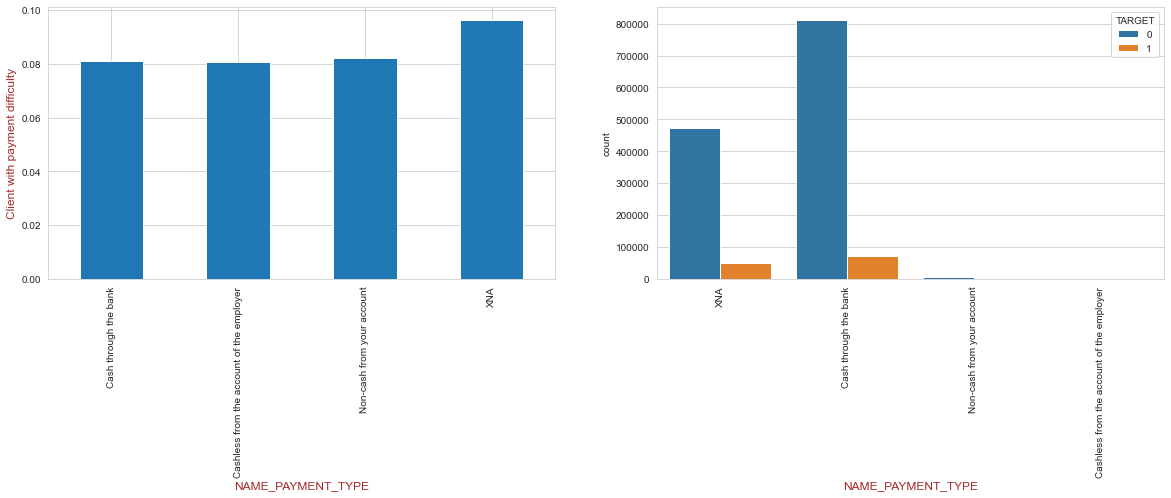

NAME_CLIENT_TYPE:


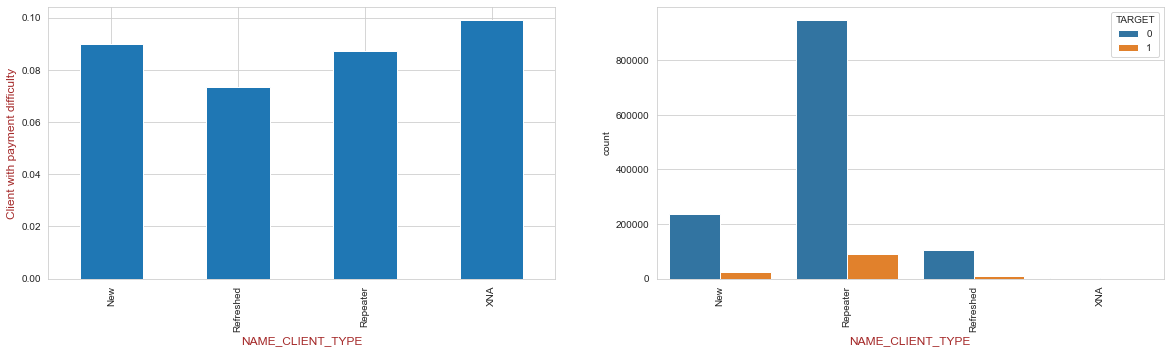

PRODUCT_COMBINATION:


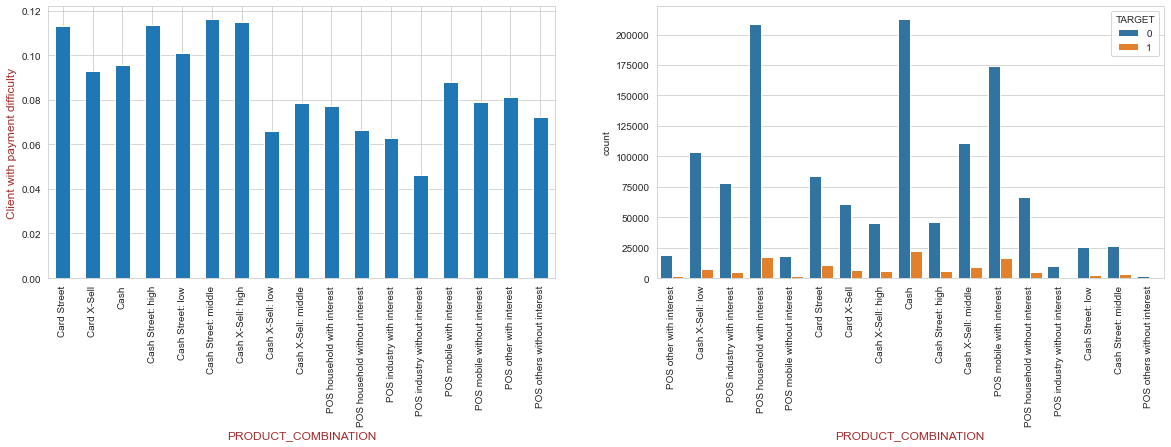

CHANNEL_TYPE:


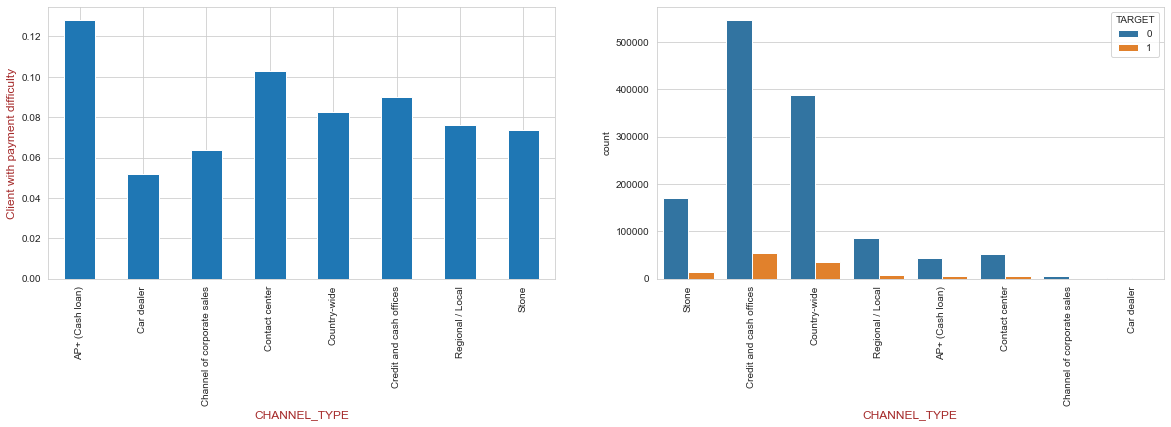

NAME_YIELD_GROUP:


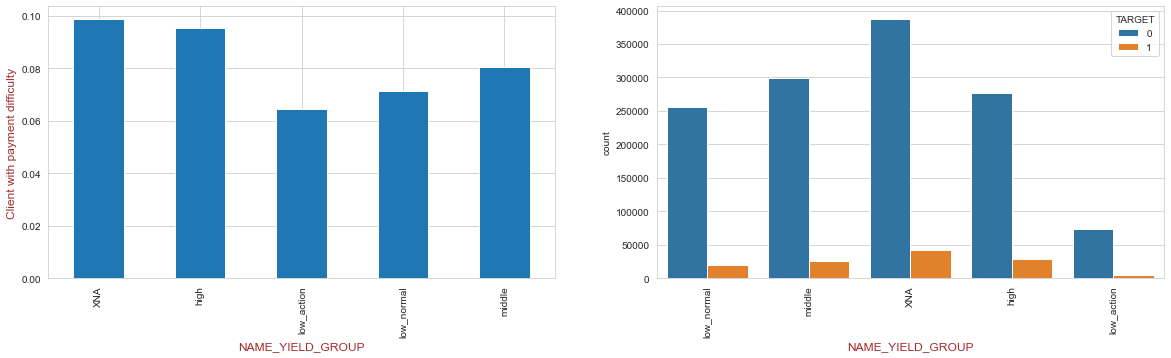

In [64]:
for col in inp1_cat_cols:
    if col == "NAME_CONTRACT_TYPE":
        print("\033[1m"+col+"_y:"+"\033[0m")
        fig,axs=plt.subplots(1,2)
        fig.set_figheight(5)
        fig.set_figwidth(20)

        df0.groupby(col+"_y")["TARGET"].mean().plot.bar(ax=axs[0],rot=90)
    
        axs[0].set_xlabel(col, fontdict={"fontsize":12, "fontweight": 5, "color":"Brown"})
        axs[0].set_ylabel("Client with payment difficulty", fontdict={"fontsize":12, "fontweight":5, "color":"Brown"})

        sns.countplot(df0[col+"_y"],hue=df0["TARGET"])
        axs[1].set_xlabel(col, fontdict={"fontsize":12, "fontweight": 5, "color":"Brown"})
        
        plt.show()
    else:
        print("\033[1m"+col+":"+"\033[0m")
        fig,axs=plt.subplots(1,2)
        fig.set_figheight(5)
        fig.set_figwidth(20)

        df0.groupby(col)["TARGET"].mean().plot.bar(ax=axs[0],rot=90)
    
        axs[0].set_xlabel(col, fontdict={"fontsize":12, "fontweight": 5, "color":"Brown"})
        axs[0].set_ylabel("Client with payment difficulty", fontdict={"fontsize":12, "fontweight":5, "color":"Brown"})

        sns.countplot(df0[col],hue=df0["TARGET"])
        axs[1].set_xlabel(col, fontdict={"fontsize":12, "fontweight": 5, "color":"Brown"})
        plt.xticks(rotation = 90)
        plt.show()

### Name_contract status Vs Target

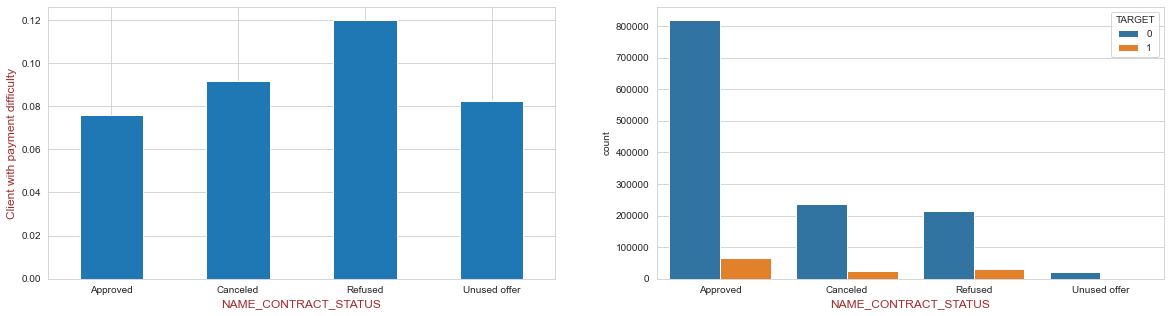

In [65]:
fig,axs=plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)

df0.groupby("NAME_CONTRACT_STATUS")["TARGET"].mean().plot.bar(ax=axs[0],rot=0)

axs[0].set_xlabel("NAME_CONTRACT_STATUS", fontdict={"fontsize":12, "fontweight": 5, "color":"Brown"})
axs[0].set_ylabel("Client with payment difficulty", fontdict={"fontsize":12, "fontweight":5, "color":"Brown"})

sns.countplot(df0["NAME_CONTRACT_STATUS"],hue=df0["TARGET"])
axs[1].set_xlabel("NAME_CONTRACT_STATUS", fontdict={"fontsize":12, "fontweight": 5, "color":"Brown"})

plt.show()

#### Observations:
1. Clients having previous loan types as revolving loan has defaulted more.
2. Repeater and new has almost same rate of defaulting.
3. AP+ (Cash loan) have defaulted more.
4. High interest rate group have defaulted more.
5. Previously refused, cancelled and unused offer have defaulted more.

### Bivariate analysis of columns from previuos application and Target column:

NAME_CONTRACT_TYPE_y


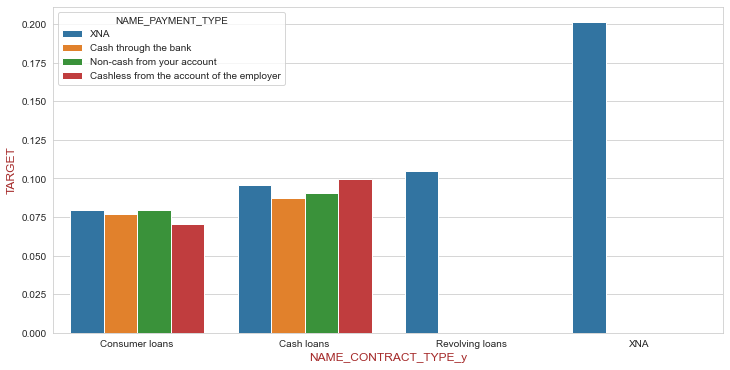

NAME_CONTRACT_TYPE_y


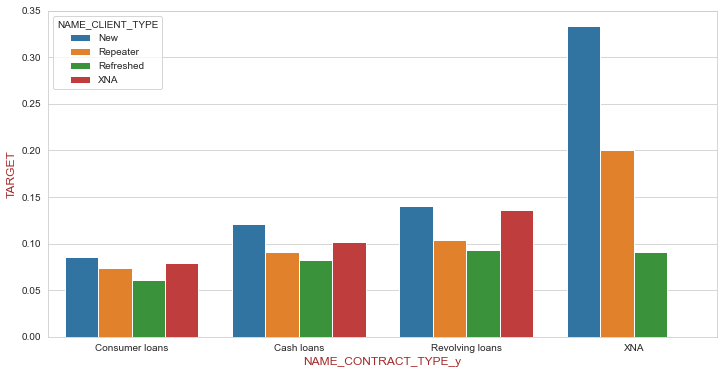

NAME_CONTRACT_TYPE_y


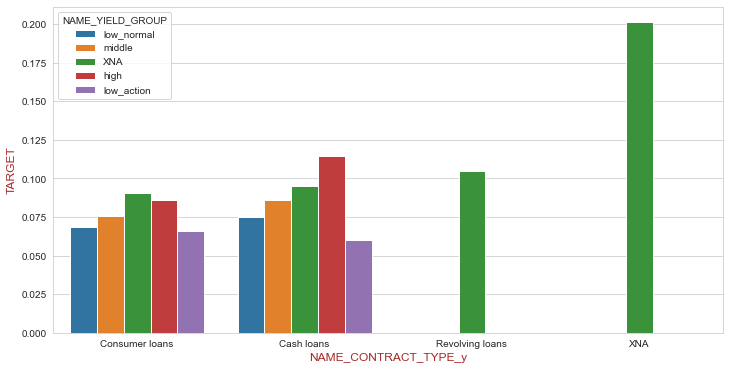

NAME_PAYMENT_TYPE


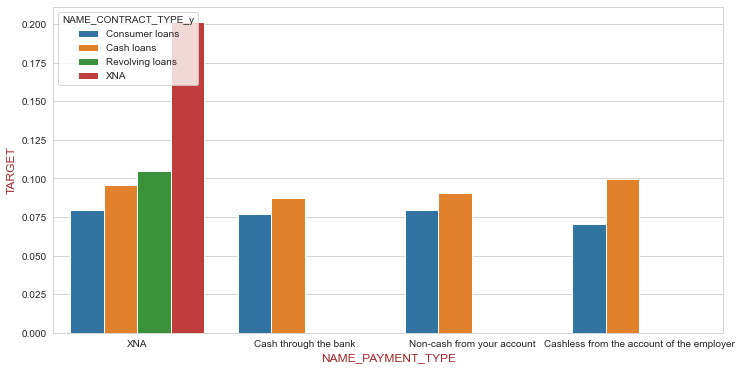

NAME_PAYMENT_TYPE


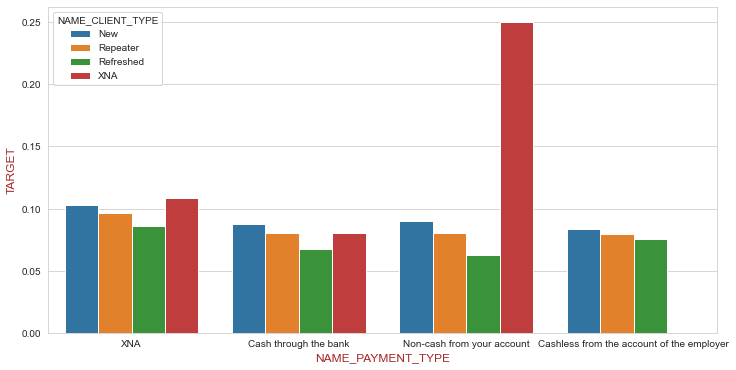

NAME_PAYMENT_TYPE


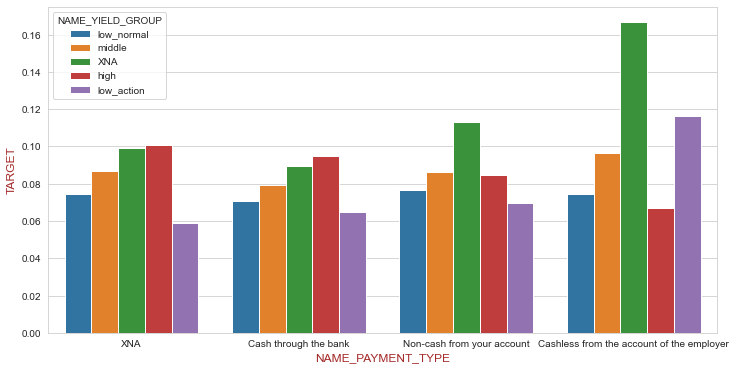

NAME_CLIENT_TYPE


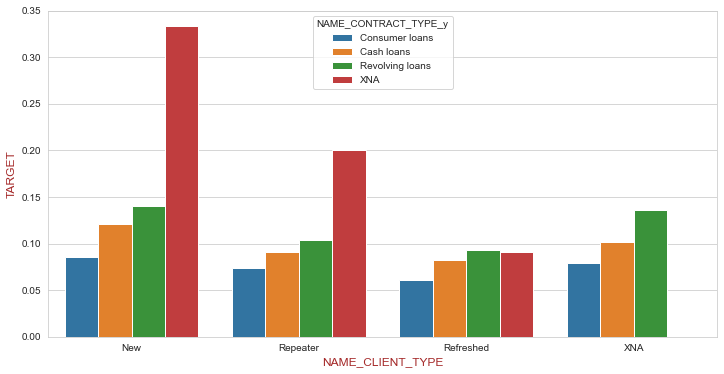

NAME_CLIENT_TYPE


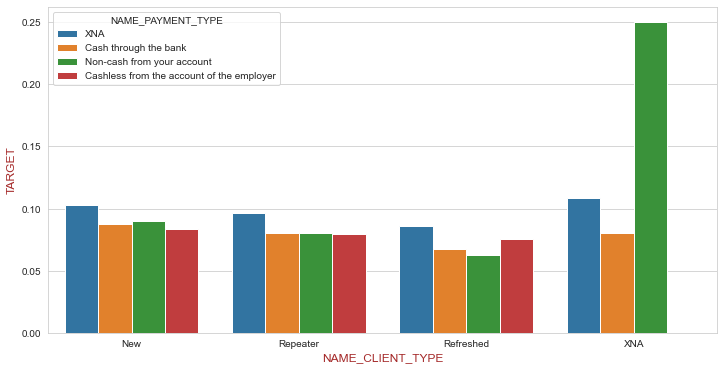

NAME_CLIENT_TYPE


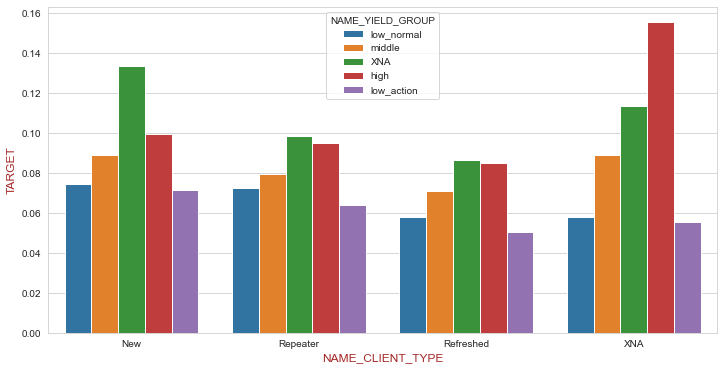

NAME_YIELD_GROUP


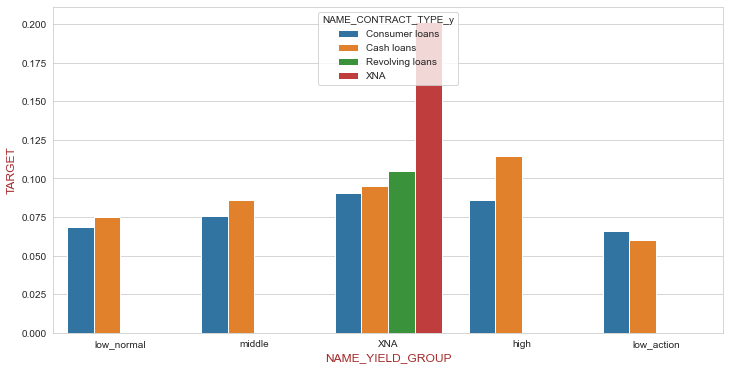

NAME_YIELD_GROUP


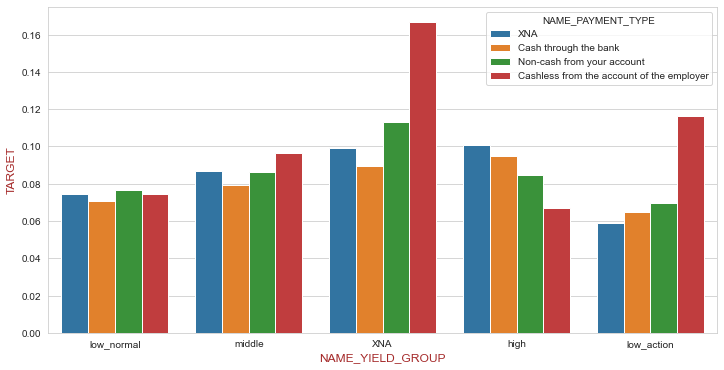

NAME_YIELD_GROUP


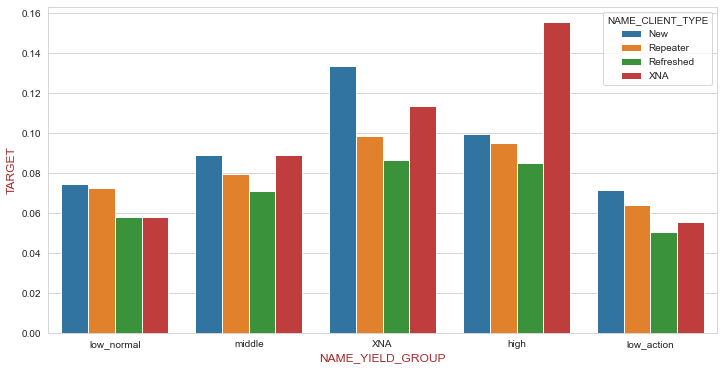

In [66]:
plot_list2 = plot_list1.copy()
plot_list2[plot_list2.index("NAME_CONTRACT_TYPE")] = "NAME_CONTRACT_TYPE_y"

for i in plot_list2:
    for j in plot_list2:
        if i != j:
            print("\033[1m"+i+"\033[0m")
            plt.figure(figsize=(12,6))
            sns.barplot(x=df0[i],y=df0["TARGET"],hue=df0[j],ci=None)

            plt.xlabel(i, fontdict={"fontsize": 12, "fontweight" : 5, "color" : "Brown"})
            plt.ylabel("TARGET", fontdict={"fontsize": 12, "fontweight" : 5, "color" : "Brown"})

            plt.show()

#### Observations:
1. Cash loans with high interset rate group have defaulted more.
2. Client with cash loans in every payment category and have defaulted more than consumer loan.
3. Clients with revolving loan in each client type category have defaulted more.
4. Clients with high interset group in each client type category have defaulted more than middle interset group.
5. Clients with cash loans and high,low_normal, middle interest groups have defaulted more than client with consumer loan. but in low_action category clients with consumer loan have defaulted more than cash loans.
6. Cashless from the account of the employer payment type in low_action interest group have high default rate.
7. New clients in each yield group have defaulted more.

## Top 10 correlations with Target variable:

In [67]:
# Segmenting datset for client with payment difficulties and all other cases

In [68]:
target_0 = df0[df0["TARGET"]==0]
target_0.drop("SK_ID_CURR",inplace=True,axis=1)

In [69]:
target_1 = df0[df0["TARGET"]==1]
target_1.drop("SK_ID_CURR",inplace=True,axis=1)

In [70]:
# Checking top correlations in where Target is zero.

In [71]:
res = target_0.corr().abs().unstack().sort_values(ascending=False)

In [72]:
res[res != 1].dropna().iloc[0:19:2]

OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE      0.998578
AMT_CREDIT_x                 AMT_GOODS_PRICE               0.986593
AMT_CREDIT_y                 AMT_APPLICATION               0.975725
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.944356
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.878475
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.875761
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.863099
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.835641
AMT_ANNUITY_y                AMT_CREDIT_y                  0.816541
AMT_APPLICATION              AMT_ANNUITY_y                 0.809023
dtype: float64

In [73]:
# Checking top correlations in where Target is zero.

In [74]:
res1 = target_1.corr().abs().unstack().sort_values(ascending=False)

In [75]:
res1[res1 != 1].dropna().iloc[1:20:2]

OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       0.998378
AMT_CREDIT_x                AMT_GOODS_PRICE                0.982912
AMT_APPLICATION             AMT_CREDIT_y                   0.975377
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.956483
CNT_CHILDREN                CNT_FAM_MEMBERS                0.886300
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.873130
DEF_30_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE       0.858281
AMT_CREDIT_y                AMT_ANNUITY_y                  0.840461
AMT_ANNUITY_y               AMT_APPLICATION                0.824962
LIVE_CITY_NOT_WORK_CITY     REG_CITY_NOT_WORK_CITY         0.792897
dtype: float64

#### Observation:

Top 10 correlation for both cases is almost same